#Rough Set

In [ ]:
#Impor Library Rough Set
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("heart.csv",sep=',')
df

sex  age  trestbps  chol  cp  fbs  ...  exang  oldpeak  slope  ca  thal  target
0      1   63       145   233   3    1  ...      0      2.3      0   0     3       1
1      1   37       130   250   2    0  ...      0      3.5      0   0     6       1
2      0   41       130   204   1    0  ...      0      1.4      2   0     6       1
3      1   56       120   236   1    0  ...      0      0.8      2   0     6       1
4      0   57       120   354   0    0  ...      1      0.6      2   0     6       1
..   ...  ...       ...   ...  ..  ...  ...    ...      ...    ...  ..   ...     ...
298    0   57       140   241   0    0  ...      1      0.2      1   0     7       0
299    1   45       110   264   3    0  ...      0      1.2      1   0     7       0
300    1   68       144   193   0    1  ...      0      3.4      1   2     7       0
301    1   57       130   131   0    0  ...      1      1.2      1   1     7       0
302    0   57       130   236   1    0  ...      0      0.0      1   1     6       0

[303 rows x 14 columns]

In [ ]:
df=df.iloc[::,1:]         
#df1=df.iloc[::,:-1] #memisahkan antara variabel x dan y
df

age  trestbps  chol  cp  fbs  ...  oldpeak  slope  ca  thal  target
0     63       145   233   3    1  ...      2.3      0   0     3       1
1     37       130   250   2    0  ...      3.5      0   0     6       1
2     41       130   204   1    0  ...      1.4      2   0     6       1
3     56       120   236   1    0  ...      0.8      2   0     6       1
4     57       120   354   0    0  ...      0.6      2   0     6       1
..   ...       ...   ...  ..  ...  ...      ...    ...  ..   ...     ...
298   57       140   241   0    0  ...      0.2      1   0     7       0
299   45       110   264   3    0  ...      1.2      1   0     7       0
300   68       144   193   0    1  ...      3.4      1   2     7       0
301   57       130   131   0    0  ...      1.2      1   1     7       0
302   57       130   236   1    0  ...      0.0      1   1     6       0

[303 rows x 13 columns]

In [ ]:
#melakukan encoding (mengganti kategori menjadi angka)
#df['quality'].value_counts()

In [ ]:
#Encoding dengan data sedikit
#cleanup_nums = {"quality":     {"good": 2, "bad": 1}}
#df = df.replace(cleanup_nums)
#df

#Core and Reduct

In [ ]:
def indiscrenibility(faktor):
    df_r = faktor.groupby(list(faktor)).apply(lambda x: tuple(x.index)).tolist()
    df_baru=[]
    for i in df_r:
        dfb=list(i)
        df_baru.append(dfb)
    return df_baru

In [ ]:
def Core_and_Reduct(faktor):
    R=indiscrenibility(faktor)
    kolom=list(faktor.columns)
    indis_vector=[]
    for k in kolom:
        k=str(k) 
        df2=faktor.drop(columns=[k])
        K=indiscrenibility(df2)
        if (K==R):
            indis=True
            indis_vector.append(indis) 
        else:
            indis=False
            indis_vector.append(indis) 
    
    indeks = []
    for i in range(len(indis_vector)):
        if indis_vector[i] == False:
            indeks.append(i)
    indis_var = [kolom[i] for i in indeks] 
    df_CR=faktor[indis_var]
    # Mengembalikan Faktor Utama
    df_CR['target']=faktor.iloc[::,-1]
    return df_CR

In [ ]:
df_CR=Core_and_Reduct(df)
df_CR

age  trestbps  chol  target
0     63       145   233       1
1     37       130   250       1
2     41       130   204       1
3     56       120   236       1
4     57       120   354       1
..   ...       ...   ...     ...
298   57       140   241       0
299   45       110   264       0
300   68       144   193       0
301   57       130   131       0
302   57       130   236       0

[303 rows x 4 columns]

In [ ]:
df_CR.to_csv('hasilroughset.csv') 

#Fuzzy

In [ ]:
#Impor Library SK - Fuzzy
import numpy as np
import matplotlib.pyplot as plt
import warnings
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
import sys
np.set_printoptions(threshold=sys.maxsize)
import seaborn as sns
%matplotlib inline

warnings.filterwarnings('ignore')

In [ ]:
df_tsk=pd.read_csv('hasilroughset.csv',sep=',')
df_tsk

Unnamed: 0  age  trestbps  chol  target
0             0   63       145   233       1
1             1   37       130   250       1
2             2   41       130   204       1
3             3   56       120   236       1
4             4   57       120   354       1
..          ...  ...       ...   ...     ...
298         298   57       140   241       0
299         299   45       110   264       0
300         300   68       144   193       0
301         301   57       130   131       0
302         302   57       130   236       0

[303 rows x 5 columns]

In [ ]:
df_tsk=df_tsk.drop(columns=['Unnamed: 0'])      #diilangin kolom
df_tsk

age  trestbps  chol  target
0     63       145   233       1
1     37       130   250       1
2     41       130   204       1
3     56       120   236       1
4     57       120   354       1
..   ...       ...   ...     ...
298   57       140   241       0
299   45       110   264       0
300   68       144   193       0
301   57       130   131       0
302   57       130   236       0

[303 rows x 4 columns]

In [ ]:
df_tsk.describe()

age    trestbps        chol      target
count  303.000000  303.000000  303.000000  303.000000
mean    54.366337  131.623762  246.264026    0.544554
std      9.082101   17.538143   51.830751    0.498835
min     29.000000   94.000000  126.000000    0.000000
25%     47.500000  120.000000  211.000000    0.000000
50%     55.000000  130.000000  240.000000    1.000000
75%     61.000000  140.000000  274.500000    1.000000
max     77.000000  200.000000  564.000000    1.000000

In [ ]:
df_tsk.isnull().sum()    #untuk mengecek nilai yang hilang

age         0
trestbps    0
chol        0
target      0
dtype: int64

In [ ]:
df_tsk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       303 non-null    int64
 1   trestbps  303 non-null    int64
 2   chol      303 non-null    int64
 3   target    303 non-null    int64
dtypes: int64(4)
memory usage: 9.6 KB


#Info Atribute
1. Age (Umur)
2. Sex (Kelamin)
3. Chest Pain type (Jenis Nyeri Dada) (Cp)
4. Resting Blood Preasure (Tekanan darah Istirahat) (Tresbps)
5. Serum Cholesterol (Kolesterol Serum) (Chol)
6. Fasting Blood Sugar (Gula Darah Puasa) (Fbs)
7. Resting Electrocar Dingraphic Results (Hasil Electrokardiografi istirahat) (Resterg)
8. Maximum Heart Rate Achieved (detak jantung maximum tercapai) (Thalac)
9. Exercise Induced Angina (Angina yang diinduksi oleh olahraga) (Exang)
10. Oldpeak
11. Number of Major (Ca)
12. Slope (Kemiringan)
13. Thal
14. Target



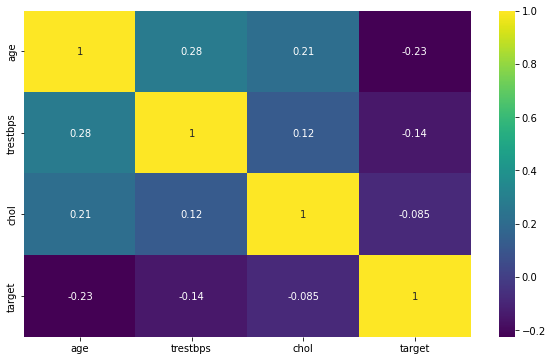

In [ ]:
#untuk melihat korelasi data
k=len(df_tsk.columns)
cm=df_tsk.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap='viridis')

# Fuzzyfikasi

##Fuzzy A

In [ ]:
def fungsi_segitiga(x, amb):
    """
    Fungsi Keanggotaan Segitiga.
    Parameter:
    ----------
    x   : Array 1 dimensi, semesta himpunan x  
    amb : Array 1 dimensi, terdiri dari 3 elemen a, m, b, yang mana a<=m<=b
    
    Hasil
    -------
    miu   : Array 1 dimensi fungsi keanggotaan segitiga 
    
    Fungsi keanggotaan segitiga:
    """
    assert len(amb) == 3, 'parameter amb harus tepat tiga elemen'
    a, m, b = np.r_[amb]    # Zero-indexing di Python
    assert a <= m and m <= b, 'paremeter harus memenuhi syarat berikut: a <= m <= b.'

    miu = np.zeros(len(x))

    # Sisi Kiri
    if a != m:
        idx = np.nonzero(np.logical_and(a < x, x < m))[0]
        miu[idx] = (x[idx] - a) / float(m - a)

    # Sisi Kanan
    if m != b:
        idx = np.nonzero(np.logical_and(m < x, x < b))[0]
        miu[idx] = (b - x[idx]) / float(b - m)

    idx = np.nonzero(x == m)
    miu[idx] = 1
    
    return miu

In [ ]:
def miu_fungsi_segitiga(array_x, amb, x_i):
    """
    Fungsi Keanggotaan Segitiga.
    Parameter:
    ----------
    x   : Array 1 dimensi, semesta himpunan x  
    amb : Array 1 dimensi, terdiri dari 3 elemen a, m, b, yang mana a<=m<=b
    
    Hasil
    -------
    miu   : Array 1 dimensi fungsi keanggotaan segitiga 
    
    Fungsi keanggotaan segitiga:
    """
    assert len(amb) == 3, 'parameter amb harus tepat tiga elemen'
    a, m, b = np.r_[amb]    # Zero-indexing di Python
    assert a <= m and m <= b, 'paremeter harus memenuhi syarat berikut: a <= m <= b.'

    miu = np.zeros(len(array_x))

    # Sisi Kiri
    if a != m:
        idx = np.nonzero(np.logical_and(a < array_x, array_x < m))[0]
        miu[idx] = (array_x[idx] - a) / float(m - a)

    # Sisi Kanan
    if m != b:
        idx = np.nonzero(np.logical_and(m < array_x, array_x < b))[0]
        miu[idx] = (b - array_x[idx]) / float(b - m)

    idx = np.nonzero(array_x == m)
    miu[idx] = 1

    dict_fuzzy=res = {round(array_x[i],2): miu[i] for i in range(len(array_x))}
    print(dict_fuzzy)
    hasil = dict_fuzzy[int(x_i)]

    return hasil

##Pembentukan Himpunan Fuzzy



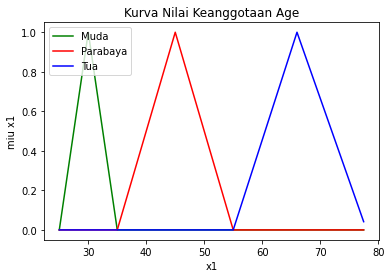

In [ ]:
# Pembentukan Himpunan Fuzzy Age [fungsi buat sendiri]
x_age= np.arange(25, 78, 0.5) # Semesta Pembicaraan
amb_muda = [25, 30, 35]
amb_parabaya = [35, 45, 55]
amb_tua = [55, 66, 78]

miu_age_muda = fungsi_segitiga(x_age, amb_muda)
miu_age_parabaya = fungsi_segitiga(x_age, amb_parabaya)
miu_age_tua = fungsi_segitiga(x_age, amb_tua)

import matplotlib.pyplot as plt
plt.plot(x_age, miu_age_muda, label = "Muda", color='green')
plt.plot(x_age, miu_age_parabaya, label = "Parabaya", color='red')
plt.plot(x_age, miu_age_tua, label = "Tua", color='blue')
plt.xlabel('x1')
plt.ylabel('miu x1')
plt.title('Kurva Nilai Keanggotaan Age')
plt.legend()
plt.show()

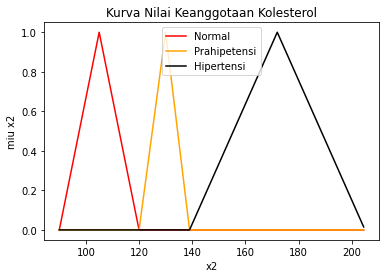

In [ ]:
# Pembentukan Himpunan Fuzzy Tekanan Darah [fungsi buat sendiri]
x_trestbps= np.arange(90, 205, 0.5) # Semesta Pembicaraan
amb_normal  = [90, 105, 120]
amb_prahipertensi  = [120, 130, 139]
amb_hipertensi = [139, 172, 205]

miu_trestbps_normal  = fungsi_segitiga(x_trestbps, amb_normal)
miu_trestbps_prahipertensi  = fungsi_segitiga(x_trestbps, amb_prahipertensi)
miu_trestbps_hipertensi  = fungsi_segitiga(x_trestbps, amb_hipertensi)

import matplotlib.pyplot as plt
plt.plot(x_trestbps, miu_trestbps_normal,  label = "Normal",  color='red')
plt.plot(x_trestbps, miu_trestbps_prahipertensi, label = "Prahipetensi", color='orange')
plt.plot(x_trestbps, miu_trestbps_hipertensi, label = "Hipertensi", color='black')
plt.xlabel('x2')
plt.ylabel('miu x2')
plt.title('Kurva Nilai Keanggotaan trestbps')
plt.legend()
plt.show()

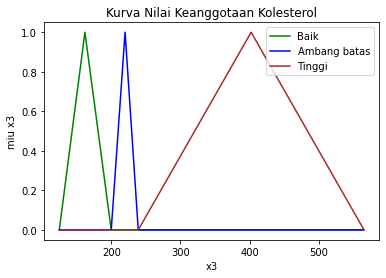

In [ ]:
# Pembentukan Himpunan Fuzzy Kolesterol [fungsi buat sendiri]
x_chol= np.arange(125, 565, 0.5) # Semesta Pembicaraan
amb_baik  = [125, 162, 200]
amb_ambang_batas  = [200, 220, 239]
amb_tinggi = [239, 402, 565]

miu_chol_baik  = fungsi_segitiga(x_chol, amb_baik)
miu_chol_ambang_batas  = fungsi_segitiga(x_chol, amb_ambang_batas)
miu_chol_tinggi  = fungsi_segitiga(x_chol, amb_tinggi)

import matplotlib.pyplot as plt
plt.plot(x_chol, miu_chol_baik,  label = "Baik",  color='green')
plt.plot(x_chol, miu_chol_ambang_batas, label = "Ambang batas", color='blue')
plt.plot(x_chol, miu_chol_tinggi, label = "Tinggi", color='brown')
plt.xlabel('x3')
plt.ylabel('miu x3')
plt.title('Kurva Nilai Keanggotaan Kolesterol')
plt.legend()
plt.show()

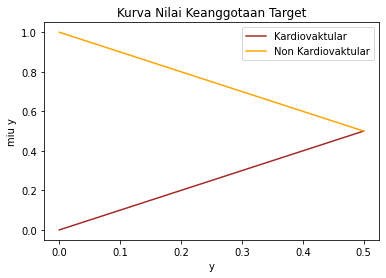

In [ ]:
# Pembentukan Himpunan Fuzzy Target [fungsi buat sendiri]
x_target= np.arange(0, 1, 0.5) # Semesta Pembicaraan
amb_kardiovaktular  = [0, 1, 1]
amb_nonkardiovaktular  = [0, 0, 1]

miu_target_kardiovaktular  = fungsi_segitiga(x_target, amb_kardiovaktular)
miu_target_nonkardiovaktular   = fungsi_segitiga(x_target, amb_nonkardiovaktular)

import matplotlib.pyplot as plt
plt.plot(x_target, miu_target_kardiovaktular,  label = "Kardiovaktular",  color='brown')
plt.plot(x_target, miu_target_nonkardiovaktular, label = "Non Kardiovaktular", color='orange')
plt.xlabel('y')
plt.ylabel('miu y')
plt.title('Kurva Nilai Keanggotaan Target')
plt.legend()
plt.show()

#Perhitungan Nilai Miu

In [ ]:
#miu x1 (age)
def fuzzyfikasi(x_array, amd_1, amd_2, amd_3, x, label_1, label_2, label_3):
    batas = (max(x_array)+min(x_array))
    awal = batas-68
    tengah = awal+20
    print(batas)
    print(awal)
    print(tengah)
    hasil=0
    if x <= awal:
        hasil=miu_fungsi_segitiga(x_array, amd_1, x)
        label_hasil = label_1
    elif awal <= x <= tengah: 
        hasil=miu_fungsi_segitiga(x_array, amd_2, x)
        label_hasil = label_2
    else:
        hasil=miu_fungsi_segitiga(x_array, amd_3, x)
        label_hasil = label_3
    return hasil, label_hasil

In [ ]:
#miu x2 (chol)
def fuzzyfikasi2(x_array, amd_1, amd_2, amd_3, x, label_1, label_2, label_3):
    batas = ((max(x_array)+min(x_array))/3)
    awal = batas-30
    tengah = batas+9
    print(batas)
    print(awal)
    print(tengah)
    hasil=0
    if x <= awal:
        hasil=miu_fungsi_segitiga(x_array, amd_1, x)
        label_hasil = label_1
    elif awal <= x <= tengah: 
        hasil=miu_fungsi_segitiga(x_array, amd_2, x)
        label_hasil = label_2
    else:
        hasil=miu_fungsi_segitiga(x_array, amd_3, x)
        label_hasil = label_3
    return hasil, label_hasil

In [ ]:
#miu x3 (trestbps)
def fuzzyfikasi3(x_array, amd_1, amd_2, amd_3, x, label_1, label_2, label_3):
    batas = ((max(x_array)+min(x_array))/2)
    awal = batas-27.5
    tengah = batas-8.5
    print(batas)
    print(awal)
    print(tengah)
    hasil=0
    if x <= awal:
        hasil=miu_fungsi_segitiga(x_array, amd_1, x)
        label_hasil = label_1
    elif awal <= x <= tengah: 
        hasil=miu_fungsi_segitiga(x_array, amd_2, x)
        label_hasil = label_2
    else:
        hasil=miu_fungsi_segitiga(x_array, amd_3, x)
        label_hasil = label_3
    return hasil, label_hasil

In [ ]:
#miu y
def fuzzyfikasi4(x_array, amd_1, amd_2, x, label_1, label_2):
    batas = (max(x_array)+min(x_array))
    awal = batas-1
    print(batas)
    print(awal)
    hasil1=0
    if x < awal:
        hasil1=miu_fungsi_segitiga(x_array, amd_1, x)
        label_hasil1 = label_1
    else:
        hasil1=miu_fungsi_segitiga(x_array, amd_2, x)
        label_hasil1 = label_2
    return hasil1, label_hasil1

In [ ]:
#miu x1
x_age= np.arange(25, 78, 0.5) # Semesta Pembicaraan
amb_muda = [25, 30, 35]
amb_parabaya = [35, 45, 55]
amb_tua = [55, 66, 78]

fuzzifikasi_age=[]
miu_age=[]
for i in df.age:
    hasil=fuzzyfikasi(x_age, amb_muda, amb_parabaya, amb_tua, i, "Muda", "Parabaya", "Tua")
    fuzz = hasil[1]
    m = hasil[0]
    fuzzifikasi_age.append(fuzz)
    miu_age.append(m)
    
len(fuzzifikasi_age)

102.5
34.5
54.5
{25.0: 0.0, 25.5: 0.0, 26.0: 0.0, 26.5: 0.0, 27.0: 0.0, 27.5: 0.0, 28.0: 0.0, 28.5: 0.0, 29.0: 0.0, 29.5: 0.0, 30.0: 0.0, 30.5: 0.0, 31.0: 0.0, 31.5: 0.0, 32.0: 0.0, 32.5: 0.0, 33.0: 0.0, 33.5: 0.0, 34.0: 0.0, 34.5: 0.0, 35.0: 0.0, 35.5: 0.0, 36.0: 0.0, 36.5: 0.0, 37.0: 0.0, 37.5: 0.0, 38.0: 0.0, 38.5: 0.0, 39.0: 0.0, 39.5: 0.0, 40.0: 0.0, 40.5: 0.0, 41.0: 0.0, 41.5: 0.0, 42.0: 0.0, 42.5: 0.0, 43.0: 0.0, 43.5: 0.0, 44.0: 0.0, 44.5: 0.0, 45.0: 0.0, 45.5: 0.0, 46.0: 0.0, 46.5: 0.0, 47.0: 0.0, 47.5: 0.0, 48.0: 0.0, 48.5: 0.0, 49.0: 0.0, 49.5: 0.0, 50.0: 0.0, 50.5: 0.0, 51.0: 0.0, 51.5: 0.0, 52.0: 0.0, 52.5: 0.0, 53.0: 0.0, 53.5: 0.0, 54.0: 0.0, 54.5: 0.0, 55.0: 0.0, 55.5: 0.045454545454545456, 56.0: 0.09090909090909091, 56.5: 0.13636363636363635, 57.0: 0.18181818181818182, 57.5: 0.22727272727272727, 58.0: 0.2727272727272727, 58.5: 0.3181818181818182, 59.0: 0.36363636363636365, 59.5: 0.4090909090909091, 60.0: 0.45454545454545453, 60.5: 0.5, 61.0: 0.5454545454545454, 61.5: 0

303

In [ ]:
#miu x2
x_trestbps= np.arange(90, 205, 0.5) # Semesta Pembicaraan
amb_normal  = [90, 105, 120]
amb_prahipertensi  = [120, 130, 139]
amb_hipertensi = [139, 172, 205]

fuzzifikasi_trestbps=[]
miu_trestbps=[]
for i in df.trestbps:
    hasil=fuzzyfikasi3(x_trestbps, amb_normal, amb_prahipertensi, amb_hipertensi, i, "Normal", "Prahipertensi", "Hipertensi")
    fuzz = hasil[1]
    m = hasil[0]
    fuzzifikasi_trestbps.append(fuzz)
    miu_trestbps.append(m)
len(fuzzifikasi_trestbps)

147.25
119.75
138.75
{90.0: 0.0, 90.5: 0.0, 91.0: 0.0, 91.5: 0.0, 92.0: 0.0, 92.5: 0.0, 93.0: 0.0, 93.5: 0.0, 94.0: 0.0, 94.5: 0.0, 95.0: 0.0, 95.5: 0.0, 96.0: 0.0, 96.5: 0.0, 97.0: 0.0, 97.5: 0.0, 98.0: 0.0, 98.5: 0.0, 99.0: 0.0, 99.5: 0.0, 100.0: 0.0, 100.5: 0.0, 101.0: 0.0, 101.5: 0.0, 102.0: 0.0, 102.5: 0.0, 103.0: 0.0, 103.5: 0.0, 104.0: 0.0, 104.5: 0.0, 105.0: 0.0, 105.5: 0.0, 106.0: 0.0, 106.5: 0.0, 107.0: 0.0, 107.5: 0.0, 108.0: 0.0, 108.5: 0.0, 109.0: 0.0, 109.5: 0.0, 110.0: 0.0, 110.5: 0.0, 111.0: 0.0, 111.5: 0.0, 112.0: 0.0, 112.5: 0.0, 113.0: 0.0, 113.5: 0.0, 114.0: 0.0, 114.5: 0.0, 115.0: 0.0, 115.5: 0.0, 116.0: 0.0, 116.5: 0.0, 117.0: 0.0, 117.5: 0.0, 118.0: 0.0, 118.5: 0.0, 119.0: 0.0, 119.5: 0.0, 120.0: 0.0, 120.5: 0.0, 121.0: 0.0, 121.5: 0.0, 122.0: 0.0, 122.5: 0.0, 123.0: 0.0, 123.5: 0.0, 124.0: 0.0, 124.5: 0.0, 125.0: 0.0, 125.5: 0.0, 126.0: 0.0, 126.5: 0.0, 127.0: 0.0, 127.5: 0.0, 128.0: 0.0, 128.5: 0.0, 129.0: 0.0, 129.5: 0.0, 130.0: 0.0, 130.5: 0.0, 131.0: 0.0, 13

303

In [ ]:
#miu x3
x_chol= np.arange(125, 565, 0.5) # Semesta Pembicaraan
amb_baik = [125, 162, 200]
amb_ambang_batas = [200, 220, 239]
amb_tinggi = [239, 402, 565]

fuzzifikasi_chol=[]
miu_chol=[]
for i in df.chol:
    hasil=fuzzyfikasi2(x_chol, amb_baik, amb_ambang_batas, amb_tinggi, i, "Baik", "Ambang batas", "Tinggi")
    fuzz = hasil[1]
    m = hasil[0]
    fuzzifikasi_chol.append(fuzz)
    miu_chol.append(m)
len(fuzzifikasi_chol)

229.83333333333334
199.83333333333334
238.83333333333334
{125.0: 0.0, 125.5: 0.0, 126.0: 0.0, 126.5: 0.0, 127.0: 0.0, 127.5: 0.0, 128.0: 0.0, 128.5: 0.0, 129.0: 0.0, 129.5: 0.0, 130.0: 0.0, 130.5: 0.0, 131.0: 0.0, 131.5: 0.0, 132.0: 0.0, 132.5: 0.0, 133.0: 0.0, 133.5: 0.0, 134.0: 0.0, 134.5: 0.0, 135.0: 0.0, 135.5: 0.0, 136.0: 0.0, 136.5: 0.0, 137.0: 0.0, 137.5: 0.0, 138.0: 0.0, 138.5: 0.0, 139.0: 0.0, 139.5: 0.0, 140.0: 0.0, 140.5: 0.0, 141.0: 0.0, 141.5: 0.0, 142.0: 0.0, 142.5: 0.0, 143.0: 0.0, 143.5: 0.0, 144.0: 0.0, 144.5: 0.0, 145.0: 0.0, 145.5: 0.0, 146.0: 0.0, 146.5: 0.0, 147.0: 0.0, 147.5: 0.0, 148.0: 0.0, 148.5: 0.0, 149.0: 0.0, 149.5: 0.0, 150.0: 0.0, 150.5: 0.0, 151.0: 0.0, 151.5: 0.0, 152.0: 0.0, 152.5: 0.0, 153.0: 0.0, 153.5: 0.0, 154.0: 0.0, 154.5: 0.0, 155.0: 0.0, 155.5: 0.0, 156.0: 0.0, 156.5: 0.0, 157.0: 0.0, 157.5: 0.0, 158.0: 0.0, 158.5: 0.0, 159.0: 0.0, 159.5: 0.0, 160.0: 0.0, 160.5: 0.0, 161.0: 0.0, 161.5: 0.0, 162.0: 0.0, 162.5: 0.0, 163.0: 0.0, 163.5: 0.0, 164.0:

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
x_target= np.arange(0, 2, 0.5) # Semesta Pembicaraan
amb_kardiovaktular  = [0, 1, 1]
amb_nonkardiovaktular  = [0, 0, 1]

fuzzifikasi_target=[]
miu_target=[]
for i in df.target:
    hasil=fuzzyfikasi4(x_target, amb_kardiovaktular, amb_nonkardiovaktular, i, "Kardiovaktular", "Nonkardiovaktular")
    fuzz = hasil[1]
    m = hasil[0]
    fuzzifikasi_target.append(fuzz)
    miu_target.append(m)
len(fuzzifikasi_target)

1.5
0.5
{0.0: 1.0, 0.5: 0.5, 1.0: 0.0, 1.5: 0.0}
1.5
0.5
{0.0: 1.0, 0.5: 0.5, 1.0: 0.0, 1.5: 0.0}
1.5
0.5
{0.0: 1.0, 0.5: 0.5, 1.0: 0.0, 1.5: 0.0}
1.5
0.5
{0.0: 1.0, 0.5: 0.5, 1.0: 0.0, 1.5: 0.0}
1.5
0.5
{0.0: 1.0, 0.5: 0.5, 1.0: 0.0, 1.5: 0.0}
1.5
0.5
{0.0: 1.0, 0.5: 0.5, 1.0: 0.0, 1.5: 0.0}
1.5
0.5
{0.0: 1.0, 0.5: 0.5, 1.0: 0.0, 1.5: 0.0}
1.5
0.5
{0.0: 1.0, 0.5: 0.5, 1.0: 0.0, 1.5: 0.0}
1.5
0.5
{0.0: 1.0, 0.5: 0.5, 1.0: 0.0, 1.5: 0.0}
1.5
0.5
{0.0: 1.0, 0.5: 0.5, 1.0: 0.0, 1.5: 0.0}
1.5
0.5
{0.0: 1.0, 0.5: 0.5, 1.0: 0.0, 1.5: 0.0}
1.5
0.5
{0.0: 1.0, 0.5: 0.5, 1.0: 0.0, 1.5: 0.0}
1.5
0.5
{0.0: 1.0, 0.5: 0.5, 1.0: 0.0, 1.5: 0.0}
1.5
0.5
{0.0: 1.0, 0.5: 0.5, 1.0: 0.0, 1.5: 0.0}
1.5
0.5
{0.0: 1.0, 0.5: 0.5, 1.0: 0.0, 1.5: 0.0}
1.5
0.5
{0.0: 1.0, 0.5: 0.5, 1.0: 0.0, 1.5: 0.0}
1.5
0.5
{0.0: 1.0, 0.5: 0.5, 1.0: 0.0, 1.5: 0.0}
1.5
0.5
{0.0: 1.0, 0.5: 0.5, 1.0: 0.0, 1.5: 0.0}
1.5
0.5
{0.0: 1.0, 0.5: 0.5, 1.0: 0.0, 1.5: 0.0}
1.5
0.5
{0.0: 1.0, 0.5: 0.5, 1.0: 0.0, 1.5: 0.0}
1.5
0.5
{0.0: 1.0, 0

303

In [ ]:
df_fuzz = pd.DataFrame({"Age":df.age,
                        "Trestbps":df.trestbps,
                        "Chol":df.chol,
                        "Target":df.target,
                        "Age_fuzz": fuzzifikasi_age,
                        "Trestbps_fuzz": fuzzifikasi_trestbps,
                        "Chol_fuzz": fuzzifikasi_chol,
                        "Target_fuzz":fuzzifikasi_target,
                        "miu_Age":miu_age,
                        "miu_Trestbps":miu_trestbps,
                        "miu_Chol":miu_chol,
                        "miu_Target": miu_target})
df_fuzz

Age  Trestbps  Chol  Target  ...   miu_Age miu_Trestbps  miu_Chol miu_Target
0     63       145   233       1  ...  0.727273     0.181818  0.315789        0.0
1     37       130   250       1  ...  0.200000     1.000000  0.067485        0.0
2     41       130   204       1  ...  0.600000     1.000000  0.200000        0.0
3     56       120   236       1  ...  0.090909     0.000000  0.157895        0.0
4     57       120   354       1  ...  0.181818     0.000000  0.705521        0.0
..   ...       ...   ...     ...  ...       ...          ...       ...        ...
298   57       140   241       0  ...  0.181818     0.030303  0.012270        0.0
299   45       110   264       0  ...  1.000000     0.666667  0.153374        0.0
300   68       144   193       0  ...  0.833333     0.151515  0.184211        0.0
301   57       130   131       0  ...  0.181818     1.000000  0.162162        0.0
302   57       130   236       0  ...  0.181818     1.000000  0.157895        0.0

[303 rows x 12 columns]

# Rule Generation

In [ ]:
df_fuzz['Rule'] = " Jika X1 " + df_fuzz['Age_fuzz'] + " dan X2 " + df_fuzz['Trestbps_fuzz'] + " Jika X3 " + df_fuzz['Chol_fuzz'] + " maka Y " + df_fuzz['Target_fuzz']
df_fuzz

Age  ...                                               Rule
0     63  ...   Jika X1 Tua dan X2 Hipertensi Jika X3 Ambang ...
1     37  ...   Jika X1 Parabaya dan X2 Prahipertensi Jika X3...
2     41  ...   Jika X1 Parabaya dan X2 Prahipertensi Jika X3...
3     56  ...   Jika X1 Tua dan X2 Prahipertensi Jika X3 Amba...
4     57  ...   Jika X1 Tua dan X2 Prahipertensi Jika X3 Ting...
..   ...  ...                                                ...
298   57  ...   Jika X1 Tua dan X2 Hipertensi Jika X3 Tinggi ...
299   45  ...   Jika X1 Parabaya dan X2 Normal Jika X3 Tinggi...
300   68  ...   Jika X1 Tua dan X2 Hipertensi Jika X3 Baik ma...
301   57  ...   Jika X1 Tua dan X2 Prahipertensi Jika X3 Baik...
302   57  ...   Jika X1 Tua dan X2 Prahipertensi Jika X3 Amba...

[303 rows x 13 columns]

In [ ]:
df_fuzz.to_excel('hasilRuleMBGD.xlsx') 

In [ ]:
df_fuzz['Rule'].value_counts()

 Jika X1 Parabaya dan X2 Prahipertensi Jika X3 Tinggi maka Y Nonkardiovaktular          27
 Jika X1 Tua dan X2 Prahipertensi Jika X3 Tinggi maka Y Kardiovaktular                  27
 Jika X1 Tua dan X2 Hipertensi Jika X3 Tinggi maka Y Kardiovaktular                     25
 Jika X1 Parabaya dan X2 Prahipertensi Jika X3 Ambang batas maka Y Nonkardiovaktular    21
 Jika X1 Tua dan X2 Hipertensi Jika X3 Tinggi maka Y Nonkardiovaktular                  16
 Jika X1 Tua dan X2 Prahipertensi Jika X3 Tinggi maka Y Nonkardiovaktular               13
 Jika X1 Parabaya dan X2 Prahipertensi Jika X3 Tinggi maka Y Kardiovaktular             12
 Jika X1 Tua dan X2 Prahipertensi Jika X3 Ambang batas maka Y Kardiovaktular            11
 Jika X1 Tua dan X2 Hipertensi Jika X3 Ambang batas maka Y Kardiovaktular               10
 Jika X1 Parabaya dan X2 Prahipertensi Jika X3 Baik maka Y Nonkardiovaktular             9
 Jika X1 Parabaya dan X2 Normal Jika X3 Tinggi maka Y Nonkardiovaktular                  9

# TSK Prediction

In [ ]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

##Rule 1

In [ ]:
rule_1 = df_fuzz[df_fuzz['Rule']==" Jika X1 Parabaya dan X2 Prahipertensi Jika X3 Tinggi maka Y Nonkardiovaktular"]
index=rule_1.index
data_rule_1=df_fuzz.iloc[index,:4]
X1=np.array(data_rule_1.iloc[::,:-1])
#Y=np.array(data_rule_1.iloc[::,:1])
Y1=np.array(data_rule_1.iloc[:,2])
data_rule_1.head()

Age  Trestbps  Chol  Target
1    37       130   250       1
7    44       120   263       1
11   48       130   275       1
12   49       130   266       1
33   54       125   273       1

In [ ]:
data_rule_1.to_csv('hasilrule1.csv') 

###Mini Batch Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df_rule1=pd.read_csv('hasilrule1.csv',sep=',')
df_rule1

Unnamed: 0  Age  Trestbps  Chol  Target
0            1   37       130   250       1
1            7   44       120   263       1
2           11   48       130   275       1
3           12   49       130   266       1
4           33   54       125   273       1
5           36   54       135   304       1
6           41   48       130   245       1
7           43   53       130   264       1
8           45   52       120   325       1
9           47   47       138   257       1
10          50   51       130   256       1
11          70   54       120   258       1
12          76   51       125   245       1
13          81   45       128   308       1
14          90   48       124   255       1
15          93   54       132   288       1
16          98   43       130   315       1
17          99   53       130   246       1
18         103   42       120   240       1
19         108   50       120   244       1
20         119   46       138   243       1
21         131   49       134   271       1
22         132   42       120   295       1
23         134   41       126   306       1
24         135   49       130   269       1
25         140   51       120   295       1
26         156   47       130   253       1

In [ ]:
df_rule1=df_rule1.drop(columns=['Unnamed: 0'])      #diilangin kolom
df_rule1

Age  Trestbps  Chol  Target
0    37       130   250       1
1    44       120   263       1
2    48       130   275       1
3    49       130   266       1
4    54       125   273       1
5    54       135   304       1
6    48       130   245       1
7    53       130   264       1
8    52       120   325       1
9    47       138   257       1
10   51       130   256       1
11   54       120   258       1
12   51       125   245       1
13   45       128   308       1
14   48       124   255       1
15   54       132   288       1
16   43       130   315       1
17   53       130   246       1
18   42       120   240       1
19   50       120   244       1
20   46       138   243       1
21   49       134   271       1
22   42       120   295       1
23   41       126   306       1
24   49       130   269       1
25   51       120   295       1
26   47       130   253       1

In [ ]:
from sklearn import preprocessing
sx1 = preprocessing.MinMaxScaler()
sy1 = preprocessing.MinMaxScaler()

scaled_X1 = sx1.fit_transform(data_rule_1.drop('Target',axis='columns'))
scaled_y1 = sy1.fit_transform(data_rule_1['Target'].values.reshape(rule_1.shape[0],1))

scaled_X1

array([[0.        , 0.55555556, 0.11764706],
       [0.41176471, 0.        , 0.27058824],
       [0.64705882, 0.55555556, 0.41176471],
       [0.70588235, 0.55555556, 0.30588235],
       [1.        , 0.27777778, 0.38823529],
       [1.        , 0.83333333, 0.75294118],
       [0.64705882, 0.55555556, 0.05882353],
       [0.94117647, 0.55555556, 0.28235294],
       [0.88235294, 0.        , 1.        ],
       [0.58823529, 1.        , 0.2       ],
       [0.82352941, 0.55555556, 0.18823529],
       [1.        , 0.        , 0.21176471],
       [0.82352941, 0.27777778, 0.05882353],
       [0.47058824, 0.44444444, 0.8       ],
       [0.64705882, 0.22222222, 0.17647059],
       [1.        , 0.66666667, 0.56470588],
       [0.35294118, 0.55555556, 0.88235294],
       [0.94117647, 0.55555556, 0.07058824],
       [0.29411765, 0.        , 0.        ],
       [0.76470588, 0.        , 0.04705882],
       [0.52941176, 1.        , 0.03529412],
       [0.70588235, 0.77777778, 0.36470588],
       [0.

In [ ]:
scaled_y1_reshape=scaled_y1.reshape(scaled_y1.shape[0],)
scaled_y1_reshape

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
def mini_batch_gradient_descent_rule1(X1, y1, iterasi, batch_size = 3, learning_rate = 0.0001):

    jumlah_variabel_rule1 = X1.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule1 = np.ones(shape=(jumlah_variabel_rule1))       # b1, b2, ... b(jumlah variabel)
    b0_rule1 = 0                                         # b0 atau bias
    n = X1.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule1_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule1_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule1_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule1 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X1_smntr = X1[random_indices]
        y1_smntr = y1[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule1 = X1_smntr[j:j+batch_size]
            yj_rule1 = y1_smntr[j:j+batch_size]
            
            y1_pred = np.dot(bpoly_rule1, Xj_rule1.T) + b0_rule1           # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule1_grad = -(2/len(Xj_rule1))*(Xj_rule1.T.dot(yj_rule1-y1_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule1_grad = -(2/len(Xj_rule1))*np.sum(yj_rule1-y1_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule1 = bpoly_rule1 - learning_rate * bpoly_rule1_grad        # Memperbaharui bpoly(bobot) setiap iterasi
            b0_rule1 = b0_rule1 - learning_rate * b0_rule1_grad                 # Memperbaharui bpoly(bobot) setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule1 in range(jumlah_variabel_rule1):
                bp_rule1=bpoly_rule1[jv_rule1]
                bp.append(bp_rule1)
            b_rule1=[b0_rule1]+bp
        
            cost_rule1 = np.mean(np.square(yj_rule1-y1_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule1_list.append(cost_rule1)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule1_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule1_list.append(b_rule1)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule1, b0_rule1, cost_rule1, b_rule1_list, cost_rule1_list, iterasi_rule1_list  # Output

In [ ]:
n = scaled_X1.shape[0]

In [ ]:
for i in range(10000):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X1_smntr = scaled_X1[random_indices]
        y1_smntr = scaled_y1[random_indices]
        
        for j in range(0, n, 3):
            Xj_rule1 = X1_smntr[j:j+3]
            yj_rule1 = y1_smntr[j:j+3]

In [ ]:
 X1_smntr

array([[0.88235294, 0.        , 1.        ],
       [0.47058824, 0.44444444, 0.8       ],
       [0.58823529, 1.        , 0.2       ],
       [0.70588235, 0.77777778, 0.36470588],
       [0.        , 0.55555556, 0.11764706],
       [1.        , 0.        , 0.21176471],
       [0.35294118, 0.55555556, 0.88235294],
       [0.94117647, 0.55555556, 0.07058824],
       [0.82352941, 0.27777778, 0.05882353],
       [0.70588235, 0.55555556, 0.34117647],
       [0.41176471, 0.        , 0.27058824],
       [1.        , 0.27777778, 0.38823529],
       [1.        , 0.83333333, 0.75294118],
       [0.64705882, 0.55555556, 0.41176471],
       [1.        , 0.66666667, 0.56470588],
       [0.29411765, 0.        , 0.64705882],
       [0.70588235, 0.55555556, 0.30588235],
       [0.82352941, 0.        , 0.64705882],
       [0.23529412, 0.33333333, 0.77647059],
       [0.29411765, 0.        , 0.        ],
       [0.58823529, 0.55555556, 0.15294118],
       [0.52941176, 1.        , 0.03529412],
       [0.

In [ ]:
 y1_smntr 

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [ ]:
jumlah_variabel_rule1 = scaled_X1.shape[1]
bpoly_rule1 = np.ones(shape=(jumlah_variabel_rule1))       # b1, b2, ... b(jumlah variabel)
b0_rule1 = 0 

In [ ]:
len(Xj_rule1)

3

In [ ]:
y1_pred = np.dot(bpoly_rule1, Xj_rule1.T) + b0_rule1

In [ ]:
y1_pred

array([1.04575163, 0.81176471, 1.26143791])

In [ ]:
yj_rule1

array([[0.],
       [0.],
       [0.]])

In [ ]:
Xj_rule1

array([[0.64705882, 0.22222222, 0.17647059],
       [0.76470588, 0.        , 0.04705882],
       [0.64705882, 0.55555556, 0.05882353]])

In [ ]:
import time
mulai_rule1 = time.time()
mb_bpoly_rule1, mb_b0_rule1, mb_cost_rule1, mb_b_rule1_list, mb_cost_rule1_list, mb_iterasi_rule1_list=mini_batch_gradient_descent_rule1 (scaled_X1, 
                                                                                                                                        scaled_y1_reshape,
                                                                                                                                        iterasi=10000, 
                                                                                                                                        batch_size = 3, 
                                                                                                                                        learning_rate = 0.0001)
selesai_rule1 = time.time()
waktu_komputasi_rule1 = (selesai_rule1 - mulai_rule1)
print("Waktu Komputasi Rule 1: ",waktu_komputasi_rule1)

Waktu Komputasi Rule 1:  13.566286087036133


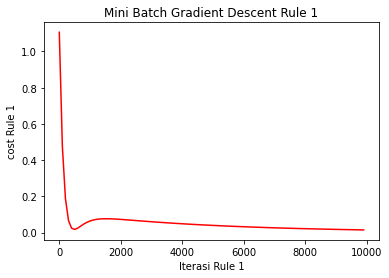

In [ ]:
plt.xlabel("Iterasi Rule 1")
plt.ylabel("cost Rule 1")
plt.title("Mini Batch Gradient Descent Rule 1")
plt.plot(mb_iterasi_rule1_list,mb_cost_rule1_list, color='red', label='Eror')
plt.show()

In [ ]:
mb_cost_rule1

0.014538613051983602

In [ ]:
mb_b0_rule1

-0.3776905788423278

In [ ]:
mb_bpoly_rule1 #hasil untuk x1 dan x2

array([0.26569587, 0.21740685, 0.26076446])

In [ ]:
data_rule_1

Age  Trestbps  Chol  Target
1     37       130   250       1
7     44       120   263       1
11    48       130   275       1
12    49       130   266       1
33    54       125   273       1
36    54       135   304       1
41    48       130   245       1
43    53       130   264       1
45    52       120   325       1
47    47       138   257       1
50    51       130   256       1
70    54       120   258       1
76    51       125   245       1
81    45       128   308       1
90    48       124   255       1
93    54       132   288       1
98    43       130   315       1
99    53       130   246       1
103   42       120   240       1
108   50       120   244       1
119   46       138   243       1
131   49       134   271       1
132   42       120   295       1
134   41       126   306       1
135   49       130   269       1
140   51       120   295       1
156   47       130   253       1

In [ ]:
X1=np.array(data_rule_1.iloc[::,:-1])
X1

array([[ 37, 130, 250],
       [ 44, 120, 263],
       [ 48, 130, 275],
       [ 49, 130, 266],
       [ 54, 125, 273],
       [ 54, 135, 304],
       [ 48, 130, 245],
       [ 53, 130, 264],
       [ 52, 120, 325],
       [ 47, 138, 257],
       [ 51, 130, 256],
       [ 54, 120, 258],
       [ 51, 125, 245],
       [ 45, 128, 308],
       [ 48, 124, 255],
       [ 54, 132, 288],
       [ 43, 130, 315],
       [ 53, 130, 246],
       [ 42, 120, 240],
       [ 50, 120, 244],
       [ 46, 138, 243],
       [ 49, 134, 271],
       [ 42, 120, 295],
       [ 41, 126, 306],
       [ 49, 130, 269],
       [ 51, 120, 295],
       [ 47, 130, 253]])

In [ ]:
Y1=np.array(data_rule_1.iloc[:,3])  #mengambil angka dari kolom
Y1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

In [ ]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree diganti menjadi 4
X1_poly = poly_reg.fit_transform(X1)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X1_poly, Y1) 
# Proses Training Model
poly_reg.fit(X1, Y1) 

# Memprediksi hasil dengan regresi polynomial
# Memprediksi hasil dengan regresi polynomial
y1_pred=lin_reg_2.predict(poly_reg.fit_transform(X1))
y1_pred

data_rule_1['pred'] = y1_pred
data_rule_1

Age  Trestbps  Chol  Target  pred
1     37       130   250       1   1.0
7     44       120   263       1   1.0
11    48       130   275       1   1.0
12    49       130   266       1   1.0
33    54       125   273       1   1.0
36    54       135   304       1   1.0
41    48       130   245       1   1.0
43    53       130   264       1   1.0
45    52       120   325       1   1.0
47    47       138   257       1   1.0
50    51       130   256       1   1.0
70    54       120   258       1   1.0
76    51       125   245       1   1.0
81    45       128   308       1   1.0
90    48       124   255       1   1.0
93    54       132   288       1   1.0
98    43       130   315       1   1.0
99    53       130   246       1   1.0
103   42       120   240       1   1.0
108   50       120   244       1   1.0
119   46       138   243       1   1.0
131   49       134   271       1   1.0
132   42       120   295       1   1.0
134   41       126   306       1   1.0
135   49       130   269       1   1.0
140   51       120   295       1   1.0
156   47       130   253       1   1.0

##Rule 2


In [ ]:
rule_2 = df_fuzz[df_fuzz['Rule']==" Jika X1 Tua dan X2 Prahipertensi Jika X3 Tinggi maka Y Kardiovaktular"]
index=rule_2.index
data_rule_2=df_fuzz.iloc[index,:4]
data_rule_2

Age  Trestbps  Chol  Target
168   63       130   254       0
170   56       130   256       0
172   58       120   284       0
180   55       132   353       0
182   61       130   330       0
186   60       130   253       0
197   67       125   254       0
198   62       120   267       0
201   60       125   258       0
211   61       120   260       0
214   56       125   249       0
216   62       130   263       0
217   63       130   330       0
218   65       135   254       0
222   65       138   282       0
226   62       120   281       0
229   64       125   309       0
233   64       120   246       0
234   70       130   322       0
236   58       125   300       0
238   77       125   304       0
246   56       134   409       0
252   62       138   294       0
256   58       128   259       0
269   56       130   283       0
277   57       124   261       0
278   58       136   319       0

In [ ]:
data_rule_2.to_csv('hasilrule2.csv') 

###Mini Batch Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df_rule2=pd.read_csv('hasilrule2.csv',sep=',')
df_rule2

Unnamed: 0  Age  Trestbps  Chol  Target
0          168   63       130   254       0
1          170   56       130   256       0
2          172   58       120   284       0
3          180   55       132   353       0
4          182   61       130   330       0
5          186   60       130   253       0
6          197   67       125   254       0
7          198   62       120   267       0
8          201   60       125   258       0
9          211   61       120   260       0
10         214   56       125   249       0
11         216   62       130   263       0
12         217   63       130   330       0
13         218   65       135   254       0
14         222   65       138   282       0
15         226   62       120   281       0
16         229   64       125   309       0
17         233   64       120   246       0
18         234   70       130   322       0
19         236   58       125   300       0
20         238   77       125   304       0
21         246   56       134   409       0
22         252   62       138   294       0
23         256   58       128   259       0
24         269   56       130   283       0
25         277   57       124   261       0
26         278   58       136   319       0

In [ ]:
df_rule2=df_rule2.drop(columns=['Unnamed: 0'])
df_rule2

Age  Trestbps  Chol  Target
0    63       130   254       0
1    56       130   256       0
2    58       120   284       0
3    55       132   353       0
4    61       130   330       0
5    60       130   253       0
6    67       125   254       0
7    62       120   267       0
8    60       125   258       0
9    61       120   260       0
10   56       125   249       0
11   62       130   263       0
12   63       130   330       0
13   65       135   254       0
14   65       138   282       0
15   62       120   281       0
16   64       125   309       0
17   64       120   246       0
18   70       130   322       0
19   58       125   300       0
20   77       125   304       0
21   56       134   409       0
22   62       138   294       0
23   58       128   259       0
24   56       130   283       0
25   57       124   261       0
26   58       136   319       0

In [ ]:
from sklearn import preprocessing
sx2 = preprocessing.MinMaxScaler()
sy2 = preprocessing.MinMaxScaler()

scaled_X2 = sx2.fit_transform(data_rule_2.drop('Target',axis='columns'))
scaled_y2 = sy2.fit_transform(data_rule_2['Target'].values.reshape(rule_2.shape[0],1))

scaled_X2

array([[0.36363636, 0.55555556, 0.04907975],
       [0.04545455, 0.55555556, 0.06134969],
       [0.13636364, 0.        , 0.23312883],
       [0.        , 0.66666667, 0.65644172],
       [0.27272727, 0.55555556, 0.51533742],
       [0.22727273, 0.55555556, 0.04294479],
       [0.54545455, 0.27777778, 0.04907975],
       [0.31818182, 0.        , 0.12883436],
       [0.22727273, 0.27777778, 0.07361963],
       [0.27272727, 0.        , 0.08588957],
       [0.04545455, 0.27777778, 0.01840491],
       [0.31818182, 0.55555556, 0.10429448],
       [0.36363636, 0.55555556, 0.51533742],
       [0.45454545, 0.83333333, 0.04907975],
       [0.45454545, 1.        , 0.2208589 ],
       [0.31818182, 0.        , 0.21472393],
       [0.40909091, 0.27777778, 0.38650307],
       [0.40909091, 0.        , 0.        ],
       [0.68181818, 0.55555556, 0.46625767],
       [0.13636364, 0.27777778, 0.33128834],
       [1.        , 0.27777778, 0.35582822],
       [0.04545455, 0.77777778, 1.        ],
       [0.

In [ ]:
scaled_y2_reshape=scaled_y2.reshape(scaled_y2.shape[0],)
scaled_y2_reshape

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
def mini_batch_gradient_descent_rule2(X2, y2, iterasi, batch_size = 5, learning_rate = 0.0001):

    jumlah_variabel_rule2 = X2.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule2 = np.ones(shape=(jumlah_variabel_rule2))       # b1, b2, ... b(jumlah variabel)
    b0_rule2 = 0                                         # b0 atau bias
    n = X2.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule2_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule2_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule2_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule2 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X2_smntr = X2[random_indices]
        y2_smntr = y2[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule2 = X2_smntr[j:j+batch_size]
            yj_rule2 = y2_smntr[j:j+batch_size]
            
            y2_pred = np.dot(bpoly_rule2, Xj_rule2.T) + b0_rule2           # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule2_grad = -(2/len(Xj_rule2))*(Xj_rule2.T.dot(yj_rule2-y2_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule2_grad = -(2/len(Xj_rule2))*np.sum(yj_rule2-y2_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule2 = bpoly_rule2 - learning_rate * bpoly_rule2_grad        # Memperbaharui bpoly setiap iterasi
            b0_rule2 = b0_rule2 - learning_rate * b0_rule2_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule2 in range(jumlah_variabel_rule2):
                bp_rule2=bpoly_rule2[jv_rule2]
                bp.append(bp_rule2)
            b_rule2=[b0_rule2]+bp
        
            cost_rule2 = np.mean(np.square(yj_rule2-y2_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule2_list.append(cost_rule2)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule2_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule2_list.append(b_rule2)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule2, b0_rule2, cost_rule2, b_rule2_list, cost_rule2_list, iterasi_rule2_list  # Output

In [ ]:
import time
mulai_rule2 = time.time()
mb_bpoly_rule2, mb_b0_rule2, mb_cost_rule2, mb_b_rule2_list, mb_cost_rule2_list, mb_iterasi_rule2_list=mini_batch_gradient_descent_rule2 (scaled_X2, 
                                                                                                                                        scaled_y2_reshape,
                                                                                                                                        iterasi=10000, 
                                                                                                                                        batch_size = 5, 
                                                                                                                                        learning_rate = 0.0001)
selesai_rule2 = time.time()
waktu_komputasi_rule2 = (selesai_rule2 - mulai_rule2)
print("Waktu Komputasi Rule 2: ",waktu_komputasi_rule2)

Waktu Komputasi Rule 2:  7.56254506111145


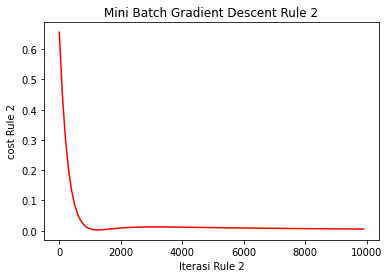

In [ ]:
plt.xlabel("Iterasi Rule 2")
plt.ylabel("cost Rule 2")
plt.title("Mini Batch Gradient Descent Rule 2")
plt.plot(mb_iterasi_rule2_list,mb_cost_rule2_list, color='red', label='Eror')
plt.show()

In [ ]:
mb_cost_rule2

0.005480558662689683

In [ ]:
mb_b0_rule2

-0.39892293262977707

In [ ]:
mb_bpoly_rule2 #hasil untuk x1 dan x2

array([0.5653424 , 0.24494981, 0.45008343])

In [ ]:
data_rule_2

Age  Trestbps  Chol  Target
168   63       130   254       0
170   56       130   256       0
172   58       120   284       0
180   55       132   353       0
182   61       130   330       0
186   60       130   253       0
197   67       125   254       0
198   62       120   267       0
201   60       125   258       0
211   61       120   260       0
214   56       125   249       0
216   62       130   263       0
217   63       130   330       0
218   65       135   254       0
222   65       138   282       0
226   62       120   281       0
229   64       125   309       0
233   64       120   246       0
234   70       130   322       0
236   58       125   300       0
238   77       125   304       0
246   56       134   409       0
252   62       138   294       0
256   58       128   259       0
269   56       130   283       0
277   57       124   261       0
278   58       136   319       0

In [ ]:
X2=np.array(data_rule_2.iloc[::,:-1])
X2

array([[ 63, 130, 254],
       [ 56, 130, 256],
       [ 58, 120, 284],
       [ 55, 132, 353],
       [ 61, 130, 330],
       [ 60, 130, 253],
       [ 67, 125, 254],
       [ 62, 120, 267],
       [ 60, 125, 258],
       [ 61, 120, 260],
       [ 56, 125, 249],
       [ 62, 130, 263],
       [ 63, 130, 330],
       [ 65, 135, 254],
       [ 65, 138, 282],
       [ 62, 120, 281],
       [ 64, 125, 309],
       [ 64, 120, 246],
       [ 70, 130, 322],
       [ 58, 125, 300],
       [ 77, 125, 304],
       [ 56, 134, 409],
       [ 62, 138, 294],
       [ 58, 128, 259],
       [ 56, 130, 283],
       [ 57, 124, 261],
       [ 58, 136, 319]])

In [ ]:
Y2=np.array(data_rule_2.iloc[:,3])
Y2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [ ]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree diganti menjadi 4
X2_poly = poly_reg.fit_transform(X2)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X2_poly, Y2) 
# Proses Training Model
poly_reg.fit(X2, Y2) 

# Memprediksi hasil dengan regresi polynomial
# Memprediksi hasil dengan regresi polynomial
y2_pred=lin_reg_2.predict(poly_reg.fit_transform(X2))
y2_pred

data_rule_2['pred'] = y2_pred
data_rule_2

Age  Trestbps  Chol  Target  pred
168   63       130   254       0   0.0
170   56       130   256       0   0.0
172   58       120   284       0   0.0
180   55       132   353       0   0.0
182   61       130   330       0   0.0
186   60       130   253       0   0.0
197   67       125   254       0   0.0
198   62       120   267       0   0.0
201   60       125   258       0   0.0
211   61       120   260       0   0.0
214   56       125   249       0   0.0
216   62       130   263       0   0.0
217   63       130   330       0   0.0
218   65       135   254       0   0.0
222   65       138   282       0   0.0
226   62       120   281       0   0.0
229   64       125   309       0   0.0
233   64       120   246       0   0.0
234   70       130   322       0   0.0
236   58       125   300       0   0.0
238   77       125   304       0   0.0
246   56       134   409       0   0.0
252   62       138   294       0   0.0
256   58       128   259       0   0.0
269   56       130   283       0   0.0
277   57       124   261       0   0.0
278   58       136   319       0   0.0

##Rule 3

In [ ]:
rule_3 = df_fuzz[df_fuzz['Rule']==" Jika X1 Tua dan X2 Hipertensi Jika X3 Tinggi maka Y Kardiovaktular"]
index=rule_3.index
data_rule_3=df_fuzz.iloc[index,:4]
data_rule_3

Age  Trestbps  Chol  Target
165   67       160   286       0
167   62       140   268       0
177   64       140   335       0
179   57       150   276       0
193   60       145   282       0
195   59       170   326       0
202   58       150   270       0
203   68       180   274       0
207   60       150   258       0
213   61       145   307       0
220   63       150   407       0
223   56       200   288       0
228   59       170   288       0
231   57       165   289       0
232   55       160   289       0
237   60       140   293       0
240   70       160   269       0
241   59       174   249       0
243   57       152   274       0
247   66       160   246       0
249   69       140   254       0
254   59       160   273       0
258   62       150   244       0
266   55       180   327       0
298   57       140   241       0

In [ ]:
data_rule_3.to_csv('hasilrule3.csv') 

###Mini Batch Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df_rule3=pd.read_csv('hasilrule3.csv',sep=',')
df_rule3

Unnamed: 0  Age  Trestbps  Chol  Target
0          165   67       160   286       0
1          167   62       140   268       0
2          177   64       140   335       0
3          179   57       150   276       0
4          193   60       145   282       0
5          195   59       170   326       0
6          202   58       150   270       0
7          203   68       180   274       0
8          207   60       150   258       0
9          213   61       145   307       0
10         220   63       150   407       0
11         223   56       200   288       0
12         228   59       170   288       0
13         231   57       165   289       0
14         232   55       160   289       0
15         237   60       140   293       0
16         240   70       160   269       0
17         241   59       174   249       0
18         243   57       152   274       0
19         247   66       160   246       0
20         249   69       140   254       0
21         254   59       160   273       0
22         258   62       150   244       0
23         266   55       180   327       0
24         298   57       140   241       0

In [ ]:
#df_rule3=df_rule3.drop(columns=['Unnamed: 0'])
#df_rule3

In [ ]:
from sklearn import preprocessing
sx3 = preprocessing.MinMaxScaler()
sy3 = preprocessing.MinMaxScaler()

scaled_X3 = sx3.fit_transform(data_rule_3.drop('Target',axis='columns'))
scaled_y3 = sy3.fit_transform(data_rule_3['Target'].values.reshape(rule_3.shape[0],1))

scaled_X3

array([[0.8       , 0.33333333, 0.27108434],
       [0.46666667, 0.        , 0.1626506 ],
       [0.6       , 0.        , 0.56626506],
       [0.13333333, 0.16666667, 0.21084337],
       [0.33333333, 0.08333333, 0.24698795],
       [0.26666667, 0.5       , 0.51204819],
       [0.2       , 0.16666667, 0.1746988 ],
       [0.86666667, 0.66666667, 0.19879518],
       [0.33333333, 0.16666667, 0.10240964],
       [0.4       , 0.08333333, 0.39759036],
       [0.53333333, 0.16666667, 1.        ],
       [0.06666667, 1.        , 0.28313253],
       [0.26666667, 0.5       , 0.28313253],
       [0.13333333, 0.41666667, 0.28915663],
       [0.        , 0.33333333, 0.28915663],
       [0.33333333, 0.        , 0.31325301],
       [1.        , 0.33333333, 0.1686747 ],
       [0.26666667, 0.56666667, 0.04819277],
       [0.13333333, 0.2       , 0.19879518],
       [0.73333333, 0.33333333, 0.03012048],
       [0.93333333, 0.        , 0.07831325],
       [0.26666667, 0.33333333, 0.19277108],
       [0.

In [ ]:
scaled_y3_reshape=scaled_y3.reshape(scaled_y3.shape[0],)
scaled_y3_reshape

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
def mini_batch_gradient_descent_rule3(X3, y3, iterasi, batch_size = 3, learning_rate = 0.0001):

    jumlah_variabel_rule3 = X3.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule3 = np.ones(shape=(jumlah_variabel_rule3))       # b1, b2, ... b(jumlah variabel)
    b0_rule3 = 0                                         # b0 atau bias
    n = X3.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule3_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule3_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule3_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule3 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X3_smntr = X3[random_indices]
        y3_smntr = y3[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule3 = X3_smntr[j:j+batch_size]
            yj_rule3 = y3_smntr[j:j+batch_size]
            
            y3_pred = np.dot(bpoly_rule3, Xj_rule3.T) + b0_rule3           # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule3_grad = -(2/len(Xj_rule3))*(Xj_rule3.T.dot(yj_rule3-y3_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule3_grad = -(2/len(Xj_rule3))*np.sum(yj_rule3-y3_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule3 = bpoly_rule3 - learning_rate * bpoly_rule3_grad        # Memperbaharui bpoly setiap iterasi
            b0_rule3 = b0_rule3 - learning_rate * b0_rule3_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule3 in range(jumlah_variabel_rule3):
                bp_rule3=bpoly_rule3[jv_rule3]
                bp.append(bp_rule3)
            b_rule3=[b0_rule3]+bp
        
            cost_rule3 = np.mean(np.square(yj_rule3-y3_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule3_list.append(cost_rule3)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule3_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule3_list.append(b_rule3)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule3, b0_rule3, cost_rule3, b_rule3_list, cost_rule3_list, iterasi_rule3_list  # Output

In [ ]:
import time
mulai_rule3 = time.time()
mb_bpoly_rule3, mb_b0_rule3, mb_cost_rule3, mb_b_rule3_list, mb_cost_rule3_list, mb_iterasi_rule3_list=mini_batch_gradient_descent_rule3 (scaled_X3, 
                                                                                                                                        scaled_y3_reshape,
                                                                                                                                        iterasi=10000, 
                                                                                                                                        batch_size = 3, 
                                                                                                                                        learning_rate = 0.0001)
selesai_rule3 = time.time()
waktu_komputasi_rule3 = (selesai_rule3 - mulai_rule3)
print("Waktu Komputasi Rule 3: ",waktu_komputasi_rule3)

Waktu Komputasi Rule 3:  5.394744396209717


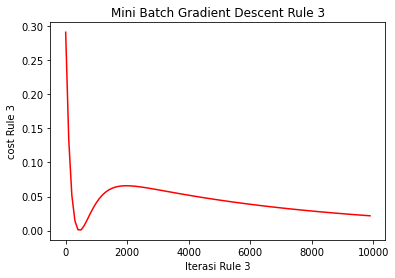

In [ ]:
plt.xlabel("Iterasi Rule 3")
plt.ylabel("cost Rule 3")
plt.title("Mini Batch Gradient Descent Rule 3")
plt.plot(mb_iterasi_rule3_list,mb_cost_rule3_list, color='red', label='Eror')
plt.show()

In [ ]:
mb_cost_rule3

0.02143160558185778

In [ ]:
mb_b0_rule3

-0.3488006692056562

In [ ]:
mb_bpoly_rule3 #hasil untuk x1 dan x2

array([0.32185637, 0.36868022, 0.43858045])

In [ ]:
data_rule_3

Age  Trestbps  Chol  Target
165   67       160   286       0
167   62       140   268       0
177   64       140   335       0
179   57       150   276       0
193   60       145   282       0
195   59       170   326       0
202   58       150   270       0
203   68       180   274       0
207   60       150   258       0
213   61       145   307       0
220   63       150   407       0
223   56       200   288       0
228   59       170   288       0
231   57       165   289       0
232   55       160   289       0
237   60       140   293       0
240   70       160   269       0
241   59       174   249       0
243   57       152   274       0
247   66       160   246       0
249   69       140   254       0
254   59       160   273       0
258   62       150   244       0
266   55       180   327       0
298   57       140   241       0

In [ ]:
X3=np.array(data_rule_3.iloc[::,:-1])
X3

array([[ 67, 160, 286],
       [ 62, 140, 268],
       [ 64, 140, 335],
       [ 57, 150, 276],
       [ 60, 145, 282],
       [ 59, 170, 326],
       [ 58, 150, 270],
       [ 68, 180, 274],
       [ 60, 150, 258],
       [ 61, 145, 307],
       [ 63, 150, 407],
       [ 56, 200, 288],
       [ 59, 170, 288],
       [ 57, 165, 289],
       [ 55, 160, 289],
       [ 60, 140, 293],
       [ 70, 160, 269],
       [ 59, 174, 249],
       [ 57, 152, 274],
       [ 66, 160, 246],
       [ 69, 140, 254],
       [ 59, 160, 273],
       [ 62, 150, 244],
       [ 55, 180, 327],
       [ 57, 140, 241]])

In [ ]:
Y3=np.array(data_rule_3.iloc[:,3])
Y3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [ ]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree diganti menjadi 4
X3_poly = poly_reg.fit_transform(X3)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X3_poly, Y3) 
# Proses Training Model
poly_reg.fit(X3, Y3) 

# Memprediksi hasil dengan regresi polynomial
y3_pred=lin_reg_2.predict(poly_reg.fit_transform(X3))
y3_pred

data_rule_3['pred'] = y3_pred
data_rule_3

Age  Trestbps  Chol  Target  pred
165   67       160   286       0   0.0
167   62       140   268       0   0.0
177   64       140   335       0   0.0
179   57       150   276       0   0.0
193   60       145   282       0   0.0
195   59       170   326       0   0.0
202   58       150   270       0   0.0
203   68       180   274       0   0.0
207   60       150   258       0   0.0
213   61       145   307       0   0.0
220   63       150   407       0   0.0
223   56       200   288       0   0.0
228   59       170   288       0   0.0
231   57       165   289       0   0.0
232   55       160   289       0   0.0
237   60       140   293       0   0.0
240   70       160   269       0   0.0
241   59       174   249       0   0.0
243   57       152   274       0   0.0
247   66       160   246       0   0.0
249   69       140   254       0   0.0
254   59       160   273       0   0.0
258   62       150   244       0   0.0
266   55       180   327       0   0.0
298   57       140   241       0   0.0

##Rule 4

In [ ]:
rule_4 = df_fuzz[df_fuzz['Rule']==" Jika X1 Parabaya dan X2 Prahipertensi Jika X3 Ambang batas maka Y Nonkardiovaktular"]
index=rule_4.index
data_rule_4=df_fuzz.iloc[index,:4]
data_rule_4

Age  Trestbps  Chol  Target
2     41       130   204       1
15    50       120   219       1
21    44       130   233       1
32    44       130   219       1
34    51       125   213       1
48    53       128   216       1
49    53       138   234       1
55    52       134   201       1
56    48       122   222       1
63    41       135   203       1
67    45       130   234       1
68    44       120   220       1
74    43       122   213       1
78    52       128   205       1
92    52       138   223       1
107   45       138   236       1
115   37       120   215       1
116   41       130   214       1
142   42       120   209       1
148   44       120   226       1
154   39       138   220       1

In [ ]:
data_rule_4.to_csv('hasilrule4.csv') 

###Mini Batch Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df_rule4=pd.read_csv('hasilrule4.csv',sep=',')
df_rule4

Unnamed: 0  Age  Trestbps  Chol  Target
0            2   41       130   204       1
1           15   50       120   219       1
2           21   44       130   233       1
3           32   44       130   219       1
4           34   51       125   213       1
5           48   53       128   216       1
6           49   53       138   234       1
7           55   52       134   201       1
8           56   48       122   222       1
9           63   41       135   203       1
10          67   45       130   234       1
11          68   44       120   220       1
12          74   43       122   213       1
13          78   52       128   205       1
14          92   52       138   223       1
15         107   45       138   236       1
16         115   37       120   215       1
17         116   41       130   214       1
18         142   42       120   209       1
19         148   44       120   226       1
20         154   39       138   220       1

In [ ]:
#df_rule4=df_rule4.drop(columns=['Unnamed: 0'])
#df_rule4

In [ ]:
from sklearn import preprocessing
sx4 = preprocessing.MinMaxScaler()
sy4 = preprocessing.MinMaxScaler()

scaled_X4 = sx4.fit_transform(data_rule_4.drop('Target',axis='columns'))
scaled_y4 = sy4.fit_transform(data_rule_4['Target'].values.reshape(rule_4.shape[0],1))

scaled_X4

array([[0.25      , 0.55555556, 0.08571429],
       [0.8125    , 0.        , 0.51428571],
       [0.4375    , 0.55555556, 0.91428571],
       [0.4375    , 0.55555556, 0.51428571],
       [0.875     , 0.27777778, 0.34285714],
       [1.        , 0.44444444, 0.42857143],
       [1.        , 1.        , 0.94285714],
       [0.9375    , 0.77777778, 0.        ],
       [0.6875    , 0.11111111, 0.6       ],
       [0.25      , 0.83333333, 0.05714286],
       [0.5       , 0.55555556, 0.94285714],
       [0.4375    , 0.        , 0.54285714],
       [0.375     , 0.11111111, 0.34285714],
       [0.9375    , 0.44444444, 0.11428571],
       [0.9375    , 1.        , 0.62857143],
       [0.5       , 1.        , 1.        ],
       [0.        , 0.        , 0.4       ],
       [0.25      , 0.55555556, 0.37142857],
       [0.3125    , 0.        , 0.22857143],
       [0.4375    , 0.        , 0.71428571],
       [0.125     , 1.        , 0.54285714]])

In [ ]:
scaled_y4_reshape=scaled_y4.reshape(scaled_y4.shape[0],)
scaled_y4_reshape

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

In [ ]:
def mini_batch_gradient_descent_rule4(X4, y4, iterasi, batch_size = 4, learning_rate = 0.0001):

    jumlah_variabel_rule4 = X4.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule4 = np.ones(shape=(jumlah_variabel_rule4))       # b1, b2, ... b(jumlah variabel)
    b0_rule4 = 0                                         # b0 atau bias
    n = X4.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule4_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule4_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule4_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule4 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X4_smntr = X4[random_indices]
        y4_smntr = y4[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule4 = X4_smntr[j:j+batch_size]
            yj_rule4 = y4_smntr[j:j+batch_size]
            
            y4_pred = np.dot(bpoly_rule4, Xj_rule4.T) + b0_rule4           # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule4_grad = -(2/len(Xj_rule4))*(Xj_rule4.T.dot(yj_rule4-y4_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule4_grad = -(2/len(Xj_rule4))*np.sum(yj_rule4-y4_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule4 = bpoly_rule4 - learning_rate * bpoly_rule4_grad        # Memperbaharui bpoly setiap iterasi
            b0_rule4 = b0_rule4 - learning_rate * b0_rule4_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule4 in range(jumlah_variabel_rule4):
                bp_rule4=bpoly_rule4[jv_rule4]
                bp.append(bp_rule4)
            b_rule4=[b0_rule4]+bp
        
            cost_rule4 = np.mean(np.square(yj_rule4-y4_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule4_list.append(cost_rule4)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule4_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule4_list.append(b_rule4)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule4, b0_rule4, cost_rule4, b_rule4_list, cost_rule4_list, iterasi_rule4_list  # Output

In [ ]:
import time
mulai_rule4 = time.time()
mb_bpoly_rule4, mb_b0_rule4, mb_cost_rule4, mb_b_rule4_list, mb_cost_rule4_list, mb_iterasi_rule4_list=mini_batch_gradient_descent_rule4 (scaled_X4, 
                                                                                                                                        scaled_y4_reshape,
                                                                                                                                        iterasi=10000, 
                                                                                                                                        batch_size = 4, 
                                                                                                                                        learning_rate = 0.0001)
selesai_rule4 = time.time()
waktu_komputasi_rule4 = (selesai_rule4 - mulai_rule4)
print("Waktu Komputasi Rule 4: ",waktu_komputasi_rule4)

Waktu Komputasi Rule 4:  4.401715993881226


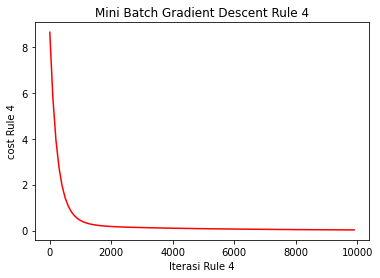

In [ ]:
plt.xlabel("Iterasi Rule 4")
plt.ylabel("cost Rule 4")
plt.title("Mini Batch Gradient Descent Rule 4")
plt.plot(mb_iterasi_rule4_list,mb_cost_rule4_list, color='red', label='Eror')
plt.show()

In [ ]:
mb_cost_rule4

0.026472592041104543

In [ ]:
mb_b0_rule4

-0.28684925234420544

In [ ]:
mb_bpoly_rule4 #hasil untuk x1 dan x2

array([0.18895624, 0.06927046, 0.20278788])

In [ ]:
data_rule_4

Age  Trestbps  Chol  Target
2     41       130   204       1
15    50       120   219       1
21    44       130   233       1
32    44       130   219       1
34    51       125   213       1
48    53       128   216       1
49    53       138   234       1
55    52       134   201       1
56    48       122   222       1
63    41       135   203       1
67    45       130   234       1
68    44       120   220       1
74    43       122   213       1
78    52       128   205       1
92    52       138   223       1
107   45       138   236       1
115   37       120   215       1
116   41       130   214       1
142   42       120   209       1
148   44       120   226       1
154   39       138   220       1

In [ ]:
X4=np.array(data_rule_4.iloc[::,:-1])
X4

array([[ 41, 130, 204],
       [ 50, 120, 219],
       [ 44, 130, 233],
       [ 44, 130, 219],
       [ 51, 125, 213],
       [ 53, 128, 216],
       [ 53, 138, 234],
       [ 52, 134, 201],
       [ 48, 122, 222],
       [ 41, 135, 203],
       [ 45, 130, 234],
       [ 44, 120, 220],
       [ 43, 122, 213],
       [ 52, 128, 205],
       [ 52, 138, 223],
       [ 45, 138, 236],
       [ 37, 120, 215],
       [ 41, 130, 214],
       [ 42, 120, 209],
       [ 44, 120, 226],
       [ 39, 138, 220]])

In [ ]:
Y4=np.array(data_rule_4.iloc[:,3])
Y4

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree diganti menjadi 4
X4_poly = poly_reg.fit_transform(X4)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X4_poly, Y4) 
# Proses Training Model
poly_reg.fit(X4, Y4) 

# Memprediksi hasil dengan regresi polynomial
y4_pred=lin_reg_2.predict(poly_reg.fit_transform(X4))
y4_pred

data_rule_4['pred'] = y4_pred
data_rule_4

Age  Trestbps  Chol  Target  pred
2     41       130   204       1   1.0
15    50       120   219       1   1.0
21    44       130   233       1   1.0
32    44       130   219       1   1.0
34    51       125   213       1   1.0
48    53       128   216       1   1.0
49    53       138   234       1   1.0
55    52       134   201       1   1.0
56    48       122   222       1   1.0
63    41       135   203       1   1.0
67    45       130   234       1   1.0
68    44       120   220       1   1.0
74    43       122   213       1   1.0
78    52       128   205       1   1.0
92    52       138   223       1   1.0
107   45       138   236       1   1.0
115   37       120   215       1   1.0
116   41       130   214       1   1.0
142   42       120   209       1   1.0
148   44       120   226       1   1.0
154   39       138   220       1   1.0

##Rule 5

In [ ]:
rule_5 = df_fuzz[df_fuzz['Rule']==" Jika X1 Tua dan X2 Hipertensi Jika X3 Tinggi maka Y Nonkardiovaktular"]
index=rule_5.index
data_rule_5=df_fuzz.iloc[index,:4]
data_rule_5

Age  Trestbps  Chol  Target
6     56       140   294       1
14    58       150   283       1
19    69       140   239       1
23    61       150   243       1
25    71       160   302       1
28    65       140   417       1
38    65       155   269       1
39    65       160   360       1
96    62       140   394       1
101   59       178   270       1
110   64       180   325       1
112   64       140   313       1
127   67       152   277       1
145   70       156   245       1
147   60       150   240       1
153   66       146   278       1

In [ ]:
data_rule_5.to_csv('hasilrule5.csv') 

###Mini Batch Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df_rule5=pd.read_csv('hasilrule5.csv',sep=',')
df_rule5

Unnamed: 0  Age  Trestbps  Chol  Target
0            6   56       140   294       1
1           14   58       150   283       1
2           19   69       140   239       1
3           23   61       150   243       1
4           25   71       160   302       1
5           28   65       140   417       1
6           38   65       155   269       1
7           39   65       160   360       1
8           96   62       140   394       1
9          101   59       178   270       1
10         110   64       180   325       1
11         112   64       140   313       1
12         127   67       152   277       1
13         145   70       156   245       1
14         147   60       150   240       1
15         153   66       146   278       1

In [ ]:
df_rule5=df_rule5.drop(columns=['Unnamed: 0'])
df_rule5

Age  Trestbps  Chol  Target
0    56       140   294       1
1    58       150   283       1
2    69       140   239       1
3    61       150   243       1
4    71       160   302       1
5    65       140   417       1
6    65       155   269       1
7    65       160   360       1
8    62       140   394       1
9    59       178   270       1
10   64       180   325       1
11   64       140   313       1
12   67       152   277       1
13   70       156   245       1
14   60       150   240       1
15   66       146   278       1

In [ ]:
from sklearn import preprocessing
sx5 = preprocessing.MinMaxScaler()
sy5 = preprocessing.MinMaxScaler()

scaled_X5 = sx5.fit_transform(data_rule_5.drop('Target',axis='columns'))
scaled_y5 = sy5.fit_transform(data_rule_5['Target'].values.reshape(rule_5.shape[0],1))

scaled_X5

array([[0.        , 0.        , 0.30898876],
       [0.13333333, 0.25      , 0.24719101],
       [0.86666667, 0.        , 0.        ],
       [0.33333333, 0.25      , 0.02247191],
       [1.        , 0.5       , 0.35393258],
       [0.6       , 0.        , 1.        ],
       [0.6       , 0.375     , 0.16853933],
       [0.6       , 0.5       , 0.67977528],
       [0.4       , 0.        , 0.87078652],
       [0.2       , 0.95      , 0.1741573 ],
       [0.53333333, 1.        , 0.48314607],
       [0.53333333, 0.        , 0.41573034],
       [0.73333333, 0.3       , 0.21348315],
       [0.93333333, 0.4       , 0.03370787],
       [0.26666667, 0.25      , 0.00561798],
       [0.66666667, 0.15      , 0.21910112]])

In [ ]:
scaled_y5_reshape=scaled_y5.reshape(scaled_y5.shape[0],)
scaled_y5_reshape

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
def mini_batch_gradient_descent_rule5(X5, y5, iterasi, batch_size = 3, learning_rate = 0.0001):

    jumlah_variabel_rule5 = X5.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule5 = np.ones(shape=(jumlah_variabel_rule5))       # b1, b2, ... b(jumlah variabel)
    b0_rule5 = 0                                         # b0 atau bias
    n = X5.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule5_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule5_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule5_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule5 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X5_smntr = X5[random_indices]
        y5_smntr = y5[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule5 = X5_smntr[j:j+batch_size]
            yj_rule5 = y5_smntr[j:j+batch_size]
            
            y5_pred = np.dot(bpoly_rule5, Xj_rule5.T) + b0_rule5          # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule5_grad = -(2/len(Xj_rule5))*(Xj_rule5.T.dot(yj_rule5-y5_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule5_grad = -(2/len(Xj_rule5))*np.sum(yj_rule5-y5_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule5 = bpoly_rule5 - learning_rate * bpoly_rule5_grad        # Memperbaharui bpoly setiap iterasi
            b0_rule5 = b0_rule5 - learning_rate * b0_rule5_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule5 in range(jumlah_variabel_rule5):
                bp_rule5=bpoly_rule5[jv_rule5]
                bp.append(bp_rule5)
            b_rule5=[b0_rule5]+bp
        
            cost_rule5 = np.mean(np.square(yj_rule5-y5_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule5_list.append(cost_rule5)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule5_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule5_list.append(b_rule5)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule5, b0_rule5, cost_rule5, b_rule5_list, cost_rule5_list, iterasi_rule5_list  # Output

In [ ]:
import time
mulai_rule5 = time.time()
mb_bpoly_rule5, mb_b0_rule5, mb_cost_rule5, mb_b_rule5_list, mb_cost_rule5_list, mb_iterasi_rule5_list=mini_batch_gradient_descent_rule5 (scaled_X5, 
                                                                                                                                        scaled_y5_reshape,
                                                                                                                                        iterasi=1000, 
                                                                                                                                        batch_size = 3, 
                                                                                                                                        learning_rate = 0.0001)
selesai_rule5 = time.time()
waktu_komputasi_rule5 = (selesai_rule5 - mulai_rule5)
print("Waktu Komputasi Rule 5: ",waktu_komputasi_rule5)

Waktu Komputasi Rule 5:  0.4354701042175293


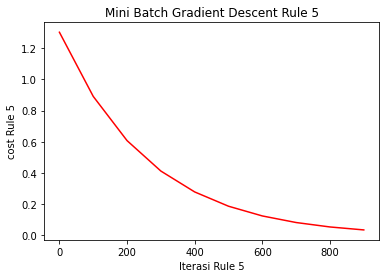

In [ ]:
plt.xlabel("Iterasi Rule 5")
plt.ylabel("cost Rule 5")
plt.title("Mini Batch Gradient Descent Rule 5")
plt.plot(mb_iterasi_rule5_list,mb_cost_rule5_list, color='red', label='Eror')
plt.show()

In [ ]:
mb_cost_rule5

0.020381748936030647

In [ ]:
mb_b0_rule5

-0.6204770294536625

In [ ]:
mb_bpoly_rule5 #hasil untuk x1 dan x2

array([0.6063902 , 0.73069834, 0.74375543])

In [ ]:
data_rule_5

Age  Trestbps  Chol  Target
6     56       140   294       1
14    58       150   283       1
19    69       140   239       1
23    61       150   243       1
25    71       160   302       1
28    65       140   417       1
38    65       155   269       1
39    65       160   360       1
96    62       140   394       1
101   59       178   270       1
110   64       180   325       1
112   64       140   313       1
127   67       152   277       1
145   70       156   245       1
147   60       150   240       1
153   66       146   278       1

In [ ]:
X5=np.array(data_rule_5.iloc[::,:-1])
X5

array([[ 56, 140, 294],
       [ 58, 150, 283],
       [ 69, 140, 239],
       [ 61, 150, 243],
       [ 71, 160, 302],
       [ 65, 140, 417],
       [ 65, 155, 269],
       [ 65, 160, 360],
       [ 62, 140, 394],
       [ 59, 178, 270],
       [ 64, 180, 325],
       [ 64, 140, 313],
       [ 67, 152, 277],
       [ 70, 156, 245],
       [ 60, 150, 240],
       [ 66, 146, 278]])

In [ ]:
Y5=np.array(data_rule_5.iloc[:,3])
Y5

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree diganti menjadi 4
X5_poly = poly_reg.fit_transform(X5)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X5_poly, Y5) 
# Proses Training Model
poly_reg.fit(X5, Y5) 

# Memprediksi hasil dengan regresi polynomial
y5_pred=lin_reg_2.predict(poly_reg.fit_transform(X5))
y5_pred

data_rule_5['pred'] = y5_pred
data_rule_5

Age  Trestbps  Chol  Target  pred
6     56       140   294       1   1.0
14    58       150   283       1   1.0
19    69       140   239       1   1.0
23    61       150   243       1   1.0
25    71       160   302       1   1.0
28    65       140   417       1   1.0
38    65       155   269       1   1.0
39    65       160   360       1   1.0
96    62       140   394       1   1.0
101   59       178   270       1   1.0
110   64       180   325       1   1.0
112   64       140   313       1   1.0
127   67       152   277       1   1.0
145   70       156   245       1   1.0
147   60       150   240       1   1.0
153   66       146   278       1   1.0

##Rule 6

In [ ]:
rule_6 = df_fuzz[df_fuzz['Rule']==" Jika X1 Tua dan X2 Prahipertensi Jika X3 Tinggi maka Y Nonkardiovaktular"]
index=rule_6.index
data_rule_6=df_fuzz.iloc[index,:4]
data_rule_6

Age  Trestbps  Chol  Target
4     57       120   354       1
16    58       120   340       1
51    66       120   302       1
54    63       135   252       1
59    57       128   303       1
75    55       135   250       1
114   55       130   262       1
120   64       130   303       1
121   59       138   271       1
129   74       120   269       1
139   64       128   263       1
160   56       120   240       1
161   55       132   342       1

In [ ]:
data_rule_6.to_csv('hasilrule6.csv')

###Mini Batch Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df_rule6=pd.read_csv('hasilrule6.csv',sep=',')
df_rule6

Unnamed: 0  Age  Trestbps  Chol  Target
0            4   57       120   354       1
1           16   58       120   340       1
2           51   66       120   302       1
3           54   63       135   252       1
4           59   57       128   303       1
5           75   55       135   250       1
6          114   55       130   262       1
7          120   64       130   303       1
8          121   59       138   271       1
9          129   74       120   269       1
10         139   64       128   263       1
11         160   56       120   240       1
12         161   55       132   342       1

In [ ]:
df_rule6=df_rule6.drop(columns=['Unnamed: 0'])
df_rule6

Age  Trestbps  Chol  Target
0    57       120   354       1
1    58       120   340       1
2    66       120   302       1
3    63       135   252       1
4    57       128   303       1
5    55       135   250       1
6    55       130   262       1
7    64       130   303       1
8    59       138   271       1
9    74       120   269       1
10   64       128   263       1
11   56       120   240       1
12   55       132   342       1

In [ ]:
from sklearn import preprocessing
sx6 = preprocessing.MinMaxScaler()
sy6 = preprocessing.MinMaxScaler()

scaled_X6 = sx6.fit_transform(data_rule_6.drop('Target',axis='columns'))
scaled_y6 = sy6.fit_transform(data_rule_6['Target'].values.reshape(rule_6.shape[0],1))

scaled_X6

array([[0.10526316, 0.        , 1.        ],
       [0.15789474, 0.        , 0.87719298],
       [0.57894737, 0.        , 0.54385965],
       [0.42105263, 0.83333333, 0.10526316],
       [0.10526316, 0.44444444, 0.55263158],
       [0.        , 0.83333333, 0.0877193 ],
       [0.        , 0.55555556, 0.19298246],
       [0.47368421, 0.55555556, 0.55263158],
       [0.21052632, 1.        , 0.27192982],
       [1.        , 0.        , 0.25438596],
       [0.47368421, 0.44444444, 0.20175439],
       [0.05263158, 0.        , 0.        ],
       [0.        , 0.66666667, 0.89473684]])

In [ ]:
scaled_y6_reshape=scaled_y6.reshape(scaled_y6.shape[0],)
scaled_y6_reshape

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
def mini_batch_gradient_descent_rule6(X6, y6, iterasi, batch_size = 3, learning_rate = 0.0001):

    jumlah_variabel_rule6 = X6.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule6 = np.ones(shape=(jumlah_variabel_rule6))       # b1, b2, ... b(jumlah variabel)
    b0_rule6 = 0                                         # b0 atau bias
    n = X6.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule6_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule6_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule6_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule6 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X6_smntr = X6[random_indices]
        y6_smntr = y6[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule6 = X6_smntr[j:j+batch_size]
            yj_rule6 = y6_smntr[j:j+batch_size]
            
            y6_pred = np.dot(bpoly_rule6, Xj_rule6.T) + b0_rule6          # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule6_grad = -(2/len(Xj_rule6))*(Xj_rule6.T.dot(yj_rule6-y6_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule6_grad = -(2/len(Xj_rule6))*np.sum(yj_rule6-y6_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule6 = bpoly_rule6 - learning_rate * bpoly_rule6_grad        # Memperbaharui bpoly(bobot) setiap iterasi 
            b0_rule6 = b0_rule6 - learning_rate * b0_rule6_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule6 in range(jumlah_variabel_rule6):
                bp_rule6=bpoly_rule6[jv_rule6]
                bp.append(bp_rule6)
            b_rule6=[b0_rule6]+bp
        
            cost_rule6 = np.mean(np.square(yj_rule6-y6_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule6_list.append(cost_rule6)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule6_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule6_list.append(b_rule6)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule6, b0_rule6, cost_rule6, b_rule6_list, cost_rule6_list, iterasi_rule6_list  # Output

In [ ]:
import time
mulai_rule6 = time.time()
mb_bpoly_rule6, mb_b0_rule6, mb_cost_rule6, mb_b_rule6_list, mb_cost_rule6_list, mb_iterasi_rule6_list=mini_batch_gradient_descent_rule6 (scaled_X6, 
                                                                                                                                        scaled_y6_reshape,
                                                                                                                                        iterasi=10000, 
                                                                                                                                        batch_size = 3, 
                                                                                                                                        learning_rate = 0.0001)
selesai_rule6 = time.time()
waktu_komputasi_rule6 = (selesai_rule6 - mulai_rule6)
print("Waktu Komputasi Rule 6: ",waktu_komputasi_rule6)

Waktu Komputasi Rule 6:  4.098072052001953


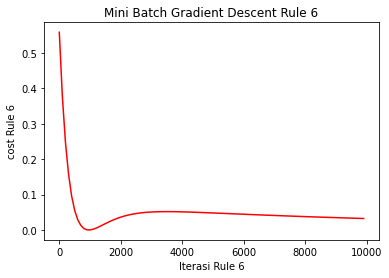

In [ ]:
plt.xlabel("Iterasi Rule 6")
plt.ylabel("cost Rule 6")
plt.title("Mini Batch Gradient Descent Rule 6")
plt.plot(mb_iterasi_rule6_list,mb_cost_rule6_list, color='red', label='Eror')
plt.show()

In [ ]:
mb_cost_rule6

0.032207969348332685

In [ ]:
mb_b0_rule6

-0.5502515713284392

In [ ]:
mb_bpoly_rule6 #hasil untuk x1 dan x2

array([0.54115567, 0.50384695, 0.47112633])

In [ ]:
data_rule_6

Age  Trestbps  Chol  Target
4     57       120   354       1
16    58       120   340       1
51    66       120   302       1
54    63       135   252       1
59    57       128   303       1
75    55       135   250       1
114   55       130   262       1
120   64       130   303       1
121   59       138   271       1
129   74       120   269       1
139   64       128   263       1
160   56       120   240       1
161   55       132   342       1

In [ ]:
X6=np.array(data_rule_6.iloc[::,:-1])
X6

array([[ 57, 120, 354],
       [ 58, 120, 340],
       [ 66, 120, 302],
       [ 63, 135, 252],
       [ 57, 128, 303],
       [ 55, 135, 250],
       [ 55, 130, 262],
       [ 64, 130, 303],
       [ 59, 138, 271],
       [ 74, 120, 269],
       [ 64, 128, 263],
       [ 56, 120, 240],
       [ 55, 132, 342]])

In [ ]:
Y6=np.array(data_rule_6.iloc[:,3])
Y6

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree(derajat) diganti menjadi 4
X6_poly = poly_reg.fit_transform(X6)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X6_poly, Y6) 
# Proses Training Model
poly_reg.fit(X6, Y6) 

# Memprediksi hasil dengan regresi polynomial
y6_pred=lin_reg_2.predict(poly_reg.fit_transform(X6))
y6_pred

data_rule_6['pred'] = y6_pred
data_rule_6

Age  Trestbps  Chol  Target  pred
4     57       120   354       1   1.0
16    58       120   340       1   1.0
51    66       120   302       1   1.0
54    63       135   252       1   1.0
59    57       128   303       1   1.0
75    55       135   250       1   1.0
114   55       130   262       1   1.0
120   64       130   303       1   1.0
121   59       138   271       1   1.0
129   74       120   269       1   1.0
139   64       128   263       1   1.0
160   56       120   240       1   1.0
161   55       132   342       1   1.0

##Rule 7

In [ ]:
rule_7 = df_fuzz[df_fuzz['Rule']==" Jika X1 Parabaya dan X2 Prahipertensi Jika X3 Tinggi maka Y Kardiovaktular"]
index=rule_7.index
data_rule_7=df_fuzz.iloc[index,:4]
data_rule_7

Age  Trestbps  Chol  Target
187   54       124   266       0
190   51       130   305       0
205   52       128   255       0
215   43       132   341       0
219   48       130   256       0
239   35       126   282       0
245   48       124   274       0
251   43       132   247       0
262   53       123   282       0
268   54       122   286       0
270   46       120   249       0
280   42       136   315       0

In [ ]:
data_rule_7.to_csv('hasilrule7.csv') 

###Mini Batch Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df_rule7=pd.read_csv('hasilrule7.csv',sep=',')
df_rule7

Unnamed: 0  Age  Trestbps  Chol  Target
0          187   54       124   266       0
1          190   51       130   305       0
2          205   52       128   255       0
3          215   43       132   341       0
4          219   48       130   256       0
5          239   35       126   282       0
6          245   48       124   274       0
7          251   43       132   247       0
8          262   53       123   282       0
9          268   54       122   286       0
10         270   46       120   249       0
11         280   42       136   315       0

In [ ]:
df_rule7=df_rule7.drop(columns=['Unnamed: 0'])
df_rule7

Age  Trestbps  Chol  Target
0    54       124   266       0
1    51       130   305       0
2    52       128   255       0
3    43       132   341       0
4    48       130   256       0
5    35       126   282       0
6    48       124   274       0
7    43       132   247       0
8    53       123   282       0
9    54       122   286       0
10   46       120   249       0
11   42       136   315       0

In [ ]:
from sklearn import preprocessing
sx7 = preprocessing.MinMaxScaler()
sy7 = preprocessing.MinMaxScaler()

scaled_X7 = sx7.fit_transform(data_rule_7.drop('Target',axis='columns'))
scaled_y7 = sy7.fit_transform(data_rule_7['Target'].values.reshape(rule_7.shape[0],1))

scaled_X7

array([[1.        , 0.25      , 0.20212766],
       [0.84210526, 0.625     , 0.61702128],
       [0.89473684, 0.5       , 0.08510638],
       [0.42105263, 0.75      , 1.        ],
       [0.68421053, 0.625     , 0.09574468],
       [0.        , 0.375     , 0.37234043],
       [0.68421053, 0.25      , 0.28723404],
       [0.42105263, 0.75      , 0.        ],
       [0.94736842, 0.1875    , 0.37234043],
       [1.        , 0.125     , 0.41489362],
       [0.57894737, 0.        , 0.0212766 ],
       [0.36842105, 1.        , 0.72340426]])

In [ ]:
scaled_y7_reshape=scaled_y7.reshape(scaled_y7.shape[0],)
scaled_y7_reshape

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
def mini_batch_gradient_descent_rule7(X7, y7, iterasi, batch_size = 3, learning_rate = 0.0001):

    jumlah_variabel_rule7 = X7.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule7 = np.ones(shape=(jumlah_variabel_rule7))       # b1, b2, ... b(jumlah variabel)
    b0_rule7 = 0                                         # b0 atau bias
    n = X7.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule7_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule7_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule7_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule7 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X7_smntr = X7[random_indices]
        y7_smntr = y7[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule7 = X7_smntr[j:j+batch_size]
            yj_rule7 = y7_smntr[j:j+batch_size]
            
            y7_pred = np.dot(bpoly_rule7, Xj_rule7.T) + b0_rule7          # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule7_grad = -(2/len(Xj_rule7))*(Xj_rule7.T.dot(yj_rule7-y7_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule7_grad = -(2/len(Xj_rule7))*np.sum(yj_rule7-y7_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule7 = bpoly_rule7 - learning_rate * bpoly_rule7_grad        # Memperbaharui bpoly setiap iterasi
            b0_rule7 = b0_rule7 - learning_rate * b0_rule7_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule7 in range(jumlah_variabel_rule7):
                bp_rule7=bpoly_rule7[jv_rule7]
                bp.append(bp_rule7)
            b_rule7=[b0_rule7]+bp
        
            cost_rule7 = np.mean(np.square(yj_rule7-y7_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule7_list.append(cost_rule7)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule7_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule7_list.append(b_rule7)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule7, b0_rule7, cost_rule7, b_rule7_list, cost_rule7_list, iterasi_rule7_list  # Output

In [ ]:
import time
mulai_rule7 = time.time()
mb_bpoly_rule7, mb_b0_rule7, mb_cost_rule7, mb_b_rule7_list, mb_cost_rule7_list, mb_iterasi_rule7_list=mini_batch_gradient_descent_rule7 (scaled_X7, 
                                                                                                                                        scaled_y7_reshape,
                                                                                                                                        iterasi=10000, 
                                                                                                                                        batch_size = 3, 
                                                                                                                                        learning_rate = 0.0001)
selesai_rule7 = time.time()
waktu_komputasi_rule7 = (selesai_rule7 - mulai_rule7)
print("Waktu Komputasi Rule 7: ",waktu_komputasi_rule7)

Waktu Komputasi Rule 7:  3.7550721168518066


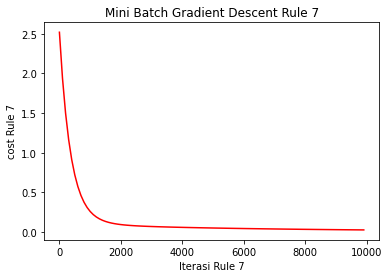

In [ ]:
plt.xlabel("Iterasi Rule 7")
plt.ylabel("cost Rule 7")
plt.title("Mini Batch Gradient Descent Rule 7")
plt.plot(mb_iterasi_rule7_list,mb_cost_rule7_list, color='red', label='Eror')
plt.show()

In [ ]:
mb_cost_rule7

0.025007961765296894

In [ ]:
mb_b0_rule7

-0.6165855808891074

In [ ]:
mb_bpoly_rule7

array([0.46211741, 0.37404696, 0.35058757])

In [ ]:
data_rule_7

Age  Trestbps  Chol  Target
187   54       124   266       0
190   51       130   305       0
205   52       128   255       0
215   43       132   341       0
219   48       130   256       0
239   35       126   282       0
245   48       124   274       0
251   43       132   247       0
262   53       123   282       0
268   54       122   286       0
270   46       120   249       0
280   42       136   315       0

In [ ]:
X7=np.array(data_rule_7.iloc[::,:-1])
X7

array([[ 54, 124, 266],
       [ 51, 130, 305],
       [ 52, 128, 255],
       [ 43, 132, 341],
       [ 48, 130, 256],
       [ 35, 126, 282],
       [ 48, 124, 274],
       [ 43, 132, 247],
       [ 53, 123, 282],
       [ 54, 122, 286],
       [ 46, 120, 249],
       [ 42, 136, 315]])

In [ ]:
Y7=np.array(data_rule_7.iloc[:,3])
Y7

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree(derajat) diganti menjadi 4
X7_poly = poly_reg.fit_transform(X7)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X7_poly, Y7) 
# Proses Training Model
poly_reg.fit(X7, Y7) 

# Memprediksi hasil dengan regresi polynomial
y7_pred=lin_reg_2.predict(poly_reg.fit_transform(X7))
y7_pred

data_rule_7['pred'] = y7_pred
data_rule_7

Age  Trestbps  Chol  Target  pred
187   54       124   266       0   0.0
190   51       130   305       0   0.0
205   52       128   255       0   0.0
215   43       132   341       0   0.0
219   48       130   256       0   0.0
239   35       126   282       0   0.0
245   48       124   274       0   0.0
251   43       132   247       0   0.0
262   53       123   282       0   0.0
268   54       122   286       0   0.0
270   46       120   249       0   0.0
280   42       136   315       0   0.0

##Rule 8

In [ ]:
rule_8 = df_fuzz[df_fuzz['Rule']==" Jika X1 Tua dan X2 Prahipertensi Jika X3 Ambang batas maka Y Kardiovaktular"]
index=rule_8.index
data_rule_8=df_fuzz.iloc[index,:4]
data_rule_8

Age  Trestbps  Chol  Target
166   67       120   229       0
173   58       132   224       0
174   60       130   206       0
191   58       128   216       0
210   57       128   229       0
271   61       134   234       0
272   67       120   237       0
282   59       126   218       0
286   59       134   204       0
289   55       128   205       0
302   57       130   236       0

In [ ]:
data_rule_8.to_csv('hasilrule8.csv') 

###Mini Batch Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df_rule8=pd.read_csv('hasilrule8.csv',sep=',')
df_rule8

Unnamed: 0  Age  Trestbps  Chol  Target
0          166   67       120   229       0
1          173   58       132   224       0
2          174   60       130   206       0
3          191   58       128   216       0
4          210   57       128   229       0
5          271   61       134   234       0
6          272   67       120   237       0
7          282   59       126   218       0
8          286   59       134   204       0
9          289   55       128   205       0
10         302   57       130   236       0

In [ ]:
df_rule8=df_rule8.drop(columns=['Unnamed: 0'])
df_rule8

Age  Trestbps  Chol  Target
0    67       120   229       0
1    58       132   224       0
2    60       130   206       0
3    58       128   216       0
4    57       128   229       0
5    61       134   234       0
6    67       120   237       0
7    59       126   218       0
8    59       134   204       0
9    55       128   205       0
10   57       130   236       0

In [ ]:
from sklearn import preprocessing
sx8 = preprocessing.MinMaxScaler()
sy8 = preprocessing.MinMaxScaler()

scaled_X8 = sx8.fit_transform(data_rule_8.drop('Target',axis='columns'))
scaled_y8 = sy8.fit_transform(data_rule_8['Target'].values.reshape(rule_8.shape[0],1))

scaled_X8

array([[1.        , 0.        , 0.75757576],
       [0.25      , 0.85714286, 0.60606061],
       [0.41666667, 0.71428571, 0.06060606],
       [0.25      , 0.57142857, 0.36363636],
       [0.16666667, 0.57142857, 0.75757576],
       [0.5       , 1.        , 0.90909091],
       [1.        , 0.        , 1.        ],
       [0.33333333, 0.42857143, 0.42424242],
       [0.33333333, 1.        , 0.        ],
       [0.        , 0.57142857, 0.03030303],
       [0.16666667, 0.71428571, 0.96969697]])

In [ ]:
scaled_y8_reshape=scaled_y8.reshape(scaled_y8.shape[0],)
scaled_y8_reshape

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
def mini_batch_gradient_descent_rule8(X8, y8, iterasi, batch_size = 5, learning_rate = 0.0001):

    jumlah_variabel_rule8 = X8.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule8 = np.ones(shape=(jumlah_variabel_rule8))       # b1, b2, ... b(jumlah variabel)
    b0_rule8 = 0                                         # b0 atau bias
    n = X8.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule8_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule8_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule8_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule8 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X8_smntr = X8[random_indices]
        y8_smntr = y8[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule8 = X8_smntr[j:j+batch_size]
            yj_rule8 = y8_smntr[j:j+batch_size]
            
            y8_pred = np.dot(bpoly_rule8, Xj_rule8.T) + b0_rule8          # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule8_grad = -(2/len(Xj_rule8))*(Xj_rule8.T.dot(yj_rule8-y8_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule8_grad = -(2/len(Xj_rule8))*np.sum(yj_rule8-y8_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule8 = bpoly_rule8 - learning_rate * bpoly_rule8_grad        # Memperbaharui bpoly setiap iterasi
            b0_rule8 = b0_rule8 - learning_rate * b0_rule8_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule8 in range(jumlah_variabel_rule8):
                bp_rule8=bpoly_rule8[jv_rule8]
                bp.append(bp_rule8)
            b_rule8=[b0_rule8]+bp
        
            cost_rule8 = np.mean(np.square(yj_rule8-y8_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule8_list.append(cost_rule8)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule8_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule8_list.append(b_rule8)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule8, b0_rule8, cost_rule8, b_rule8_list, cost_rule8_list, iterasi_rule8_list  # Output

In [ ]:
import time
mulai_rule8 = time.time()
mb_bpoly_rule8, mb_b0_rule8, mb_cost_rule8, mb_b_rule8_list, mb_cost_rule8_list, mb_iterasi_rule8_list=mini_batch_gradient_descent_rule8 (scaled_X8, 
                                                                                                                                        scaled_y8_reshape,
                                                                                                                                        iterasi=1000, 
                                                                                                                                        batch_size = 5, 
                                                                                                                                        learning_rate = 0.0001)
selesai_rule8 = time.time()
waktu_komputasi_rule8 = (selesai_rule8 - mulai_rule8)
print("Waktu Komputasi Rule 8: ",waktu_komputasi_rule8)

Waktu Komputasi Rule 8:  0.32392430305480957


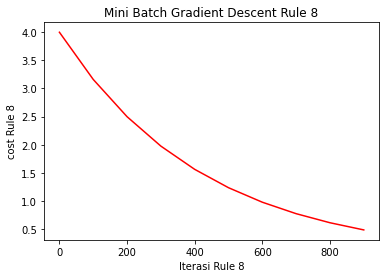

In [ ]:
plt.xlabel("Iterasi Rule 8")
plt.ylabel("cost Rule 8")
plt.title("Mini Batch Gradient Descent Rule 8")
plt.plot(mb_iterasi_rule8_list,mb_cost_rule8_list, color='red', label='Eror')
plt.show()

In [ ]:
mb_cost_rule8

0.3886880839540662

In [ ]:
mb_b0_rule8

-0.5719197699330698

In [ ]:
mb_bpoly_rule8

array([0.63378548, 0.77159541, 0.56120876])

In [ ]:
data_rule_8

Age  Trestbps  Chol  Target
166   67       120   229       0
173   58       132   224       0
174   60       130   206       0
191   58       128   216       0
210   57       128   229       0
271   61       134   234       0
272   67       120   237       0
282   59       126   218       0
286   59       134   204       0
289   55       128   205       0
302   57       130   236       0

In [ ]:
X8=np.array(data_rule_8.iloc[::,:-1])
X8

array([[ 67, 120, 229],
       [ 58, 132, 224],
       [ 60, 130, 206],
       [ 58, 128, 216],
       [ 57, 128, 229],
       [ 61, 134, 234],
       [ 67, 120, 237],
       [ 59, 126, 218],
       [ 59, 134, 204],
       [ 55, 128, 205],
       [ 57, 130, 236]])

In [ ]:
Y8=np.array(data_rule_8.iloc[:,3])
Y8

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree(derajat) diganti menjadi 4
X8_poly = poly_reg.fit_transform(X8)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X8_poly, Y8) 
# Proses Training Model
poly_reg.fit(X8, Y8) 

# Memprediksi hasil dengan regresi polynomial
y8_pred=lin_reg_2.predict(poly_reg.fit_transform(X8))
y8_pred

data_rule_8['pred'] = y8_pred
data_rule_8

Age  Trestbps  Chol  Target  pred
166   67       120   229       0   0.0
173   58       132   224       0   0.0
174   60       130   206       0   0.0
191   58       128   216       0   0.0
210   57       128   229       0   0.0
271   61       134   234       0   0.0
272   67       120   237       0   0.0
282   59       126   218       0   0.0
286   59       134   204       0   0.0
289   55       128   205       0   0.0
302   57       130   236       0   0.0

##Rule 9

In [ ]:
rule_9 = df_fuzz[df_fuzz['Rule']==" Jika X1 Tua dan X2 Hipertensi Jika X3 Ambang batas maka Y Kardiovaktular"]
index=rule_9.index
data_rule_9=df_fuzz.iloc[index,:4]
data_rule_9

Age  Trestbps  Chol  Target
181   65       150   225       0
221   55       140   217       0
242   64       145   212       0
260   66       178   228       0
276   58       146   218       0
284   61       140   207       0
287   57       154   232       0
290   61       148   203       0
292   58       170   225       0
293   67       152   212       0

In [ ]:
data_rule_9.to_csv('hasilrule9.csv')

###Mini Batch Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df_rule9=pd.read_csv('hasilrule9.csv',sep=',')
df_rule9

Unnamed: 0  Age  Trestbps  Chol  Target
0         181   65       150   225       0
1         221   55       140   217       0
2         242   64       145   212       0
3         260   66       178   228       0
4         276   58       146   218       0
5         284   61       140   207       0
6         287   57       154   232       0
7         290   61       148   203       0
8         292   58       170   225       0
9         293   67       152   212       0

In [ ]:
df_rule9=df_rule9.drop(columns=['Unnamed: 0'])
df_rule9

Age  Trestbps  Chol  Target
0   65       150   225       0
1   55       140   217       0
2   64       145   212       0
3   66       178   228       0
4   58       146   218       0
5   61       140   207       0
6   57       154   232       0
7   61       148   203       0
8   58       170   225       0
9   67       152   212       0

In [ ]:
from sklearn import preprocessing
sx9 = preprocessing.MinMaxScaler()
sy9 = preprocessing.MinMaxScaler()

scaled_X9 = sx9.fit_transform(data_rule_9.drop('Target',axis='columns'))
scaled_y9 = sy9.fit_transform(data_rule_9['Target'].values.reshape(rule_9.shape[0],1))

scaled_X9

array([[0.83333333, 0.26315789, 0.75862069],
       [0.        , 0.        , 0.48275862],
       [0.75      , 0.13157895, 0.31034483],
       [0.91666667, 1.        , 0.86206897],
       [0.25      , 0.15789474, 0.51724138],
       [0.5       , 0.        , 0.13793103],
       [0.16666667, 0.36842105, 1.        ],
       [0.5       , 0.21052632, 0.        ],
       [0.25      , 0.78947368, 0.75862069],
       [1.        , 0.31578947, 0.31034483]])

In [ ]:
scaled_y9_reshape=scaled_y9.reshape(scaled_y9.shape[0],)
scaled_y9_reshape

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
def mini_batch_gradient_descent_rule9(X9, y9, iterasi, batch_size = 3, learning_rate = 0.0001):

    jumlah_variabel_rule9 = X9.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule9 = np.ones(shape=(jumlah_variabel_rule9))       # b1, b2, ... b(jumlah variabel)
    b0_rule9 = 0                                         # b0 atau bias
    n = X9.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule9_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule9_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule9_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule9 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X9_smntr = X9[random_indices]
        y9_smntr = y9[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule9 = X9_smntr[j:j+batch_size]
            yj_rule9 = y9_smntr[j:j+batch_size]
            
            y9_pred = np.dot(bpoly_rule9, Xj_rule9.T) + b0_rule9          # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule9_grad = -(2/len(Xj_rule9))*(Xj_rule9.T.dot(yj_rule9-y9_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule9_grad = -(2/len(Xj_rule9))*np.sum(yj_rule9-y9_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule9 = bpoly_rule9 - learning_rate * bpoly_rule9_grad        # Memperbaharui bpoly setiap iterasi
            b0_rule9 = b0_rule9 - learning_rate * b0_rule9_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule9 in range(jumlah_variabel_rule9):
                bp_rule9=bpoly_rule9[jv_rule9]
                bp.append(bp_rule9)
            b_rule9=[b0_rule9]+bp
        
            cost_rule9 = np.mean(np.square(yj_rule9-y9_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule9_list.append(cost_rule9)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule9_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule9_list.append(b_rule9)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule9, b0_rule9, cost_rule9, b_rule9_list, cost_rule9_list, iterasi_rule9_list  # Output

In [ ]:
import time
mulai_rule9 = time.time()
mb_bpoly_rule9, mb_b0_rule9, mb_cost_rule9, mb_b_rule9_list, mb_cost_rule9_list, mb_iterasi_rule9_list=mini_batch_gradient_descent_rule9 (scaled_X9, 
                                                                                                                                        scaled_y9_reshape,
                                                                                                                                        iterasi=1000, 
                                                                                                                                        batch_size = 3, 
                                                                                                                                        learning_rate = 0.0001)
selesai_rule9 = time.time()
waktu_komputasi_rule9 = (selesai_rule9 - mulai_rule9)
print("Waktu Komputasi Rule 9: ",waktu_komputasi_rule9)

Waktu Komputasi Rule 9:  0.3986494541168213


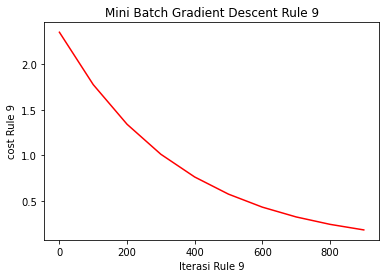

In [ ]:
plt.xlabel("Iterasi Rule 9")
plt.ylabel("cost Rule 9")
plt.title("Mini Batch Gradient Descent Rule 9")
plt.plot(mb_iterasi_rule9_list,mb_cost_rule9_list, color='red', label='Eror')
plt.show()

In [ ]:
mb_cost_rule9

0.1367021951200203

In [ ]:
mb_b0_rule9

-0.5797561761340614

In [ ]:
mb_bpoly_rule9

array([0.67213021, 0.70992156, 0.57575704])

In [ ]:
data_rule_9

Age  Trestbps  Chol  Target
181   65       150   225       0
221   55       140   217       0
242   64       145   212       0
260   66       178   228       0
276   58       146   218       0
284   61       140   207       0
287   57       154   232       0
290   61       148   203       0
292   58       170   225       0
293   67       152   212       0

In [ ]:
X9=np.array(data_rule_9.iloc[::,:-1])
X9

array([[ 65, 150, 225],
       [ 55, 140, 217],
       [ 64, 145, 212],
       [ 66, 178, 228],
       [ 58, 146, 218],
       [ 61, 140, 207],
       [ 57, 154, 232],
       [ 61, 148, 203],
       [ 58, 170, 225],
       [ 67, 152, 212]])

In [ ]:
Y9=np.array(data_rule_9.iloc[:,3])
Y9

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree(derajat) diganti menjadi 4
X9_poly = poly_reg.fit_transform(X9)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X9_poly, Y9) 
# Proses Training Model
poly_reg.fit(X9, Y9) 

# Memprediksi hasil dengan regresi polynomial
y9_pred=lin_reg_2.predict(poly_reg.fit_transform(X9))
y9_pred

data_rule_9['pred'] = y9_pred
data_rule_9

Age  Trestbps  Chol  Target  pred
181   65       150   225       0   0.0
221   55       140   217       0   0.0
242   64       145   212       0   0.0
260   66       178   228       0   0.0
276   58       146   218       0   0.0
284   61       140   207       0   0.0
287   57       154   232       0   0.0
290   61       148   203       0   0.0
292   58       170   225       0   0.0
293   67       152   212       0   0.0

##Rule 10

In [ ]:
rule_10 = df_fuzz[df_fuzz['Rule']==" Jika X1 Parabaya dan X2 Prahipertensi Jika X3 Baik maka Y Nonkardiovaktular"]
index=rule_10.index
data_rule_10=df_fuzz.iloc[index,:4]
data_rule_10

Age  Trestbps  Chol  Target
29    53       130   197       1
65    35       138   183       1
104   50       129   196       1
128   52       136   196       1
149   42       130   180       1
157   35       122   192       1
162   41       120   157       1
163   38       138   175       1
164   38       138   175       1

In [ ]:
data_rule_10.to_csv('hasilrule10.csv') 

###Mini Batch Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df_rule10=pd.read_csv('hasilrule10.csv',sep=',')
df_rule10

Unnamed: 0  Age  Trestbps  Chol  Target
0          29   53       130   197       1
1          65   35       138   183       1
2         104   50       129   196       1
3         128   52       136   196       1
4         149   42       130   180       1
5         157   35       122   192       1
6         162   41       120   157       1
7         163   38       138   175       1
8         164   38       138   175       1

In [ ]:
df_rule10=df_rule10.drop(columns=['Unnamed: 0'])
df_rule10

Age  Trestbps  Chol  Target
0   53       130   197       1
1   35       138   183       1
2   50       129   196       1
3   52       136   196       1
4   42       130   180       1
5   35       122   192       1
6   41       120   157       1
7   38       138   175       1
8   38       138   175       1

In [ ]:
from sklearn import preprocessing
sx10 = preprocessing.MinMaxScaler()
sy10 = preprocessing.MinMaxScaler()

scaled_X10 = sx10.fit_transform(data_rule_10.drop('Target',axis='columns'))
scaled_y10 = sy10.fit_transform(data_rule_10['Target'].values.reshape(rule_10.shape[0],1))

scaled_X10

array([[1.        , 0.55555556, 1.        ],
       [0.        , 1.        , 0.65      ],
       [0.83333333, 0.5       , 0.975     ],
       [0.94444444, 0.88888889, 0.975     ],
       [0.38888889, 0.55555556, 0.575     ],
       [0.        , 0.11111111, 0.875     ],
       [0.33333333, 0.        , 0.        ],
       [0.16666667, 1.        , 0.45      ],
       [0.16666667, 1.        , 0.45      ]])

In [ ]:
scaled_y10_reshape=scaled_y10.reshape(scaled_y10.shape[0],)
scaled_y10_reshape

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
def mini_batch_gradient_descent_rule10(X10, y10, iterasi, batch_size = 3, learning_rate = 0.0001):

    jumlah_variabel_rule10 = X10.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule10 = np.ones(shape=(jumlah_variabel_rule10))       # b1, b2, ... b(jumlah variabel)
    b0_rule10 = 0                                         # b0 atau bias
    n = X10.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule10_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule10_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule10_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule10 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X10_smntr = X10[random_indices]
        y10_smntr = y10[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule10 = X10_smntr[j:j+batch_size]
            yj_rule10 = y10_smntr[j:j+batch_size]
            
            y10_pred = np.dot(bpoly_rule10, Xj_rule10.T) + b0_rule10          # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule10_grad = -(2/len(Xj_rule10))*(Xj_rule10.T.dot(yj_rule10-y10_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule10_grad = -(2/len(Xj_rule10))*np.sum(yj_rule10-y10_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule10 = bpoly_rule10 - learning_rate * bpoly_rule10_grad        # Memperbaharui bpoly setiap iterasi
            b0_rule10 = b0_rule10 - learning_rate * b0_rule10_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule10 in range(jumlah_variabel_rule10):
                bp_rule10=bpoly_rule10[jv_rule10]
                bp.append(bp_rule10)
            b_rule10=[b0_rule10]+bp
        
            cost_rule10 = np.mean(np.square(yj_rule10-y10_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule10_list.append(cost_rule10)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule10_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule10_list.append(b_rule10)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule10, b0_rule10, cost_rule10, b_rule10_list, cost_rule10_list, iterasi_rule10_list  # Output

In [ ]:
import time
mulai_rule10 = time.time()
mb_bpoly_rule10, mb_b0_rule10, mb_cost_rule10, mb_b_rule10_list, mb_cost_rule10_list, mb_iterasi_rule10_list=mini_batch_gradient_descent_rule10 (scaled_X10, 
                                                                                                                                        scaled_y10_reshape,
                                                                                                                                        iterasi=10000, 
                                                                                                                                        batch_size = 3, 
                                                                                                                                        learning_rate = 0.0001)
selesai_rule10 = time.time()
waktu_komputasi_rule10 = (selesai_rule10 - mulai_rule10)
print("Waktu Komputasi Rule 10: ",waktu_komputasi_rule10)

Waktu Komputasi Rule 10:  3.4589028358459473


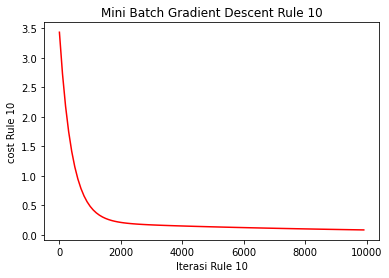

In [ ]:
plt.xlabel("Iterasi Rule 10")
plt.ylabel("cost Rule 10")
plt.title("Mini Batch Gradient Descent Rule 10")
plt.plot(mb_iterasi_rule10_list,mb_cost_rule10_list, color='red', label='Eror')
plt.show()

In [ ]:
mb_cost_rule10

0.08471095588855299

In [ ]:
mb_b0_rule10

-0.5140804239692027

In [ ]:
mb_bpoly_rule10

array([0.27633527, 0.31993063, 0.23362685])

In [ ]:
data_rule_10

Age  Trestbps  Chol  Target
29    53       130   197       1
65    35       138   183       1
104   50       129   196       1
128   52       136   196       1
149   42       130   180       1
157   35       122   192       1
162   41       120   157       1
163   38       138   175       1
164   38       138   175       1

In [ ]:
X10=np.array(data_rule_10.iloc[::,:-1])
X10

array([[ 53, 130, 197],
       [ 35, 138, 183],
       [ 50, 129, 196],
       [ 52, 136, 196],
       [ 42, 130, 180],
       [ 35, 122, 192],
       [ 41, 120, 157],
       [ 38, 138, 175],
       [ 38, 138, 175]])

In [ ]:
Y10=np.array(data_rule_10.iloc[:,3])
Y10

array([1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree(derajat) diganti menjadi 4
X10_poly = poly_reg.fit_transform(X10)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X10_poly, Y10) 
# Proses Training Model
poly_reg.fit(X10, Y10) 

# Memprediksi hasil dengan regresi polynomial
y10_pred=lin_reg_2.predict(poly_reg.fit_transform(X10))
y10_pred

data_rule_10['pred'] = y10_pred
data_rule_10

Age  Trestbps  Chol  Target  pred
29    53       130   197       1   1.0
65    35       138   183       1   1.0
104   50       129   196       1   1.0
128   52       136   196       1   1.0
149   42       130   180       1   1.0
157   35       122   192       1   1.0
162   41       120   157       1   1.0
163   38       138   175       1   1.0
164   38       138   175       1   1.0

##Rule 11

In [ ]:
#Rule 11
rule_11 = df_fuzz[df_fuzz['Rule']==" Jika X1 Tua dan X2 Prahipertensi Jika X3 Ambang batas maka Y Nonkardiovaktular"]
index=rule_11.index
data_rule_11=df_fuzz.iloc[index,:4]
data_rule_11

Age  Trestbps  Chol  Target
3     56       120   236       1
20    59       135   234       1
52    62       130   231       1
69    62       124   209       1
91    57       132   207       1
105   68       120   211       1
137   62       128   208       1
158   58       125   220       1
159   56       130   221       1

In [ ]:
data_rule_11.to_csv('hasilrule11.csv')

###Mini Batch Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df_rule11=pd.read_csv('hasilrule11.csv',sep=',')
df_rule11

Unnamed: 0  Age  Trestbps  Chol  Target
0           3   56       120   236       1
1          20   59       135   234       1
2          52   62       130   231       1
3          69   62       124   209       1
4          91   57       132   207       1
5         105   68       120   211       1
6         137   62       128   208       1
7         158   58       125   220       1
8         159   56       130   221       1

In [ ]:
df_rule11=df_rule11.drop(columns=['Unnamed: 0'])
df_rule11

Age  Trestbps  Chol  Target
0   56       120   236       1
1   59       135   234       1
2   62       130   231       1
3   62       124   209       1
4   57       132   207       1
5   68       120   211       1
6   62       128   208       1
7   58       125   220       1
8   56       130   221       1

In [ ]:
from sklearn import preprocessing
sx11 = preprocessing.MinMaxScaler()
sy11 = preprocessing.MinMaxScaler()

scaled_X11 = sx11.fit_transform(data_rule_11.drop('Target',axis='columns'))
scaled_y11 = sy11.fit_transform(data_rule_11['Target'].values.reshape(rule_11.shape[0],1))

scaled_X11

array([[0.        , 0.        , 1.        ],
       [0.25      , 1.        , 0.93103448],
       [0.5       , 0.66666667, 0.82758621],
       [0.5       , 0.26666667, 0.06896552],
       [0.08333333, 0.8       , 0.        ],
       [1.        , 0.        , 0.13793103],
       [0.5       , 0.53333333, 0.03448276],
       [0.16666667, 0.33333333, 0.44827586],
       [0.        , 0.66666667, 0.48275862]])

In [ ]:
scaled_y11_reshape=scaled_y11.reshape(scaled_y11.shape[0],)
scaled_y11_reshape

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
def mini_batch_gradient_descent_rule11(X11, y11, iterasi, batch_size = 3, learning_rate = 0.0001):

    jumlah_variabel_rule11 = X11.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule11 = np.ones(shape=(jumlah_variabel_rule11))       # b1, b2, ... b(jumlah variabel)
    b0_rule11 = 0                                         # b0 atau bias
    n = X11.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule11_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule11_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule11_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule11 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X11_smntr = X11[random_indices]
        y11_smntr = y11[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule11 = X11_smntr[j:j+batch_size]
            yj_rule11 = y11_smntr[j:j+batch_size]
            
            y11_pred = np.dot(bpoly_rule11, Xj_rule11.T) + b0_rule11          # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule11_grad = -(2/len(Xj_rule11))*(Xj_rule11.T.dot(yj_rule11-y11_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule11_grad = -(2/len(Xj_rule11))*np.sum(yj_rule11-y11_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule11 = bpoly_rule11 - learning_rate * bpoly_rule11_grad        # Memperbaharui bpoly setiap iterasi
            b0_rule11 = b0_rule11 - learning_rate * b0_rule11_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule11 in range(jumlah_variabel_rule11):
                bp_rule11=bpoly_rule11[jv_rule11]
                bp.append(bp_rule11)
            b_rule11=[b0_rule11]+bp
        
            cost_rule11 = np.mean(np.square(yj_rule11-y11_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule11_list.append(cost_rule11)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule11_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule11_list.append(b_rule11)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule11, b0_rule11, cost_rule11, b_rule11_list, cost_rule11_list, iterasi_rule11_list  # Output

In [ ]:
import time
mulai_rule11 = time.time()
mb_bpoly_rule11, mb_b0_rule11, mb_cost_rule11, mb_b_rule11_list, mb_cost_rule11_list, mb_iterasi_rule11_list=mini_batch_gradient_descent_rule11 (scaled_X11, 
                                                                                                                                        scaled_y11_reshape,
                                                                                                                                        iterasi=10000, 
                                                                                                                                        batch_size = 3, 
                                                                                                                                        learning_rate = 0.0001)
selesai_rule11 = time.time()
waktu_komputasi_rule11 = (selesai_rule11 - mulai_rule11)
print("Waktu Komputasi Rule 11: ",waktu_komputasi_rule11)

Waktu Komputasi Rule 11:  3.3776333332061768


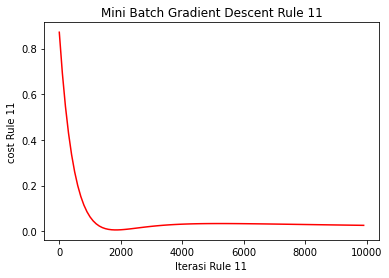

In [ ]:
plt.xlabel("Iterasi Rule 11")
plt.ylabel("cost Rule 11")
plt.title("Mini Batch Gradient Descent Rule 11")
plt.plot(mb_iterasi_rule11_list,mb_cost_rule11_list, color='red', label='Eror')
plt.show()

In [ ]:
mb_cost_rule11

0.025723600676057886

In [ ]:
mb_b0_rule11

-0.6304367305954166

In [ ]:
mb_bpoly_rule11

array([0.64352514, 0.4473476 , 0.40546218])

In [ ]:
data_rule_11

Age  Trestbps  Chol  Target
3     56       120   236       1
20    59       135   234       1
52    62       130   231       1
69    62       124   209       1
91    57       132   207       1
105   68       120   211       1
137   62       128   208       1
158   58       125   220       1
159   56       130   221       1

In [ ]:
X11=np.array(data_rule_11.iloc[::,:-1])
X11

array([[ 56, 120, 236],
       [ 59, 135, 234],
       [ 62, 130, 231],
       [ 62, 124, 209],
       [ 57, 132, 207],
       [ 68, 120, 211],
       [ 62, 128, 208],
       [ 58, 125, 220],
       [ 56, 130, 221]])

In [ ]:
Y11=np.array(data_rule_11.iloc[:,3])
Y11

array([1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree(derajat) diganti menjadi 4
X11_poly = poly_reg.fit_transform(X11)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X11_poly, Y11) 
# Proses Training Model
poly_reg.fit(X11, Y11) 

# Memprediksi hasil dengan regresi polynomial
y11_pred=lin_reg_2.predict(poly_reg.fit_transform(X11))
y11_pred

data_rule_11['pred'] = y11_pred
data_rule_11

Age  Trestbps  Chol  Target  pred
3     56       120   236       1   1.0
20    59       135   234       1   1.0
52    62       130   231       1   1.0
69    62       124   209       1   1.0
91    57       132   207       1   1.0
105   68       120   211       1   1.0
137   62       128   208       1   1.0
158   58       125   220       1   1.0
159   56       130   221       1   1.0

##Rule 12

In [ ]:
#Rule 12
rule_12 = df_fuzz[df_fuzz['Rule']==" Jika X1 Parabaya dan X2 Normal Jika X3 Ambang batas maka Y Nonkardiovaktular"]
index=rule_12.index
data_rule_12=df_fuzz.iloc[index,:4]
data_rule_12

Age  Trestbps  Chol  Target
42    45       104   208       1
66    51       100   222       1
71    51        94   227       1
88    54       110   214       1
97    52       108   233       1
113   43       110   211       1
118   46       105   204       1
126   47       112   204       1
133   41       110   235       1

In [ ]:
data_rule_12.to_csv('hasilrule12.csv') 

###Mini Batch Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df_rule12=pd.read_csv('hasilrule12.csv',sep=',')
df_rule12

Unnamed: 0  Age  Trestbps  Chol  Target
0          42   45       104   208       1
1          66   51       100   222       1
2          71   51        94   227       1
3          88   54       110   214       1
4          97   52       108   233       1
5         113   43       110   211       1
6         118   46       105   204       1
7         126   47       112   204       1
8         133   41       110   235       1

In [ ]:
df_rule12=df_rule12.drop(columns=['Unnamed: 0'])
df_rule12

Age  Trestbps  Chol  Target
0   45       104   208       1
1   51       100   222       1
2   51        94   227       1
3   54       110   214       1
4   52       108   233       1
5   43       110   211       1
6   46       105   204       1
7   47       112   204       1
8   41       110   235       1

In [ ]:
from sklearn import preprocessing
sx12 = preprocessing.MinMaxScaler()
sy12 = preprocessing.MinMaxScaler()

scaled_X12 = sx12.fit_transform(data_rule_12.drop('Target',axis='columns'))
scaled_y12 = sy12.fit_transform(data_rule_12['Target'].values.reshape(rule_12.shape[0],1))

scaled_X12

array([[0.30769231, 0.55555556, 0.12903226],
       [0.76923077, 0.33333333, 0.58064516],
       [0.76923077, 0.        , 0.74193548],
       [1.        , 0.88888889, 0.32258065],
       [0.84615385, 0.77777778, 0.93548387],
       [0.15384615, 0.88888889, 0.22580645],
       [0.38461538, 0.61111111, 0.        ],
       [0.46153846, 1.        , 0.        ],
       [0.        , 0.88888889, 1.        ]])

In [ ]:
scaled_y12_reshape=scaled_y12.reshape(scaled_y12.shape[0],)
scaled_y12_reshape

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
def mini_batch_gradient_descent_rule12(X12, y12, iterasi, batch_size = 3, learning_rate = 0.0001):

    jumlah_variabel_rule12 = X12.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule12 = np.ones(shape=(jumlah_variabel_rule12))       # b1, b2, ... b(jumlah variabel)
    b0_rule12 = 0                                         # b0 atau bias
    n = X12.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule12_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule12_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule12_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule12 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X12_smntr = X12[random_indices]
        y12_smntr = y12[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule12 = X12_smntr[j:j+batch_size]
            yj_rule12 = y12_smntr[j:j+batch_size]
            
            y12_pred = np.dot(bpoly_rule12, Xj_rule12.T) + b0_rule12          # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule12_grad = -(2/len(Xj_rule12))*(Xj_rule12.T.dot(yj_rule12-y12_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule12_grad = -(2/len(Xj_rule12))*np.sum(yj_rule12-y12_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule12 = bpoly_rule12 - learning_rate * bpoly_rule12_grad        # Memperbaharui bpoly setiap iterasi
            b0_rule12 = b0_rule12 - learning_rate * b0_rule12_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule12 in range(jumlah_variabel_rule12):
                bp_rule12=bpoly_rule12[jv_rule12]
                bp.append(bp_rule12)
            b_rule12=[b0_rule12]+bp
        
            cost_rule12 = np.mean(np.square(yj_rule12-y12_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule12_list.append(cost_rule12)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule12_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule12_list.append(b_rule12)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule12, b0_rule12, cost_rule12, b_rule12_list, cost_rule12_list, iterasi_rule12_list  # Output

In [ ]:
import time
mulai_rule12 = time.time()
mb_bpoly_rule12, mb_b0_rule12, mb_cost_rule12, mb_b_rule12_list, mb_cost_rule12_list, mb_iterasi_rule12_list=mini_batch_gradient_descent_rule12 (scaled_X12, 
                                                                                                                                        scaled_y12_reshape,
                                                                                                                                        iterasi=10000, 
                                                                                                                                        batch_size = 3, 
                                                                                                                                        learning_rate = 0.0001)
selesai_rule12 = time.time()
waktu_komputasi_rule12 = (selesai_rule12 - mulai_rule12)
print("Waktu Komputasi Rule 12: ",waktu_komputasi_rule12)

Waktu Komputasi Rule 12:  3.5934066772460938


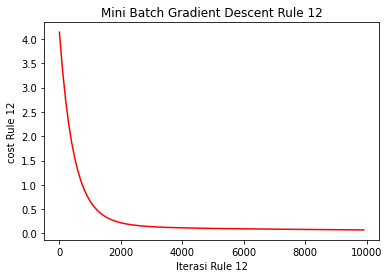

In [ ]:
plt.xlabel("Iterasi Rule 12")
plt.ylabel("cost Rule 12")
plt.title("Mini Batch Gradient Descent Rule 12")
plt.plot(mb_iterasi_rule12_list,mb_cost_rule12_list, color='red', label='Eror')
plt.show()

In [ ]:
mb_cost_rule12

0.07165670028061671

In [ ]:
mb_b0_rule12

-0.6723911481863812

In [ ]:
mb_bpoly_rule12

array([0.38836776, 0.44891289, 0.33727224])

In [ ]:
data_rule_12

Age  Trestbps  Chol  Target
42    45       104   208       1
66    51       100   222       1
71    51        94   227       1
88    54       110   214       1
97    52       108   233       1
113   43       110   211       1
118   46       105   204       1
126   47       112   204       1
133   41       110   235       1

In [ ]:
X12=np.array(data_rule_12.iloc[::,:-1])
X12

array([[ 45, 104, 208],
       [ 51, 100, 222],
       [ 51,  94, 227],
       [ 54, 110, 214],
       [ 52, 108, 233],
       [ 43, 110, 211],
       [ 46, 105, 204],
       [ 47, 112, 204],
       [ 41, 110, 235]])

In [ ]:
Y12=np.array(data_rule_12.iloc[:,3])
Y12

array([1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree(derajat) diganti menjadi 4
X12_poly = poly_reg.fit_transform(X12)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X12_poly, Y12) 
# Proses Training Model
poly_reg.fit(X12, Y12) 

# Memprediksi hasil dengan regresi polynomial
y12_pred=lin_reg_2.predict(poly_reg.fit_transform(X12))
y12_pred

data_rule_12['pred'] = y12_pred
data_rule_12

Age  Trestbps  Chol  Target  pred
42    45       104   208       1   1.0
66    51       100   222       1   1.0
71    51        94   227       1   1.0
88    54       110   214       1   1.0
97    52       108   233       1   1.0
113   43       110   211       1   1.0
118   46       105   204       1   1.0
126   47       112   204       1   1.0
133   41       110   235       1   1.0

##Rule 13

In [ ]:
#Rule 13
rule_13 = df_fuzz[df_fuzz['Rule']==" Jika X1 Parabaya dan X2 Normal Jika X3 Tinggi maka Y Nonkardiovaktular"]
index=rule_13.index
data_rule_13=df_fuzz.iloc[index,:4]
data_rule_13

Age  Trestbps  Chol  Target
57    45       115   260       1
61    54       108   309       1
80    41       112   250       1
84    42       102   265       1
109   50       110   254       1
122   41       112   268       1
123   54       108   267       1
141   43       115   303       1
146   44       118   242       1

In [ ]:
data_rule_13.to_csv('hasilrule13.csv') 

###Mini Batch Gradient Deacent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df_rule13=pd.read_csv('hasilrule13.csv',sep=',')
df_rule13

Unnamed: 0  Age  Trestbps  Chol  Target
0          57   45       115   260       1
1          61   54       108   309       1
2          80   41       112   250       1
3          84   42       102   265       1
4         109   50       110   254       1
5         122   41       112   268       1
6         123   54       108   267       1
7         141   43       115   303       1
8         146   44       118   242       1

In [ ]:
df_rule13=df_rule13.drop(columns=['Unnamed: 0'])
df_rule13

Age  Trestbps  Chol  Target
0   45       115   260       1
1   54       108   309       1
2   41       112   250       1
3   42       102   265       1
4   50       110   254       1
5   41       112   268       1
6   54       108   267       1
7   43       115   303       1
8   44       118   242       1

In [ ]:
from sklearn import preprocessing
sx13 = preprocessing.MinMaxScaler()
sy13 = preprocessing.MinMaxScaler()

scaled_X13 = sx13.fit_transform(data_rule_13.drop('Target',axis='columns'))
scaled_y13 = sy13.fit_transform(data_rule_13['Target'].values.reshape(rule_13.shape[0],1))

scaled_X13

array([[0.30769231, 0.8125    , 0.26865672],
       [1.        , 0.375     , 1.        ],
       [0.        , 0.625     , 0.11940299],
       [0.07692308, 0.        , 0.34328358],
       [0.69230769, 0.5       , 0.17910448],
       [0.        , 0.625     , 0.3880597 ],
       [1.        , 0.375     , 0.37313433],
       [0.15384615, 0.8125    , 0.91044776],
       [0.23076923, 1.        , 0.        ]])

In [ ]:
scaled_y13_reshape=scaled_y13.reshape(scaled_y13.shape[0],)
scaled_y13_reshape

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
def mini_batch_gradient_descent_rule13(X13, y13, iterasi, batch_size = 4, learning_rate = 0.0001):

    jumlah_variabel_rule13 = X13.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule13 = np.ones(shape=(jumlah_variabel_rule13))       # b1, b2, ... b(jumlah variabel)
    b0_rule13 = 0                                         # b0 atau bias
    n = X13.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule13_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule13_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule13_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule13 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X13_smntr = X13[random_indices]
        y13_smntr = y13[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule13 = X13_smntr[j:j+batch_size]
            yj_rule13 = y13_smntr[j:j+batch_size]
            
            y13_pred = np.dot(bpoly_rule13, Xj_rule13.T) + b0_rule13          # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule13_grad = -(2/len(Xj_rule13))*(Xj_rule13.T.dot(yj_rule13-y13_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule13_grad = -(2/len(Xj_rule13))*np.sum(yj_rule13-y13_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule13 = bpoly_rule13 - learning_rate * bpoly_rule13_grad        # Memperbaharui bpoly setiap iterasi
            b0_rule13 = b0_rule13 - learning_rate * b0_rule13_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule13 in range(jumlah_variabel_rule13):
                bp_rule13=bpoly_rule13[jv_rule13]
                bp.append(bp_rule13)
            b_rule13=[b0_rule13]+bp
        
            cost_rule13 = np.mean(np.square(yj_rule13-y13_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule13_list.append(cost_rule13)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule13_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule13_list.append(b_rule13)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule13, b0_rule13, cost_rule13, b_rule13_list, cost_rule13_list, iterasi_rule13_list  # Output

In [ ]:
import time
mulai_rule13 = time.time()
mb_bpoly_rule13, mb_b0_rule13, mb_cost_rule13, mb_b_rule13_list, mb_cost_rule13_list, mb_iterasi_rule13_list=mini_batch_gradient_descent_rule13 (scaled_X13, 
                                                                                                                                        scaled_y13_reshape,
                                                                                                                                        iterasi=1000, 
                                                                                                                                        batch_size = 4, 
                                                                                                                                        learning_rate = 0.0001)
selesai_rule13 = time.time()
waktu_komputasi_rule13 = (selesai_rule13 - mulai_rule13)
print("Waktu Komputasi Rule 13: ",waktu_komputasi_rule13)

Waktu Komputasi Rule 13:  0.4112269878387451


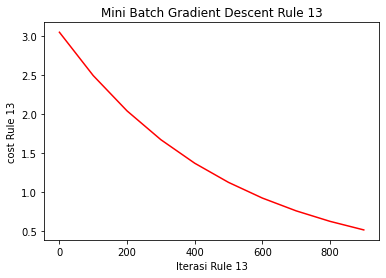

In [ ]:
plt.xlabel("Iterasi Rule 13")
plt.ylabel("cost Rule 13")
plt.title("Mini Batch Gradient Descent Rule 13")
plt.plot(mb_iterasi_rule13_list,mb_cost_rule13_list, color='red', label='Eror')
plt.show()

In [ ]:
mb_cost_rule13

0.43046300083234895

In [ ]:
mb_b0_rule13

-0.5292589121978301

In [ ]:
mb_bpoly_rule13

array([0.63724039, 0.71860626, 0.745948  ])

In [ ]:
data_rule_13

Age  Trestbps  Chol  Target
57    45       115   260       1
61    54       108   309       1
80    41       112   250       1
84    42       102   265       1
109   50       110   254       1
122   41       112   268       1
123   54       108   267       1
141   43       115   303       1
146   44       118   242       1

In [ ]:
X13=np.array(data_rule_13.iloc[::,:-1])
X13

array([[ 45, 115, 260],
       [ 54, 108, 309],
       [ 41, 112, 250],
       [ 42, 102, 265],
       [ 50, 110, 254],
       [ 41, 112, 268],
       [ 54, 108, 267],
       [ 43, 115, 303],
       [ 44, 118, 242]])

In [ ]:
Y13=np.array(data_rule_13.iloc[:,3])
Y13

array([1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree(derajat) diganti menjadi 4
X13_poly = poly_reg.fit_transform(X13)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X13_poly, Y13) 
# Proses Training Model
poly_reg.fit(X13, Y13) 

# Memprediksi hasil dengan regresi polynomial
y13_pred=lin_reg_2.predict(poly_reg.fit_transform(X13))
y13_pred

data_rule_13['pred'] = y13_pred
data_rule_13

Age  Trestbps  Chol  Target  pred
57    45       115   260       1   1.0
61    54       108   309       1   1.0
80    41       112   250       1   1.0
84    42       102   265       1   1.0
109   50       110   254       1   1.0
122   41       112   268       1   1.0
123   54       108   267       1   1.0
141   43       115   303       1   1.0
146   44       118   242       1   1.0

##Rule 14

In [ ]:
#Rule 14
rule_14 = df_fuzz[df_fuzz['Rule']==" Jika X1 Tua dan X2 Hipertensi Jika X3 Ambang batas maka Y Nonkardiovaktular"]
index=rule_14.index
data_rule_14=df_fuzz.iloc[index,:4]
data_rule_14

Age  Trestbps  Chol  Target
0     63       145   233       1
17    66       150   226       1
26    59       150   212       1
64    58       140   211       1
77    59       140   221       1
106   69       160   234       1
150   66       160   228       1
152   64       170   227       1

In [ ]:
data_rule_14.to_csv('hasilrule14.csv') 

###Mini Batch Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df_rule14=pd.read_csv('hasilrule14.csv',sep=',')
df_rule14

Unnamed: 0  Age  Trestbps  Chol  Target
0           0   63       145   233       1
1          17   66       150   226       1
2          26   59       150   212       1
3          64   58       140   211       1
4          77   59       140   221       1
5         106   69       160   234       1
6         150   66       160   228       1
7         152   64       170   227       1

In [ ]:
df_rule14=df_rule14.drop(columns=['Unnamed: 0'])
df_rule14

Age  Trestbps  Chol  Target
0   63       145   233       1
1   66       150   226       1
2   59       150   212       1
3   58       140   211       1
4   59       140   221       1
5   69       160   234       1
6   66       160   228       1
7   64       170   227       1

In [ ]:
from sklearn import preprocessing
sx14 = preprocessing.MinMaxScaler()
sy14 = preprocessing.MinMaxScaler()

scaled_X14 = sx14.fit_transform(data_rule_14.drop('Target',axis='columns'))
scaled_y14 = sy14.fit_transform(data_rule_14['Target'].values.reshape(rule_14.shape[0],1))

scaled_X14

array([[0.45454545, 0.16666667, 0.95652174],
       [0.72727273, 0.33333333, 0.65217391],
       [0.09090909, 0.33333333, 0.04347826],
       [0.        , 0.        , 0.        ],
       [0.09090909, 0.        , 0.43478261],
       [1.        , 0.66666667, 1.        ],
       [0.72727273, 0.66666667, 0.73913043],
       [0.54545455, 1.        , 0.69565217]])

In [ ]:
scaled_y14_reshape=scaled_y14.reshape(scaled_y14.shape[0],)
scaled_y14_reshape

array([0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
def mini_batch_gradient_descent_rule14(X14, y14, iterasi, batch_size = 4, learning_rate = 0.0001):

    jumlah_variabel_rule14 = X14.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule14 = np.ones(shape=(jumlah_variabel_rule14))       # b1, b2, ... b(jumlah variabel)
    b0_rule14 = 0                                         # b0 atau bias
    n = X14.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule14_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule14_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule14_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule14 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X14_smntr = X14[random_indices]
        y14_smntr = y14[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule14 = X14_smntr[j:j+batch_size]
            yj_rule14 = y14_smntr[j:j+batch_size]
            
            y14_pred = np.dot(bpoly_rule14, Xj_rule14.T) + b0_rule14          # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule14_grad = -(2/len(Xj_rule14))*(Xj_rule14.T.dot(yj_rule14-y14_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule14_grad = -(2/len(Xj_rule14))*np.sum(yj_rule14-y14_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule14 = bpoly_rule14 - learning_rate * bpoly_rule14_grad        # Memperbaharui bpoly setiap iterasi
            b0_rule14 = b0_rule14 - learning_rate * b0_rule14_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule14 in range(jumlah_variabel_rule14):
                bp_rule14=bpoly_rule14[jv_rule14]
                bp.append(bp_rule14)
            b_rule14=[b0_rule14]+bp
        
            cost_rule14 = np.mean(np.square(yj_rule14-y14_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule14_list.append(cost_rule14)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule14_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule14_list.append(b_rule14)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule14, b0_rule14, cost_rule14, b_rule14_list, cost_rule14_list, iterasi_rule14_list  # Output

In [ ]:
import time
mulai_rule14 = time.time()
mb_bpoly_rule14, mb_b0_rule14, mb_cost_rule14, mb_b_rule14_list, mb_cost_rule14_list, mb_iterasi_rule14_list=mini_batch_gradient_descent_rule14 (scaled_X14, 
                                                                                                                                        scaled_y14_reshape,
                                                                                                                                        iterasi=10000, 
                                                                                                                                        batch_size = 4, 
                                                                                                                                        learning_rate = 0.0001)
selesai_rule14 = time.time()
waktu_komputasi_rule14 = (selesai_rule14 - mulai_rule14)
print("Waktu Komputasi Rule 14: ",waktu_komputasi_rule14)

Waktu Komputasi Rule 14:  3.1119003295898438


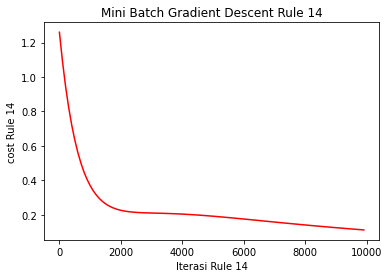

In [ ]:
plt.xlabel("Iterasi Rule 14")
plt.ylabel("cost Rule 14")
plt.title("Mini Batch Gradient Descent Rule 14")
plt.plot(mb_iterasi_rule14_list,mb_cost_rule14_list, color='red', label='Eror')
plt.show()

In [ ]:
mb_cost_rule14

0.11080658547599756

In [ ]:
mb_b0_rule14

-0.4629145887206879

In [ ]:
mb_bpoly_rule14

array([0.26056422, 0.35821782, 0.23469203])

In [ ]:
data_rule_14

Age  Trestbps  Chol  Target
0     63       145   233       1
17    66       150   226       1
26    59       150   212       1
64    58       140   211       1
77    59       140   221       1
106   69       160   234       1
150   66       160   228       1
152   64       170   227       1

In [ ]:
X14=np.array(data_rule_14.iloc[::,:-1])
X14

array([[ 63, 145, 233],
       [ 66, 150, 226],
       [ 59, 150, 212],
       [ 58, 140, 211],
       [ 59, 140, 221],
       [ 69, 160, 234],
       [ 66, 160, 228],
       [ 64, 170, 227]])

In [ ]:
Y14=np.array(data_rule_14.iloc[:,3])
Y14

array([1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree(derajat) diganti menjadi 4
X14_poly = poly_reg.fit_transform(X14)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X14_poly, Y14) 
# Proses Training Model
poly_reg.fit(X14, Y14) 

# Memprediksi hasil dengan regresi polynomial
y14_pred=lin_reg_2.predict(poly_reg.fit_transform(X14))
y14_pred

data_rule_14['pred'] = y14_pred
data_rule_14

Age  Trestbps  Chol  Target  pred
0     63       145   233       1   1.0
17    66       150   226       1   1.0
26    59       150   212       1   1.0
64    58       140   211       1   1.0
77    59       140   221       1   1.0
106   69       160   234       1   1.0
150   66       160   228       1   1.0
152   64       170   227       1   1.0

##Rule 15

In [ ]:
#Rule 15
rule_15 = df_fuzz[df_fuzz['Rule']==" Jika X1 Tua dan X2 Hipertensi Jika X3 Baik maka Y Kardiovaktular"]
index=rule_15.index
data_rule_15=df_fuzz.iloc[index,:4]
data_rule_15

Age  Trestbps  Chol  Target
194   60       140   185       0
204   62       160   164       0
209   59       140   177       0
225   70       145   174       0
295   63       140   187       0
297   59       164   176       0
300   68       144   193       0

In [ ]:
data_rule_15.to_csv('hasilrule15.csv') 

###Mini Batch Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df_rule15=pd.read_csv('hasilrule15.csv',sep=',')
df_rule15

Unnamed: 0  Age  Trestbps  Chol  Target
0         194   60       140   185       0
1         204   62       160   164       0
2         209   59       140   177       0
3         225   70       145   174       0
4         295   63       140   187       0
5         297   59       164   176       0
6         300   68       144   193       0

In [ ]:
df_rule15=df_rule15.drop(columns=['Unnamed: 0'])
df_rule15

Age  Trestbps  Chol  Target
0   60       140   185       0
1   62       160   164       0
2   59       140   177       0
3   70       145   174       0
4   63       140   187       0
5   59       164   176       0
6   68       144   193       0

In [ ]:
from sklearn import preprocessing
sx15 = preprocessing.MinMaxScaler()
sy15 = preprocessing.MinMaxScaler()

scaled_X15 = sx15.fit_transform(data_rule_15.drop('Target',axis='columns'))
scaled_y15 = sy15.fit_transform(data_rule_15['Target'].values.reshape(rule_15.shape[0],1))

scaled_X15

array([[0.09090909, 0.        , 0.72413793],
       [0.27272727, 0.83333333, 0.        ],
       [0.        , 0.        , 0.44827586],
       [1.        , 0.20833333, 0.34482759],
       [0.36363636, 0.        , 0.79310345],
       [0.        , 1.        , 0.4137931 ],
       [0.81818182, 0.16666667, 1.        ]])

In [ ]:
scaled_y15_reshape=scaled_y15.reshape(scaled_y15.shape[0],)
scaled_y15_reshape

array([0., 0., 0., 0., 0., 0., 0.])

In [ ]:
def mini_batch_gradient_descent_rule15(X15, y15, iterasi, batch_size = 4, learning_rate = 0.0001):

    jumlah_variabel_rule15 = X15.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule15 = np.ones(shape=(jumlah_variabel_rule15))       # b1, b2, ... b(jumlah variabel)
    b0_rule15 = 0                                         # b0 atau bias
    n = X15.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule15_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule15_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule15_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule15 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X15_smntr = X15[random_indices]
        y15_smntr = y15[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule15 = X15_smntr[j:j+batch_size]
            yj_rule15 = y15_smntr[j:j+batch_size]
            
            y15_pred = np.dot(bpoly_rule15, Xj_rule15.T) + b0_rule15          # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule15_grad = -(2/len(Xj_rule15))*(Xj_rule15.T.dot(yj_rule15-y15_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule15_grad = -(2/len(Xj_rule15))*np.sum(yj_rule15-y15_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule15 = bpoly_rule15 - learning_rate * bpoly_rule15_grad        # Memperbaharui bpoly setiap iterasi
            b0_rule15 = b0_rule15 - learning_rate * b0_rule15_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule15 in range(jumlah_variabel_rule15):
                bp_rule15=bpoly_rule15[jv_rule15]
                bp.append(bp_rule15)
            b_rule15=[b0_rule15]+bp
        
            cost_rule15 = np.mean(np.square(yj_rule15-y15_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule15_list.append(cost_rule15)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule15_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule15_list.append(b_rule15)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule15, b0_rule15, cost_rule15, b_rule15_list, cost_rule15_list, iterasi_rule15_list  # Output

In [ ]:
import time
mulai_rule15 = time.time()
mb_bpoly_rule15, mb_b0_rule15, mb_cost_rule15, mb_b_rule15_list, mb_cost_rule15_list, mb_iterasi_rule15_list=mini_batch_gradient_descent_rule15 (scaled_X15, 
                                                                                                                                        scaled_y15_reshape,
                                                                                                                                        iterasi=10000, 
                                                                                                                                        batch_size = 4, 
                                                                                                                                        learning_rate = 0.0001)
selesai_rule15 = time.time()
waktu_komputasi_rule15 = (selesai_rule15 - mulai_rule15)
print("Waktu Komputasi Rule 15: ",waktu_komputasi_rule15)

Waktu Komputasi Rule 15:  3.0917532444000244


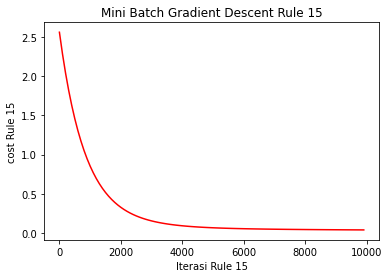

In [ ]:
plt.xlabel("Iterasi Rule 15")
plt.ylabel("cost Rule 15")
plt.title("Mini Batch Gradient Descent Rule 15")
plt.plot(mb_iterasi_rule15_list,mb_cost_rule15_list, color='red', label='Eror')
plt.show()

In [ ]:
mb_cost_rule15

0.03687523932133594

In [ ]:
mb_b0_rule15

-0.6861962607469511

In [ ]:
mb_bpoly_rule15

array([0.4285285 , 0.63982628, 0.53919176])

In [ ]:
data_rule_15

Age  Trestbps  Chol  Target
194   60       140   185       0
204   62       160   164       0
209   59       140   177       0
225   70       145   174       0
295   63       140   187       0
297   59       164   176       0
300   68       144   193       0

In [ ]:
X15=np.array(data_rule_15.iloc[::,:-1])
X15

array([[ 60, 140, 185],
       [ 62, 160, 164],
       [ 59, 140, 177],
       [ 70, 145, 174],
       [ 63, 140, 187],
       [ 59, 164, 176],
       [ 68, 144, 193]])

In [ ]:
Y15=np.array(data_rule_15.iloc[:,3])
Y15

array([0, 0, 0, 0, 0, 0, 0])

In [ ]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree(derajat) diganti menjadi 4
X15_poly = poly_reg.fit_transform(X15)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X15_poly, Y15) 
# Proses Training Model
poly_reg.fit(X15, Y15) 

# Memprediksi hasil dengan regresi polynomial
y15_pred=lin_reg_2.predict(poly_reg.fit_transform(X15))
y15_pred

data_rule_15['pred'] = y15_pred
data_rule_15

Age  Trestbps  Chol  Target  pred
194   60       140   185       0   0.0
204   62       160   164       0   0.0
209   59       140   177       0   0.0
225   70       145   174       0   0.0
295   63       140   187       0   0.0
297   59       164   176       0   0.0
300   68       144   193       0   0.0

##Rule 16

In [ ]:
#Rule 16
rule_16 = df_fuzz[df_fuzz['Rule']==" Jika X1 Parabaya dan X2 Hipertensi Jika X3 Tinggi maka Y Nonkardiovaktular"]
index=rule_16.index
data_rule_16=df_fuzz.iloc[index,:4]
data_rule_16

Age  Trestbps  Chol  Target
10    54       140   239       1
18    43       150   247       1
40    51       140   308       1
44    39       140   321       1
73    51       140   261       1
83    52       152   298       1
100   42       148   244       1

In [ ]:
data_rule_16.to_csv('hasilrule16.csv') 

###Mini Batch Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df_rule16=pd.read_csv('hasilrule16.csv',sep=',')
df_rule16

Unnamed: 0  Age  Trestbps  Chol  Target
0          10   54       140   239       1
1          18   43       150   247       1
2          40   51       140   308       1
3          44   39       140   321       1
4          73   51       140   261       1
5          83   52       152   298       1
6         100   42       148   244       1

In [ ]:
df_rule16=df_rule16.drop(columns=['Unnamed: 0'])
df_rule16

Age  Trestbps  Chol  Target
0   54       140   239       1
1   43       150   247       1
2   51       140   308       1
3   39       140   321       1
4   51       140   261       1
5   52       152   298       1
6   42       148   244       1

In [ ]:
from sklearn import preprocessing
sx16 = preprocessing.MinMaxScaler()
sy16 = preprocessing.MinMaxScaler()

scaled_X16 = sx16.fit_transform(data_rule_16.drop('Target',axis='columns'))
scaled_y16 = sy16.fit_transform(data_rule_16['Target'].values.reshape(rule_16.shape[0],1))

scaled_X16

array([[1.        , 0.        , 0.        ],
       [0.26666667, 0.83333333, 0.09756098],
       [0.8       , 0.        , 0.84146341],
       [0.        , 0.        , 1.        ],
       [0.8       , 0.        , 0.26829268],
       [0.86666667, 1.        , 0.7195122 ],
       [0.2       , 0.66666667, 0.06097561]])

In [ ]:
scaled_y16_reshape=scaled_y16.reshape(scaled_y16.shape[0],)
scaled_y16_reshape

array([0., 0., 0., 0., 0., 0., 0.])

In [ ]:
def mini_batch_gradient_descent_rule16(X16, y16, iterasi, batch_size = 4, learning_rate = 0.0001):

    jumlah_variabel_rule16 = X16.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule16 = np.ones(shape=(jumlah_variabel_rule16))       # b1, b2, ... b(jumlah variabel)
    b0_rule16 = 0                                         # b0 atau bias
    n = X16.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule16_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule16_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule16_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule16 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X16_smntr = X16[random_indices]
        y16_smntr = y16[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule16 = X16_smntr[j:j+batch_size]
            yj_rule16 = y16_smntr[j:j+batch_size]
            
            y16_pred = np.dot(bpoly_rule16, Xj_rule16.T) + b0_rule16          # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule16_grad = -(2/len(Xj_rule16))*(Xj_rule16.T.dot(yj_rule16-y16_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule16_grad = -(2/len(Xj_rule16))*np.sum(yj_rule16-y16_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule16 = bpoly_rule16 - learning_rate * bpoly_rule16_grad        # Memperbaharui bpoly setiap iterasi
            b0_rule16 = b0_rule16 - learning_rate * b0_rule16_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule16 in range(jumlah_variabel_rule16):
                bp_rule16=bpoly_rule16[jv_rule16]
                bp.append(bp_rule16)
            b_rule16=[b0_rule16]+bp
        
            cost_rule16 = np.mean(np.square(yj_rule16-y16_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule16_list.append(cost_rule16)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule16_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule16_list.append(b_rule16)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule16, b0_rule16, cost_rule16, b_rule16_list, cost_rule16_list, iterasi_rule16_list  # Output

In [ ]:
import time
mulai_rule16 = time.time()
mb_bpoly_rule16, mb_b0_rule16, mb_cost_rule16, mb_b_rule16_list, mb_cost_rule16_list, mb_iterasi_rule16_list=mini_batch_gradient_descent_rule16 (scaled_X16, 
                                                                                                                                        scaled_y16_reshape,
                                                                                                                                        iterasi=10000, 
                                                                                                                                        batch_size = 4, 
                                                                                                                                        learning_rate = 0.0001)
selesai_rule16 = time.time()
waktu_komputasi_rule16 = (selesai_rule16 - mulai_rule16)
print("Waktu Komputasi Rule 16: ",waktu_komputasi_rule16)

Waktu Komputasi Rule 16:  3.062836170196533


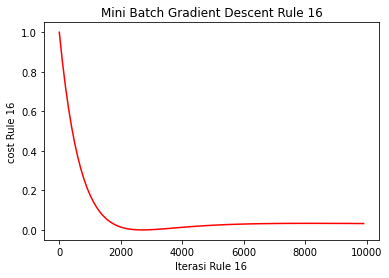

In [ ]:
plt.xlabel("Iterasi Rule 16")
plt.ylabel("cost Rule 16")
plt.title("Mini Batch Gradient Descent Rule 16")
plt.plot(mb_iterasi_rule14_list,mb_cost_rule16_list, color='red', label='Eror')
plt.show()

In [ ]:
mb_cost_rule16

0.032399769227728525

In [ ]:
mb_b0_rule16

-0.6630312594629059

In [ ]:
mb_bpoly_rule16

array([0.45877617, 0.49220785, 0.50194797])

In [ ]:
data_rule_16

Age  Trestbps  Chol  Target
10    54       140   239       1
18    43       150   247       1
40    51       140   308       1
44    39       140   321       1
73    51       140   261       1
83    52       152   298       1
100   42       148   244       1

In [ ]:
X16=np.array(data_rule_16.iloc[::,:-1])
X16

array([[ 54, 140, 239],
       [ 43, 150, 247],
       [ 51, 140, 308],
       [ 39, 140, 321],
       [ 51, 140, 261],
       [ 52, 152, 298],
       [ 42, 148, 244]])

In [ ]:
Y16=np.array(data_rule_16.iloc[:,3])
Y16

array([1, 1, 1, 1, 1, 1, 1])

In [ ]:
# Membuat model regressi dengan library Scikit Learn
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  ## nantinya degree(derajat) diganti menjadi 4
X16_poly = poly_reg.fit_transform(X16)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X16_poly, Y16) 
# Proses Training Model
poly_reg.fit(X16, Y16) 

# Memprediksi hasil dengan regresi polynomial
y16_pred=lin_reg_2.predict(poly_reg.fit_transform(X16))
y16_pred

data_rule_16['pred'] = y16_pred
data_rule_16

Age  Trestbps  Chol  Target  pred
10    54       140   239       1   1.0
18    43       150   247       1   1.0
40    51       140   308       1   1.0
44    39       140   321       1   1.0
73    51       140   261       1   1.0
83    52       152   298       1   1.0
100   42       148   244       1   1.0

##Rule 17

In [ ]:
#Rule 17
rule_17 = df_fuzz[df_fuzz['Rule']==" Jika X1 Parabaya dan X2 Normal Jika X3 Baik maka Y Nonkardiovaktular"]
index=rule_17.index
data_rule_17=df_fuzz.iloc[index,:4]
data_rule_17

Age  Trestbps  Chol  Target
27    51       110   175       1
30    41       105   198       1
53    44       108   141       1
62    52       118   186       1
87    46       101   197       1
94    45       112   160       1
124   39        94   199       1

In [ ]:
data_rule_17.to_csv('hasilrule17.csv') 

###Mini Batch Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df_rule17=pd.read_csv('hasilrule17.csv',sep=',')
df_rule17

Unnamed: 0  Age  Trestbps  Chol  Target
0          27   51       110   175       1
1          30   41       105   198       1
2          53   44       108   141       1
3          62   52       118   186       1
4          87   46       101   197       1
5          94   45       112   160       1
6         124   39        94   199       1

In [ ]:
df_rule17=df_rule17.drop(columns=['Unnamed: 0'])
df_rule17

Age  Trestbps  Chol  Target
0   51       110   175       1
1   41       105   198       1
2   44       108   141       1
3   52       118   186       1
4   46       101   197       1
5   45       112   160       1
6   39        94   199       1

In [ ]:
from sklearn import preprocessing
sx17 = preprocessing.MinMaxScaler()
sy17 = preprocessing.MinMaxScaler()

scaled_X17 = sx17.fit_transform(data_rule_17.drop('Target',axis='columns'))
scaled_y17 = sy17.fit_transform(data_rule_17['Target'].values.reshape(rule_17.shape[0],1))

scaled_X17

array([[0.92307692, 0.66666667, 0.5862069 ],
       [0.15384615, 0.45833333, 0.98275862],
       [0.38461538, 0.58333333, 0.        ],
       [1.        , 1.        , 0.77586207],
       [0.53846154, 0.29166667, 0.96551724],
       [0.46153846, 0.75      , 0.32758621],
       [0.        , 0.        , 1.        ]])

In [ ]:
scaled_y17_reshape=scaled_y17.reshape(scaled_y17.shape[0],)
scaled_y17_reshape

array([0., 0., 0., 0., 0., 0., 0.])

In [ ]:
def mini_batch_gradient_descent_rule17(X17, y17, iterasi, batch_size = 3, learning_rate = 0.0001):

    jumlah_variabel_rule17 = X17.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule17 = np.ones(shape=(jumlah_variabel_rule17))       # b1, b2, ... b(jumlah variabel)
    b0_rule17 = 0                                         # b0 atau bias
    n = X17.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule17_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule17_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule17_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule17 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X17_smntr = X17[random_indices]
        y17_smntr = y17[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule17 = X17_smntr[j:j+batch_size]
            yj_rule17 = y17_smntr[j:j+batch_size]
            
            y17_pred = np.dot(bpoly_rule17, Xj_rule17.T) + b0_rule17          # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule17_grad = -(2/len(Xj_rule17))*(Xj_rule17.T.dot(yj_rule17-y17_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule17_grad = -(2/len(Xj_rule17))*np.sum(yj_rule17-y17_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule17 = bpoly_rule17 - learning_rate * bpoly_rule17_grad        # Memperbaharui bpoly setiap iterasi
            b0_rule17 = b0_rule17 - learning_rate * b0_rule17_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule17 in range(jumlah_variabel_rule17):
                bp_rule17=bpoly_rule17[jv_rule17]
                bp.append(bp_rule17)
            b_rule17=[b0_rule17]+bp
        
            cost_rule17 = np.mean(np.square(yj_rule17-y17_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule17_list.append(cost_rule17)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule17_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule17_list.append(b_rule17)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule17, b0_rule17, cost_rule17, b_rule17_list, cost_rule17_list, iterasi_rule17_list  # Output

In [ ]:
import time
mulai_rule17 = time.time()
mb_bpoly_rule17, mb_b0_rule17, mb_cost_rule17, mb_b_rule17_list, mb_cost_rule17_list, mb_iterasi_rule17_list=mini_batch_gradient_descent_rule17 (scaled_X17, 
                                                                                                                                        scaled_y17_reshape,
                                                                                                                                        iterasi=10000, 
                                                                                                                                        batch_size = 3, 
                                                                                                                                        learning_rate = 0.0001)
selesai_rule17 = time.time()
waktu_komputasi_rule17 = (selesai_rule17 - mulai_rule17)
print("Waktu Komputasi Rule 17: ",waktu_komputasi_rule17)

Waktu Komputasi Rule 17:  3.415904998779297


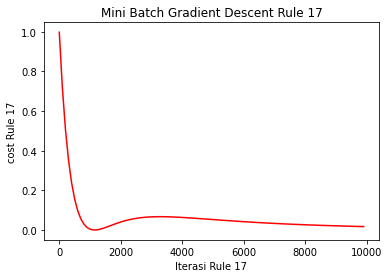

In [ ]:
plt.xlabel("Iterasi Rule 17")
plt.ylabel("cost Rule 17")
plt.title("Mini Batch Gradient Descent Rule 17")
plt.plot(mb_iterasi_rule14_list,mb_cost_rule17_list, color='red', label='Eror')
plt.show()

In [ ]:
mb_cost_rule17

0.016839231938698157

In [ ]:
mb_b0_rule17

-0.6229428254822059

In [ ]:
mb_bpoly_rule17

array([0.24671965, 0.32963199, 0.49322867])

##Rule 18

In [ ]:
#Rule 18
rule_18 = df_fuzz[df_fuzz['Rule']==" Jika X1 Tua dan X2 Normal Jika X3 Tinggi maka Y Nonkardiovaktular"]
index=rule_18.index
data_rule_18=df_fuzz.iloc[index,:4]
data_rule_18

Age  Trestbps  Chol  Target
60   71       110   265       1
79   58       105   240       1
82   60       102   318       1
85   67       115   564       1
86   68       118   277       1
89   58       100   248       1

In [ ]:
data_rule_18.to_csv('hasilrule18.csv')

###Mini Batch Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df_rule18=pd.read_csv('hasilrule18.csv',sep=',')
df_rule18

Unnamed: 0  Age  Trestbps  Chol  Target
0          60   71       110   265       1
1          79   58       105   240       1
2          82   60       102   318       1
3          85   67       115   564       1
4          86   68       118   277       1
5          89   58       100   248       1

In [ ]:
df_rule18=df_rule18.drop(columns=['Unnamed: 0'])
df_rule18

Age  Trestbps  Chol  Target
0   71       110   265       1
1   58       105   240       1
2   60       102   318       1
3   67       115   564       1
4   68       118   277       1
5   58       100   248       1

In [ ]:
from sklearn import preprocessing
sx18 = preprocessing.MinMaxScaler()
sy18 = preprocessing.MinMaxScaler()

scaled_X18 = sx18.fit_transform(data_rule_18.drop('Target',axis='columns'))
scaled_y18 = sy18.fit_transform(data_rule_18['Target'].values.reshape(rule_18.shape[0],1))

scaled_X18

array([[1.        , 0.55555556, 0.07716049],
       [0.        , 0.27777778, 0.        ],
       [0.15384615, 0.11111111, 0.24074074],
       [0.69230769, 0.83333333, 1.        ],
       [0.76923077, 1.        , 0.11419753],
       [0.        , 0.        , 0.02469136]])

In [ ]:
scaled_y18_reshape=scaled_y18.reshape(scaled_y18.shape[0],)
scaled_y18_reshape

array([0., 0., 0., 0., 0., 0.])

In [ ]:
def mini_batch_gradient_descent_rule18(X18, y18, iterasi, batch_size = 3, learning_rate = 0.0001):

    jumlah_variabel_rule18 = X18.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule18 = np.ones(shape=(jumlah_variabel_rule18))       # b1, b2, ... b(jumlah variabel)
    b0_rule18 = 0                                         # b0 atau bias
    n = X18.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule18_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule18_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule18_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule18 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X18_smntr = X18[random_indices]
        y18_smntr = y18[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule18 = X18_smntr[j:j+batch_size]
            yj_rule18 = y18_smntr[j:j+batch_size]
            
            y18_pred = np.dot(bpoly_rule18, Xj_rule18.T) + b0_rule18          # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule18_grad = -(2/len(Xj_rule18))*(Xj_rule18.T.dot(yj_rule18-y18_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule18_grad = -(2/len(Xj_rule18))*np.sum(yj_rule18-y18_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule18 = bpoly_rule18 - learning_rate * bpoly_rule18_grad        # Memperbaharui bpoly setiap iterasi
            b0_rule18 = b0_rule18 - learning_rate * b0_rule18_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule18 in range(jumlah_variabel_rule18):
                bp_rule18=bpoly_rule18[jv_rule18]
                bp.append(bp_rule18)
            b_rule18=[b0_rule18]+bp
        
            cost_rule18 = np.mean(np.square(yj_rule18-y18_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule18_list.append(cost_rule18)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule18_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule18_list.append(b_rule18)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule18, b0_rule18, cost_rule18, b_rule18_list, cost_rule18_list, iterasi_rule18_list  # Output

In [ ]:
import time
mulai_rule18 = time.time()
mb_bpoly_rule18, mb_b0_rule18, mb_cost_rule18, mb_b_rule18_list, mb_cost_rule18_list, mb_iterasi_rule18_list=mini_batch_gradient_descent_rule18 (scaled_X18, 
                                                                                                                                        scaled_y18_reshape,
                                                                                                                                        iterasi=10000, 
                                                                                                                                        batch_size = 3, 
                                                                                                                                        learning_rate = 0.0001)
selesai_rule18 = time.time()
waktu_komputasi_rule18 = (selesai_rule18 - mulai_rule18)
print("Waktu Komputasi Rule 18: ",waktu_komputasi_rule18)

Waktu Komputasi Rule 18:  3.0562102794647217


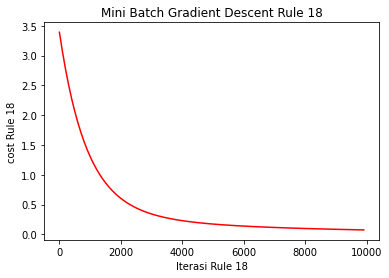

In [ ]:
plt.xlabel("Iterasi Rule 18")
plt.ylabel("cost Rule 18")
plt.title("Mini Batch Gradient Descent Rule 18")
plt.plot(mb_iterasi_rule14_list,mb_cost_rule18_list, color='red', label='Eror')
plt.show()

In [ ]:
mb_cost_rule18

0.07262804349092028

In [ ]:
mb_b0_rule18

-0.38724531714042165

In [ ]:
mb_bpoly_rule18

array([0.23536486, 0.23478849, 0.43233136])

##Rule 19

In [ ]:
#Rule 19
rule_19 = df_fuzz[df_fuzz['Rule']==" Jika X1 Tua dan X2 Normal Jika X3 Tinggi maka Y Kardiovaktular"]
index=rule_19.index
data_rule_19=df_fuzz.iloc[index,:4]
data_rule_19

Age  Trestbps  Chol  Target
199   65       110   248       0
206   59       110   239       0
253   67       100   299       0
263   63       108   269       0
288   57       110   335       0
291   58       114   318       0

In [ ]:
data_rule_19.to_csv('hasilrule19.csv')

###Mini Batch Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df_rule19=pd.read_csv('hasilrule19.csv',sep=',')
df_rule19

Unnamed: 0  Age  Trestbps  Chol  Target
0         199   65       110   248       0
1         206   59       110   239       0
2         253   67       100   299       0
3         263   63       108   269       0
4         288   57       110   335       0
5         291   58       114   318       0

In [ ]:
df_rule19=df_rule19.drop(columns=['Unnamed: 0'])
df_rule19

Age  Trestbps  Chol  Target
0   65       110   248       0
1   59       110   239       0
2   67       100   299       0
3   63       108   269       0
4   57       110   335       0
5   58       114   318       0

In [ ]:
from sklearn import preprocessing
sx19 = preprocessing.MinMaxScaler()
sy19 = preprocessing.MinMaxScaler()

scaled_X19 = sx19.fit_transform(data_rule_19.drop('Target',axis='columns'))
scaled_y19 = sy19.fit_transform(data_rule_19['Target'].values.reshape(rule_19.shape[0],1))

scaled_X19

array([[0.8       , 0.71428571, 0.09375   ],
       [0.2       , 0.71428571, 0.        ],
       [1.        , 0.        , 0.625     ],
       [0.6       , 0.57142857, 0.3125    ],
       [0.        , 0.71428571, 1.        ],
       [0.1       , 1.        , 0.82291667]])

In [ ]:
scaled_y19_reshape=scaled_y19.reshape(scaled_y19.shape[0],)
scaled_y19_reshape

array([0., 0., 0., 0., 0., 0.])

In [ ]:
def mini_batch_gradient_descent_rule19(X19, y19, iterasi, batch_size = 3, learning_rate = 0.0001):

    jumlah_variabel_rule19 = X19.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule19 = np.ones(shape=(jumlah_variabel_rule19))       # b1, b2, ... b(jumlah variabel)
    b0_rule19 = 0                                         # b0 atau bias
    n = X19.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule19_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule19_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule19_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule19 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X19_smntr = X19[random_indices]
        y19_smntr = y19[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule19 = X19_smntr[j:j+batch_size]
            yj_rule19 = y19_smntr[j:j+batch_size]
            
            y19_pred = np.dot(bpoly_rule19, Xj_rule19.T) + b0_rule19          # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule19_grad = -(2/len(Xj_rule19))*(Xj_rule19.T.dot(yj_rule19-y19_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule19_grad = -(2/len(Xj_rule19))*np.sum(yj_rule19-y19_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule19 = bpoly_rule19 - learning_rate * bpoly_rule19_grad        # Memperbaharui bpoly setiap iterasi
            b0_rule19 = b0_rule19 - learning_rate * b0_rule19_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule19 in range(jumlah_variabel_rule19):
                bp_rule19=bpoly_rule19[jv_rule19]
                bp.append(bp_rule19)
            b_rule19=[b0_rule19]+bp
        
            cost_rule19 = np.mean(np.square(yj_rule19-y19_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule19_list.append(cost_rule19)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule19_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule19_list.append(b_rule19)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule19, b0_rule19, cost_rule19, b_rule19_list, cost_rule19_list, iterasi_rule19_list  # Output

In [ ]:
import time
mulai_rule19 = time.time()
mb_bpoly_rule19, mb_b0_rule19, mb_cost_rule19, mb_b_rule19_list, mb_cost_rule19_list, mb_iterasi_rule19_list=mini_batch_gradient_descent_rule19 (scaled_X19, 
                                                                                                                                        scaled_y19_reshape,
                                                                                                                                        iterasi=10000, 
                                                                                                                                        batch_size = 3, 
                                                                                                                                        learning_rate = 0.0001)
selesai_rule19 = time.time()
waktu_komputasi_rule19 = (selesai_rule19 - mulai_rule19)
print("Waktu Komputasi Rule 19: ",waktu_komputasi_rule19)

Waktu Komputasi Rule 19:  3.0375125408172607


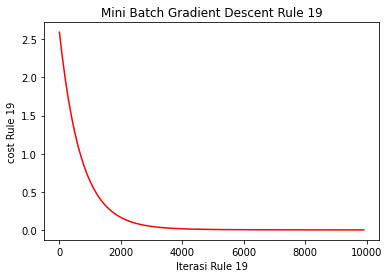

In [ ]:
plt.xlabel("Iterasi Rule 19")
plt.ylabel("cost Rule 19")
plt.title("Mini Batch Gradient Descent Rule 19")
plt.plot(mb_iterasi_rule14_list,mb_cost_rule19_list, color='red', label='Eror')
plt.show()

In [ ]:
mb_cost_rule19

0.0013629904506048637

In [ ]:
mb_b0_rule19

-0.8022816642388538

In [ ]:
mb_bpoly_rule19

array([0.58511217, 0.51256327, 0.44404997])

##Rule 20

In [ ]:
#Rule 20
rule_20 = df_fuzz[df_fuzz['Rule']==" Jika X1 Parabaya dan X2 Hipertensi Jika X3 Ambang batas maka Y Nonkardiovaktular"]
index=rule_20.index
data_rule_20=df_fuzz.iloc[index,:4]
data_rule_20

Age  Trestbps  Chol  Target
22    42       140   226       1
37    54       150   232       1
46    44       140   235       1
95    53       142   226       1
130   54       160   201       1

In [ ]:
data_rule_20.to_csv('hasilrule20.csv')

###Mini Batch Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df_rule20=pd.read_csv('hasilrule20.csv',sep=',')
df_rule20

Unnamed: 0  Age  Trestbps  Chol  Target
0          22   42       140   226       1
1          37   54       150   232       1
2          46   44       140   235       1
3          95   53       142   226       1
4         130   54       160   201       1

In [ ]:
df_rule20=df_rule20.drop(columns=['Unnamed: 0'])
df_rule20

Age  Trestbps  Chol  Target
0   42       140   226       1
1   54       150   232       1
2   44       140   235       1
3   53       142   226       1
4   54       160   201       1

In [ ]:
from sklearn import preprocessing
sx20 = preprocessing.MinMaxScaler()
sy20 = preprocessing.MinMaxScaler()

scaled_X20 = sx20.fit_transform(data_rule_20.drop('Target',axis='columns'))
scaled_y20 = sy20.fit_transform(data_rule_20['Target'].values.reshape(rule_20.shape[0],1))

scaled_X20

array([[0.        , 0.        , 0.73529412],
       [1.        , 0.5       , 0.91176471],
       [0.16666667, 0.        , 1.        ],
       [0.91666667, 0.1       , 0.73529412],
       [1.        , 1.        , 0.        ]])

In [ ]:
scaled_y20_reshape=scaled_y20.reshape(scaled_y20.shape[0],)
scaled_y20_reshape

array([0., 0., 0., 0., 0.])

In [ ]:
def mini_batch_gradient_descent_rule20(X20, y20, iterasi, batch_size = 3, learning_rate = 0.0001):

    jumlah_variabel_rule20 = X20.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule20 = np.ones(shape=(jumlah_variabel_rule20))       # b1, b2, ... b(jumlah variabel)
    b0_rule20 = 0                                         # b0 atau bias
    n = X20.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule20_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule20_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule20_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule20 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X20_smntr = X20[random_indices]
        y20_smntr = y20[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule20 = X20_smntr[j:j+batch_size]
            yj_rule20 = y20_smntr[j:j+batch_size]
            
            y20_pred = np.dot(bpoly_rule20, Xj_rule20.T) + b0_rule20          # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule20_grad = -(2/len(Xj_rule20))*(Xj_rule20.T.dot(yj_rule20-y20_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule20_grad = -(2/len(Xj_rule20))*np.sum(yj_rule20-y20_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule20 = bpoly_rule20 - learning_rate * bpoly_rule20_grad        # Memperbaharui bpoly setiap iterasi
            b0_rule20 = b0_rule20 - learning_rate * b0_rule20_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule20 in range(jumlah_variabel_rule20):
                bp_rule20=bpoly_rule20[jv_rule20]
                bp.append(bp_rule20)
            b_rule20=[b0_rule20]+bp
        
            cost_rule20 = np.mean(np.square(yj_rule20-y20_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule20_list.append(cost_rule20)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule20_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule20_list.append(b_rule20)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule20, b0_rule20, cost_rule20, b_rule20_list, cost_rule20_list, iterasi_rule20_list  # Output

In [ ]:
import time
mulai_rule20 = time.time()
mb_bpoly_rule20, mb_b0_rule20, mb_cost_rule20, mb_b_rule20_list, mb_cost_rule20_list, mb_iterasi_rule20_list=mini_batch_gradient_descent_rule20 (scaled_X20, 
                                                                                                                                        scaled_y20_reshape,
                                                                                                                                        iterasi=10000, 
                                                                                                                                        batch_size = 3, 
                                                                                                                                        learning_rate = 0.0001)
selesai_rule20 = time.time()
waktu_komputasi_rule20 = (selesai_rule20 - mulai_rule20)
print("Waktu Komputasi Rule 20: ",waktu_komputasi_rule20)

Waktu Komputasi Rule 20:  3.0675060749053955


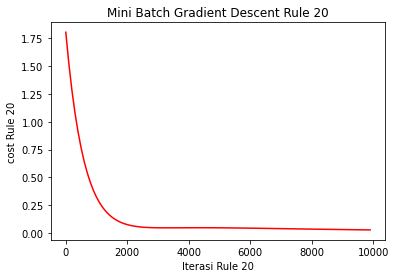

In [ ]:
plt.xlabel("Iterasi Rule 20")
plt.ylabel("cost Rule 20")
plt.title("Mini Batch Gradient Descent Rule 20")
plt.plot(mb_iterasi_rule14_list,mb_cost_rule20_list, color='red', label='Eror')
plt.show()

In [ ]:
mb_cost_rule20

0.02925427896070886

In [ ]:
mb_b0_rule20

-0.6821415476249236

In [ ]:
mb_bpoly_rule20

array([0.16423793, 0.53383172, 0.60233902])

##Rule 21

In [ ]:
#Rule 21
rule_21 = df_fuzz[df_fuzz['Rule']==" Jika X1 Parabaya dan X2 Prahipertensi Jika X3 Baik maka Y Kardiovaktular"]
index=rule_21.index
data_rule_21=df_fuzz.iloc[index,:4]
data_rule_21

Age  Trestbps  Chol  Target
178   43       120   177       0
192   54       120   188       0
208   49       120   188       0
227   35       120   198       0
294   44       120   169       0

In [ ]:
data_rule_21.to_csv('hasilrule21.csv')

###Mini Batch Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df_rule21=pd.read_csv('hasilrule21.csv',sep=',')
df_rule21

Unnamed: 0  Age  Trestbps  Chol  Target
0         178   43       120   177       0
1         192   54       120   188       0
2         208   49       120   188       0
3         227   35       120   198       0
4         294   44       120   169       0

In [ ]:
df_rule21=df_rule21.drop(columns=['Unnamed: 0'])
df_rule21

Age  Trestbps  Chol  Target
0   43       120   177       0
1   54       120   188       0
2   49       120   188       0
3   35       120   198       0
4   44       120   169       0

In [ ]:
from sklearn import preprocessing
sx21 = preprocessing.MinMaxScaler()
sy21 = preprocessing.MinMaxScaler()

scaled_X21 = sx21.fit_transform(data_rule_21.drop('Target',axis='columns'))
scaled_y21 = sy21.fit_transform(data_rule_21['Target'].values.reshape(rule_21.shape[0],1))

scaled_X21

array([[0.42105263, 0.        , 0.27586207],
       [1.        , 0.        , 0.65517241],
       [0.73684211, 0.        , 0.65517241],
       [0.        , 0.        , 1.        ],
       [0.47368421, 0.        , 0.        ]])

In [ ]:
scaled_y21_reshape=scaled_y21.reshape(scaled_y21.shape[0],)
scaled_y21_reshape

array([0., 0., 0., 0., 0.])

In [ ]:
def mini_batch_gradient_descent_rule21(X21, y21, iterasi, batch_size = 3, learning_rate = 0.0001):

    jumlah_variabel_rule21 = X21.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule21 = np.ones(shape=(jumlah_variabel_rule21))       # b1, b2, ... b(jumlah variabel)
    b0_rule21 = 0                                         # b0 atau bias
    n = X21.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule21_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule21_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule21_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule21 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X21_smntr = X21[random_indices]
        y21_smntr = y21[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule21 = X21_smntr[j:j+batch_size]
            yj_rule21 = y21_smntr[j:j+batch_size]
            
            y21_pred = np.dot(bpoly_rule21, Xj_rule21.T) + b0_rule21          # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule21_grad = -(2/len(Xj_rule21))*(Xj_rule21.T.dot(yj_rule21-y21_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule21_grad = -(2/len(Xj_rule21))*np.sum(yj_rule21-y21_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule21 = bpoly_rule21 - learning_rate * bpoly_rule21_grad        # Memperbaharui bpoly setiap iterasi
            b0_rule21 = b0_rule21 - learning_rate * b0_rule21_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule21 in range(jumlah_variabel_rule21):
                bp_rule21=bpoly_rule21[jv_rule21]
                bp.append(bp_rule21)
            b_rule21=[b0_rule21]+bp
        
            cost_rule21 = np.mean(np.square(yj_rule21-y21_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule21_list.append(cost_rule21)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule21_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule21_list.append(b_rule21)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule21, b0_rule21, cost_rule21, b_rule21_list, cost_rule21_list, iterasi_rule21_list  # Output

In [ ]:
import time
mulai_rule21 = time.time()
mb_bpoly_rule21, mb_b0_rule21, mb_cost_rule21, mb_b_rule21_list, mb_cost_rule21_list, mb_iterasi_rule21_list=mini_batch_gradient_descent_rule21 (scaled_X21, 
                                                                                                                                        scaled_y21_reshape,
                                                                                                                                        iterasi=10000, 
                                                                                                                                        batch_size = 3, 
                                                                                                                                        learning_rate = 0.0001)
selesai_rule21 = time.time()
waktu_komputasi_rule21 = (selesai_rule21 - mulai_rule21)
print("Waktu Komputasi Rule 21: ",waktu_komputasi_rule21)

Waktu Komputasi Rule 21:  3.079131841659546


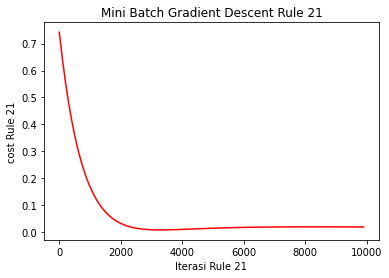

In [ ]:
plt.xlabel("Iterasi Rule 21")
plt.ylabel("cost Rule 21")
plt.title("Mini Batch Gradient Descent Rule 21")
plt.plot(mb_iterasi_rule14_list,mb_cost_rule21_list, color='red', label='Eror')
plt.show()

In [ ]:
mb_cost_rule21

0.018371191733842936

In [ ]:
mb_b0_rule21

-0.5460878042495733

In [ ]:
mb_bpoly_rule21

array([0.53215775, 1.        , 0.4963834 ])

##Rule 22

In [ ]:
#Rule 22
rule_22 = df_fuzz[df_fuzz['Rule']==" Jika X1 Parabaya dan X2 Hipertensi Jika X3 Tinggi maka Y Kardiovaktular"]
index=rule_22.index
data_rule_22=df_fuzz.iloc[index,:4]
data_rule_22

Age  Trestbps  Chol  Target
184   50       150   243       0
235   51       140   299       0
248   54       192   283       0
250   51       140   298       0
255   45       142   309       0
285   46       140   311       0

In [ ]:
data_rule_22.to_csv('hasilrule22.csv')

###Mini Batch Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df_rule22=pd.read_csv('hasilrule22.csv',sep=',')
df_rule22

Unnamed: 0  Age  Trestbps  Chol  Target
0         184   50       150   243       0
1         235   51       140   299       0
2         248   54       192   283       0
3         250   51       140   298       0
4         255   45       142   309       0
5         285   46       140   311       0

In [ ]:
df_rule22=df_rule22.drop(columns=['Unnamed: 0'])
df_rule22

Age  Trestbps  Chol  Target
0   50       150   243       0
1   51       140   299       0
2   54       192   283       0
3   51       140   298       0
4   45       142   309       0
5   46       140   311       0

In [ ]:
from sklearn import preprocessing
sx22 = preprocessing.MinMaxScaler()
sy22 = preprocessing.MinMaxScaler()

scaled_X22 = sx22.fit_transform(data_rule_22.drop('Target',axis='columns'))
scaled_y22 = sy22.fit_transform(data_rule_22['Target'].values.reshape(rule_22.shape[0],1))

scaled_X22

array([[0.55555556, 0.19230769, 0.        ],
       [0.66666667, 0.        , 0.82352941],
       [1.        , 1.        , 0.58823529],
       [0.66666667, 0.        , 0.80882353],
       [0.        , 0.03846154, 0.97058824],
       [0.11111111, 0.        , 1.        ]])

In [ ]:
scaled_y22_reshape=scaled_y22.reshape(scaled_y22.shape[0],)
scaled_y22_reshape

array([0., 0., 0., 0., 0., 0.])

In [ ]:
def mini_batch_gradient_descent_rule22(X22, y22, iterasi, batch_size = 3, learning_rate = 0.0001):

    jumlah_variabel_rule22 = X22.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule22 = np.ones(shape=(jumlah_variabel_rule22))       # b1, b2, ... b(jumlah variabel)
    b0_rule22 = 0                                         # b0 atau bias
    n = X22.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule22_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule22_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule22_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule22 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X22_smntr = X22[random_indices]
        y22_smntr = y22[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule22 = X22_smntr[j:j+batch_size]
            yj_rule22 = y22_smntr[j:j+batch_size]
            
            y22_pred = np.dot(bpoly_rule22, Xj_rule22.T) + b0_rule22          # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule22_grad = -(2/len(Xj_rule22))*(Xj_rule22.T.dot(yj_rule22-y22_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule22_grad = -(2/len(Xj_rule22))*np.sum(yj_rule22-y22_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule22 = bpoly_rule22 - learning_rate * bpoly_rule22_grad        # Memperbaharui bpoly setiap iterasi
            b0_rule22 = b0_rule22 - learning_rate * b0_rule22_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule22 in range(jumlah_variabel_rule22):
                bp_rule22=bpoly_rule22[jv_rule22]
                bp.append(bp_rule22)
            b_rule22=[b0_rule22]+bp
        
            cost_rule22 = np.mean(np.square(yj_rule22-y22_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule22_list.append(cost_rule22)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule22_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule22_list.append(b_rule22)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule22, b0_rule22, cost_rule22, b_rule22_list, cost_rule22_list, iterasi_rule22_list  # Output

In [ ]:
import time
mulai_rule22 = time.time()
mb_bpoly_rule22, mb_b0_rule22, mb_cost_rule22, mb_b_rule22_list, mb_cost_rule22_list, mb_iterasi_rule22_list=mini_batch_gradient_descent_rule22 (scaled_X22, 
                                                                                                                                        scaled_y22_reshape,
                                                                                                                                        iterasi=10000, 
                                                                                                                                        batch_size = 3, 
                                                                                                                                        learning_rate = 0.0001)
selesai_rule22 = time.time()
waktu_komputasi_rule22 = (selesai_rule22 - mulai_rule22)
print("Waktu Komputasi Rule 22: ",waktu_komputasi_rule22)

Waktu Komputasi Rule 22:  3.0453152656555176


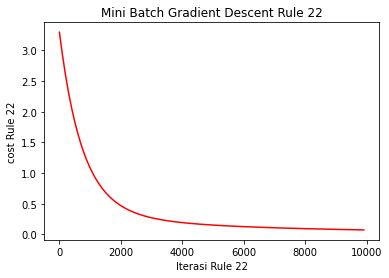

In [ ]:
plt.xlabel("Iterasi Rule 22")
plt.ylabel("cost Rule 22")
plt.title("Mini Batch Gradient Descent Rule 22")
plt.plot(mb_iterasi_rule14_list,mb_cost_rule22_list, color='red', label='Eror')
plt.show()

In [ ]:
mb_cost_rule22

0.07370698044466513

In [ ]:
mb_b0_rule22

-0.6443983212951112

In [ ]:
mb_bpoly_rule22

array([0.3443535 , 0.45484568, 0.49725838])

##Rule 23

In [ ]:
#Rule 23
rule_23 = df_fuzz[df_fuzz['Rule']==" Jika X1 Tua dan X2 Hipertensi Jika X3 Baik maka Y Nonkardiovaktular"]
index=rule_23.index
data_rule_23=df_fuzz.iloc[index,:4]
data_rule_23

Age  Trestbps  Chol  Target
5     57       140   192       1
9     57       150   168       1
102   63       140   195       1
111   57       150   126       1
144   76       140   197       1

In [ ]:
data_rule_23.to_csv('hasilrule23.csv')

###Mini Batch Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df_rule23=pd.read_csv('hasilrule23.csv',sep=',')
df_rule23

Unnamed: 0  Age  Trestbps  Chol  Target
0           5   57       140   192       1
1           9   57       150   168       1
2         102   63       140   195       1
3         111   57       150   126       1
4         144   76       140   197       1

In [ ]:
df_rule23=df_rule23.drop(columns=['Unnamed: 0'])
df_rule23

Age  Trestbps  Chol  Target
0   57       140   192       1
1   57       150   168       1
2   63       140   195       1
3   57       150   126       1
4   76       140   197       1

In [ ]:
from sklearn import preprocessing
sx23 = preprocessing.MinMaxScaler()
sy23 = preprocessing.MinMaxScaler()

scaled_X23 = sx23.fit_transform(data_rule_23.drop('Target',axis='columns'))
scaled_y23 = sy23.fit_transform(data_rule_23['Target'].values.reshape(rule_23.shape[0],1))

scaled_X23

array([[0.        , 0.        , 0.92957746],
       [0.        , 1.        , 0.5915493 ],
       [0.31578947, 0.        , 0.97183099],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 1.        ]])

In [ ]:
scaled_y23_reshape=scaled_y23.reshape(scaled_y23.shape[0],)
scaled_y23_reshape

array([0., 0., 0., 0., 0.])

In [ ]:
def mini_batch_gradient_descent_rule23(X23, y23, iterasi, batch_size = 3, learning_rate = 0.0001):

    jumlah_variabel_rule23 = X23.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule23 = np.ones(shape=(jumlah_variabel_rule23))       # b1, b2, ... b(jumlah variabel)
    b0_rule23 = 0                                         # b0 atau bias
    n = X23.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule23_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule23_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule23_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule23 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X23_smntr = X23[random_indices]
        y23_smntr = y23[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule23 = X23_smntr[j:j+batch_size]
            yj_rule23 = y23_smntr[j:j+batch_size]
            
            y23_pred = np.dot(bpoly_rule23, Xj_rule23.T) + b0_rule23          # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule23_grad = -(2/len(Xj_rule23))*(Xj_rule23.T.dot(yj_rule23-y23_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule23_grad = -(2/len(Xj_rule23))*np.sum(yj_rule23-y23_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule23 = bpoly_rule23 - learning_rate * bpoly_rule23_grad        # Memperbaharui bpoly setiap iterasi
            b0_rule23 = b0_rule23 - learning_rate * b0_rule23_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule23 in range(jumlah_variabel_rule23):
                bp_rule23=bpoly_rule23[jv_rule23]
                bp.append(bp_rule23)
            b_rule23=[b0_rule23]+bp
        
            cost_rule23 = np.mean(np.square(yj_rule23-y23_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule23_list.append(cost_rule23)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule23_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule23_list.append(b_rule23)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule23, b0_rule23, cost_rule23, b_rule23_list, cost_rule23_list, iterasi_rule23_list  # Output

In [ ]:
import time
mulai_rule23 = time.time()
mb_bpoly_rule23, mb_b0_rule23, mb_cost_rule23, mb_b_rule23_list, mb_cost_rule23_list, mb_iterasi_rule23_list=mini_batch_gradient_descent_rule23 (scaled_X23, 
                                                                                                                                        scaled_y23_reshape,
                                                                                                                                        iterasi=10000, 
                                                                                                                                        batch_size = 3, 
                                                                                                                                        learning_rate = 0.0001)
selesai_rule23 = time.time()
waktu_komputasi_rule23 = (selesai_rule23 - mulai_rule23)
print("Waktu Komputasi Rule 23: ",waktu_komputasi_rule23)

Waktu Komputasi Rule 23:  3.047358989715576


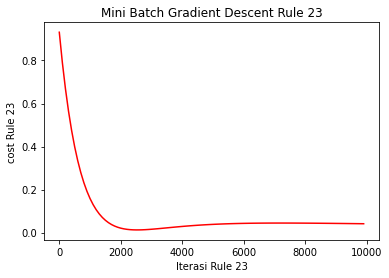

In [ ]:
plt.xlabel("Iterasi Rule 23")
plt.ylabel("cost Rule 23")
plt.title("Mini Batch Gradient Descent Rule 23")
plt.plot(mb_iterasi_rule14_list,mb_cost_rule23_list, color='red', label='Eror')
plt.show()

In [ ]:
mb_cost_rule23

0.04126654060437555

In [ ]:
mb_b0_rule23

-0.7167556241926631

In [ ]:
mb_bpoly_rule23

array([0.56476746, 0.64402244, 0.47214958])

##Rule 24

In [ ]:
#Rule 24
rule_24 = df_fuzz[df_fuzz['Rule']==" Jika X1 Parabaya dan X2 Hipertensi Jika X3 Ambang batas maka Y Kardiovaktular"]
index=rule_24.index
data_rule_24=df_fuzz.iloc[index,:4]
data_rule_24

Age  Trestbps  Chol  Target
169   53       140   203       0
188   50       140   233       0
196   46       150   231       0
257   50       144   200       0
283   40       152   223       0

In [ ]:
data_rule_24.to_csv('hasilrule24.csv')

###Mini Batch Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df_rule24=pd.read_csv('hasilrule24.csv',sep=',')
df_rule24

Unnamed: 0  Age  Trestbps  Chol  Target
0         169   53       140   203       0
1         188   50       140   233       0
2         196   46       150   231       0
3         257   50       144   200       0
4         283   40       152   223       0

In [ ]:
df_rule24=df_rule24.drop(columns=['Unnamed: 0'])
df_rule24

Age  Trestbps  Chol  Target
0   53       140   203       0
1   50       140   233       0
2   46       150   231       0
3   50       144   200       0
4   40       152   223       0

In [ ]:
from sklearn import preprocessing
sx24 = preprocessing.MinMaxScaler()
sy24 = preprocessing.MinMaxScaler()

scaled_X24 = sx24.fit_transform(data_rule_24.drop('Target',axis='columns'))
scaled_y24 = sy24.fit_transform(data_rule_24['Target'].values.reshape(rule_24.shape[0],1))

scaled_X24

array([[1.        , 0.        , 0.09090909],
       [0.76923077, 0.        , 1.        ],
       [0.46153846, 0.83333333, 0.93939394],
       [0.76923077, 0.33333333, 0.        ],
       [0.        , 1.        , 0.6969697 ]])

In [ ]:
scaled_y24_reshape=scaled_y24.reshape(scaled_y24.shape[0],)
scaled_y24_reshape

array([0., 0., 0., 0., 0.])

In [ ]:
def mini_batch_gradient_descent_rule24(X24, y24, iterasi, batch_size = 3, learning_rate = 0.0001):

    jumlah_variabel_rule24 = X24.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule24 = np.ones(shape=(jumlah_variabel_rule24))       # b1, b2, ... b(jumlah variabel)
    b0_rule24 = 0                                         # b0 atau bias
    n = X24.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule24_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule24_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule24_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule24 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X24_smntr = X24[random_indices]
        y24_smntr = y24[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule24 = X24_smntr[j:j+batch_size]
            yj_rule24 = y24_smntr[j:j+batch_size]
            
            y24_pred = np.dot(bpoly_rule24, Xj_rule24.T) + b0_rule24          # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule24_grad = -(2/len(Xj_rule24))*(Xj_rule24.T.dot(yj_rule24-y24_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule24_grad = -(2/len(Xj_rule24))*np.sum(yj_rule24-y24_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule24 = bpoly_rule24 - learning_rate * bpoly_rule24_grad        # Memperbaharui bpoly setiap iterasi
            b0_rule24 = b0_rule24 - learning_rate * b0_rule24_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule24 in range(jumlah_variabel_rule24):
                bp_rule24=bpoly_rule24[jv_rule24]
                bp.append(bp_rule24)
            b_rule24=[b0_rule24]+bp
        
            cost_rule24 = np.mean(np.square(yj_rule24-y24_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule24_list.append(cost_rule24)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule24_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule24_list.append(b_rule24)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule24, b0_rule24, cost_rule24, b_rule24_list, cost_rule24_list, iterasi_rule24_list  # Output

In [ ]:
import time
mulai_rule24 = time.time()
mb_bpoly_rule24, mb_b0_rule24, mb_cost_rule24, mb_b_rule24_list, mb_cost_rule24_list, mb_iterasi_rule24_list=mini_batch_gradient_descent_rule24 (scaled_X24, 
                                                                                                                                        scaled_y24_reshape,
                                                                                                                                        iterasi=10000, 
                                                                                                                                        batch_size = 3, 
                                                                                                                                        learning_rate = 0.0001)
selesai_rule24 = time.time()
waktu_komputasi_rule24 = (selesai_rule24 - mulai_rule24)
print("Waktu Komputasi Rule 24: ",waktu_komputasi_rule24)

Waktu Komputasi Rule 24:  3.05440616607666


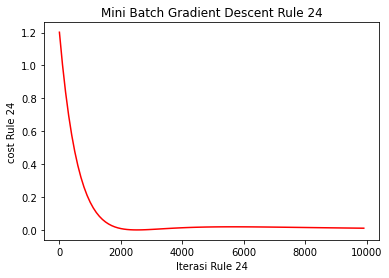

In [ ]:
plt.xlabel("Iterasi Rule 24")
plt.ylabel("cost Rule 24")
plt.title("Mini Batch Gradient Descent Rule 24")
plt.plot(mb_iterasi_rule14_list,mb_cost_rule24_list, color='red', label='Eror')
plt.show()

In [ ]:
mb_cost_rule24

0.010364188606147975

In [ ]:
mb_b0_rule24

-0.776428763823784

In [ ]:
mb_bpoly_rule24

array([0.65160428, 0.50305922, 0.3205445 ])

##Rule 25

In [ ]:
#Rule 25
rule_25 = df_fuzz[df_fuzz['Rule']==" Jika X1 Parabaya dan X2 Normal Jika X3 Tinggi maka Y Kardiovaktular"]
index=rule_25.index
data_rule_25=df_fuzz.iloc[index,:4]
data_rule_25

Age  Trestbps  Chol  Target
185   44       112   290       0
224   54       110   239       0
230   47       108   243       0
274   47       110   275       0
299   45       110   264       0

In [ ]:
data_rule_25.to_csv('hasilrule25.csv')

###Mini Batch Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df_rule25=pd.read_csv('hasilrule25.csv',sep=',')
df_rule25

Unnamed: 0  Age  Trestbps  Chol  Target
0         185   44       112   290       0
1         224   54       110   239       0
2         230   47       108   243       0
3         274   47       110   275       0
4         299   45       110   264       0

In [ ]:
df_rule25=df_rule25.drop(columns=['Unnamed: 0'])
df_rule25

Age  Trestbps  Chol  Target
0   44       112   290       0
1   54       110   239       0
2   47       108   243       0
3   47       110   275       0
4   45       110   264       0

In [ ]:
from sklearn import preprocessing
sx25 = preprocessing.MinMaxScaler()
sy25 = preprocessing.MinMaxScaler()

scaled_X25 = sx25.fit_transform(data_rule_25.drop('Target',axis='columns'))
scaled_y25 = sy25.fit_transform(data_rule_25['Target'].values.reshape(rule_25.shape[0],1))

scaled_X25

array([[0.        , 1.        , 1.        ],
       [1.        , 0.5       , 0.        ],
       [0.3       , 0.        , 0.07843137],
       [0.3       , 0.5       , 0.70588235],
       [0.1       , 0.5       , 0.49019608]])

In [ ]:
scaled_y25_reshape=scaled_y25.reshape(scaled_y25.shape[0],)
scaled_y25_reshape

array([0., 0., 0., 0., 0.])

In [ ]:
def mini_batch_gradient_descent_rule25(X25, y25, iterasi, batch_size = 3, learning_rate = 0.0001):

    jumlah_variabel_rule25 = X25.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly_rule25 = np.ones(shape=(jumlah_variabel_rule25))       # b1, b2, ... b(jumlah variabel)
    b0_rule25 = 0                                         # b0 atau bias
    n = X25.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_rule25_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_rule25_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_rule25_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch_rule25 = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.RandomState(seed=42).permutation(n)      # Memilih indeks data random untuk update parameter
        X25_smntr = X25[random_indices]
        y25_smntr = y25[random_indices]
        
        for j in range(0, n, batch_size):
            Xj_rule25 = X25_smntr[j:j+batch_size]
            yj_rule25 = y25_smntr[j:j+batch_size]
            
            y25_pred = np.dot(bpoly_rule25, Xj_rule25.T) + b0_rule25          # Menghitung y_pred pada setiap iterasi
        
            bpoly_rule25_grad = -(2/len(Xj_rule25))*(Xj_rule25.T.dot(yj_rule25-y25_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_rule25_grad = -(2/len(Xj_rule25))*np.sum(yj_rule25-y25_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly_rule25 = bpoly_rule25 - learning_rate * bpoly_rule25_grad        # Memperbaharui bpoly setiap iterasi
            b0_rule25 = b0_rule25 - learning_rate * b0_rule25_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv_rule25 in range(jumlah_variabel_rule25):
                bp_rule25=bpoly_rule25[jv_rule25]
                bp.append(bp_rule25)
            b_rule25=[b0_rule25]+bp
        
            cost_rule25 = np.mean(np.square(yj_rule25-y25_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_rule25_list.append(cost_rule25)                     # Menyimpan nilai cost setiap iterasi
            iterasi_rule25_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_rule25_list.append(b_rule25)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly_rule25, b0_rule25, cost_rule25, b_rule25_list, cost_rule25_list, iterasi_rule25_list  # Output

In [ ]:
import time
mulai_rule25 = time.time()
mb_bpoly_rule25, mb_b0_rule25, mb_cost_rule25, mb_b_rule25_list, mb_cost_rule25_list, mb_iterasi_rule25_list=mini_batch_gradient_descent_rule25 (scaled_X25, 
                                                                                                                                        scaled_y25_reshape,
                                                                                                                                        iterasi=10000, 
                                                                                                                                        batch_size = 3, 
                                                                                                                                        learning_rate = 0.0001)
selesai_rule25 = time.time()
waktu_komputasi_rule25 = (selesai_rule25 - mulai_rule25)
print("Waktu Komputasi Rule 25: ",waktu_komputasi_rule25)

Waktu Komputasi Rule 25:  3.074916124343872


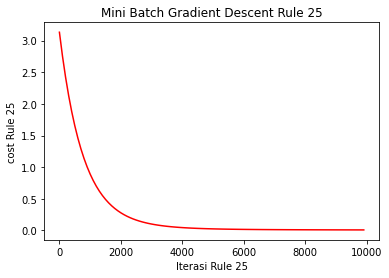

In [ ]:
plt.xlabel("Iterasi Rule 25")
plt.ylabel("cost Rule 25")
plt.title("Mini Batch Gradient Descent Rule 25")
plt.plot(mb_iterasi_rule14_list,mb_cost_rule25_list, color='red', label='Eror')
plt.show()

In [ ]:
mb_cost_rule25

0.007300913053924396

In [ ]:
mb_b0_rule25

-0.6724659519408228

In [ ]:
mb_bpoly_rule25

array([0.72766619, 0.34266884, 0.44622817])

#Prediksi

In [ ]:
df_pred=pd.concat([data_rule_1, data_rule_2, data_rule_3, data_rule_4, data_rule_5, data_rule_6, data_rule_7, data_rule_8, data_rule_9, data_rule_10, data_rule_11, data_rule_12, data_rule_13, data_rule_14, data_rule_15, data_rule_16], ignore_index=False)
df_pred.sort_index()

Age  Trestbps  Chol  Target  pred
0     63       145   233       1   1.0
1     37       130   250       1   1.0
2     41       130   204       1   1.0
3     56       120   236       1   1.0
4     57       120   354       1   1.0
..   ...       ...   ...     ...   ...
295   63       140   187       0   0.0
297   59       164   176       0   0.0
298   57       140   241       0   0.0
300   68       144   193       0   0.0
302   57       130   236       0   0.0

[220 rows x 5 columns]

In [ ]:
df_fuzz['alpha_predikat']=df_fuzz[['miu_Age','miu_Chol','miu_Trestbps','miu_Target']].min(axis=1)
df_fuzz

Age  ...  alpha_predikat
0     63  ...             0.0
1     37  ...             0.0
2     41  ...             0.0
3     56  ...             0.0
4     57  ...             0.0
..   ...  ...             ...
298   57  ...             0.0
299   45  ...             0.0
300   68  ...             0.0
301   57  ...             0.0
302   57  ...             0.0

[303 rows x 14 columns]

In [ ]:
df_fuzz['y_pred_regressi']=df_pred.pred
df_fuzz

Age  Trestbps  ...  alpha_predikat  y_pred_regressi
0     63       145  ...             0.0              1.0
1     37       130  ...             0.0              1.0
2     41       130  ...             0.0              1.0
3     56       120  ...             0.0              1.0
4     57       120  ...             0.0              1.0
..   ...       ...  ...             ...              ...
298   57       140  ...             0.0              0.0
299   45       110  ...             0.0              NaN
300   68       144  ...             0.0              0.0
301   57       130  ...             0.0              NaN
302   57       130  ...             0.0              0.0

[303 rows x 15 columns]

In [ ]:
#df_fuzz['Pred TSK']=df_fuzz['alpha_predikat']*df_fuzz['y_pred_regressi']/df_fuzz['alpha_predikat'].sum()
df_fuzz['Pred TSK']=df_fuzz['alpha_predikat']*df_fuzz['y_pred_regressi']
df_fuzz

Age  Trestbps  Chol  ...  alpha_predikat y_pred_regressi Pred TSK
0     63       145   233  ...             0.0             1.0      0.0
1     37       130   250  ...             0.0             1.0      0.0
2     41       130   204  ...             0.0             1.0      0.0
3     56       120   236  ...             0.0             1.0      0.0
4     57       120   354  ...             0.0             1.0      0.0
..   ...       ...   ...  ...             ...             ...      ...
298   57       140   241  ...             0.0             0.0      0.0
299   45       110   264  ...             0.0             NaN      NaN
300   68       144   193  ...             0.0             0.0      0.0
301   57       130   131  ...             0.0             NaN      NaN
302   57       130   236  ...             0.0             0.0      0.0

[303 rows x 16 columns]

In [ ]:
df_fuzz.to_excel('hasil_prediksi.xlsx') 

In [ ]:
x1= df_fuzz.index
y1= df_fuzz.Target
y2= df_fuzz['Pred TSK']

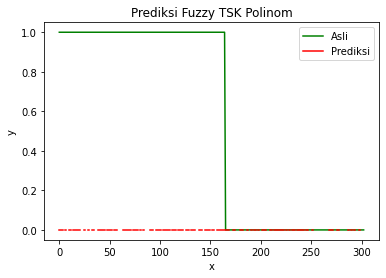

In [ ]:
plt.plot(x1, y1,  label = "Asli",  color='green')
plt.plot(x1, y2, label = "Prediksi", color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Prediksi Fuzzy TSK Polinom')
plt.legend()
plt.show()